#Road accident severity classification

#Goal of the data

Analyse road traffic accident data to reduce the frequency and severity of accidents. Develop insights to improve road safety measures and traffic management sysytems.

* This data set is collected from addis ababa sub-city police departments for masters reasearch work.the data set has been prepared from manual records of road traffic accidents of the year 2017-20. all the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. then it is proprecces and for identification of major causes  of the accident by analyzing it using different machine learning classification algorithms algorithms.

#About the data:
The target feature is accident_severity which is a multi-class variable. the task is to classify this variable based on the other 31 features step-by-step by going through each days task. your metric for evaluation will be f1- score.

https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents

#Libraries

In [109]:
#
#Data Wrangling and manipulation
#
import numpy as np #for numerical computations and array operations
import pandas as pd # for handling and manipuilating structured data.
#
#data visualization
#
import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations
#
#data preprocessing & feature engineering
#
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variable=1)
from sklearn.preprocessing import MinMaxScaler #normalization (scales data between 0 and 1 )
from sklearn.preprocessing import LabelEncoder #encodes categorical label as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical feature to one-hot encoding
from sklearn.impute import SimpleImputer#handles missing values
#
#dimensionally reduction & feature selection
#
from sklearn.decomposition import PCA #principal componenet analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest, f_classif #feature selection techniques
#
#model selection and evaluation
#
from sklearn.model_selection import train_test_split #splits dataset into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #K-Fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning using grid search
#
#performance metrics
#
from sklearn.metrics import accuracy_score #evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision ,recall,F1-score summary
from sklearn.metrics import precision_score #precision metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics # collection of evaluation metrics
#
#Handling imbalanced datasets
#
from imblearn.over_sampling import SMOTE #synthetic minority over-sampling technique(for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes
#
#Machine Learning Algorithms- classifications
#
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #K-Nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random vector classifier
from sklearn.naive_bayes import GaussianNB #naive  bayes classifier
from xgboost import XGBClassifier #extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #desicion tree classifier
from sklearn.ensemble import ExtraTreesClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #stochastic Gradient Descent classifier
#
#Utility Functions
#
from sklearn.pipeline import make_pipeline #create machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #various model selection utilities
from sklearn import svm #support vector machines module
from sklearn import tree # decision tree-related utilities


#reading the dataset

In [110]:
rta=pd.read_csv("/content/rta.dataset.csv")
rta

Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3      01:06:00      Sunday              18-30          Male   
4      01:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior high school                Employee              1-2yr   
3      Junior high school                Employee             5-10yr   
4      Junior high school                Employee              2-5yr   
...                   ...                     ...                ...   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

           Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
0               Automobile            Owner              Above 10yr  ...   
1      Public (> 45 seats)            Owner                 5-10yrs  ...   
2          Lorry (41?100Q)            Owner                     NaN  ...   
3      Public (> 45 seats)     Governmental                     NaN  ...   
4                      NaN            Owner                 5-10yrs  ...   
...                    ...              ...                     ...  ...   
12311       Lorry (11?40Q)            Owner                     NaN  ...   
12312           Automobile            Owner                     NaN  ...   
12313                Bajaj            Owner                  2-5yrs  ...   
12314      Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315                Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...                 ...               ...                  ...   
12311                na            Driver

#basic understanding of data

In [111]:
rta.shape

(12316, 32)

In [112]:
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [113]:
rta.sample()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
6740  11:50:00      Friday            Unknown          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
6740  Junior high school                Employee         Above 10yr   

     Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
6740    Stationwagen            Owner                  2-5yrs  ...   

     Vehicle_movement Casualty_class Sex_of_casualty Age_band_of_casualty  \
6740  Moving Backward      Passenger            Male              Over 51   

     Casualty_severity Work_of_casuality Fitness_of_casuality  \
6740                 3               NaN                  NaN   

     Pedestrian_movement Cause_of_accident Accident_severity  
6740    Not a Pedestrian     No distancing     Slight Injury  

[1 rows x 32 columns]

In [114]:
rta.tail()

Time Day_of_week Age_band_of_driver Sex_of_driver  \
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
12311   Lorry (11?40Q)            Owner                     NaN  ...   
12312       Automobile            Owner                     NaN  ...   
12313            Bajaj            Owner                  2-5yrs  ...   
12314  Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315            Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
12311                na            Driver               Normal   
12312                na            Driver               Normal   
12313                 3            Driver               Normal   
12314                na            Driver               Normal   
12315                 3            Driver               Normal   

                                     Pedestrian_movement  \
12311                                   Not a Pedestrian   
12312                                   Not a Pedestrian   
12313                                   Not a Pedestrian   
12314                                   Not a Pedestrian   
12315  Crossing from nearside - masked by parked or s...   

                          Cause_of_accident Accident_severity  
12311                         No distancing     Slight Injury  
12312                         No distancing     Slight Injury  
12313            Changing lane to the right    Serious Injury  
12314  Driving under the influence of drugs     Slight Injury  
12315            Changing lane to the right     Slight Injury  

[5 rows x 32 columns]

In [115]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [116]:
rta.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [117]:
rta.describe(include=['O'])

Time Day_of_week Age_band_of_driver Sex_of_driver  \
count      12316       12316              12316         12316   
unique      1074           7                  5             3   
top     15:30:00      Friday              18-30          Male   
freq         120        2041               4271         11437   

         Educational_level Vehicle_driver_relation Driving_experience  \
count                11575                   11737              11487   
unique                   7                       4                  7   
top     Junior high school                Employee             5-10yr   
freq                  7619                    9627               3363   

       Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
count            11366            11834                    8388  ...   
unique              17                4                       6  ...   
top         Automobile            Owner                 Unknown  ...   
freq              3205            10459                    2883  ...   

       Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
count             12008            12316           12316                12316   
unique               13                4               3                    6   
top      Going straight  Driver or rider            Male                   na   
freq               8158             4944            5253                 4443   

       Casualty_severity Work_of_casuality Fitness_of_casuality  \
count              12316              9118                 9681   
unique                 4                 7                    5   
top                    3            Driver               Normal   
freq                7076              5903                 9608   

       Pedestrian_movement Cause_of_accident Accident_severity  
count                12316             12316             12316  
unique                   9                20                 3  
top       Not a Pedestrian     No distancing     Slight Injury  
freq                 11390              2263             10415  

[4 rows x 30 columns]

# visualizations of the features

## time and date

<ipython-input-118-f4de4a3db8f6>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Day_of_week'],palette='rainbow')


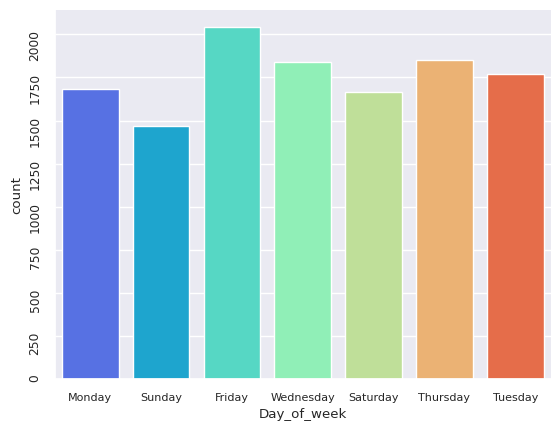

In [118]:
cp=sns.countplot(x=rta['Day_of_week'],palette='rainbow')
plt.xticks(fontsize=14)
plt.yticks(rotation=90)
plt.xticks(fontsize=8)
sns.despine(top=True,right=True)

<ipython-input-119-ae6868049a31>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.barplot(x=rta['Day_of_week'],palette='rainbow')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Friday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Tuesday')])

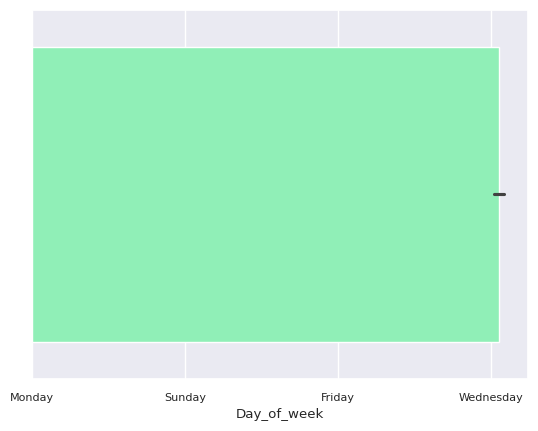

In [119]:
cp=sns.barplot(x=rta['Day_of_week'],palette='rainbow')
plt.xticks(fontsize=14)
plt.yticks(rotation=90)
plt.xticks(fontsize=8)

In [120]:
def formatTimeCol(t):
  t=t[:2]
  if ":" in t:
    t=t[:1]
  return int(t)
def categorizeTimeCol(t):
  if t>=8 and t<17:
    return "Day"
  else:
    return "Night"
rta["Time"]=rta['Time'].apply(lambda x: formatTimeCol(x))
rta["Time"]=rta["Time"].apply(lambda x: categorizeTimeCol(x))

rta["Time"].value_counts(dropna=False)

Time
Day      6387
Night    5929
Name: count, dtype: int64

<ipython-input-121-bc96b690a0a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rta['Time'],palette='rainbow')


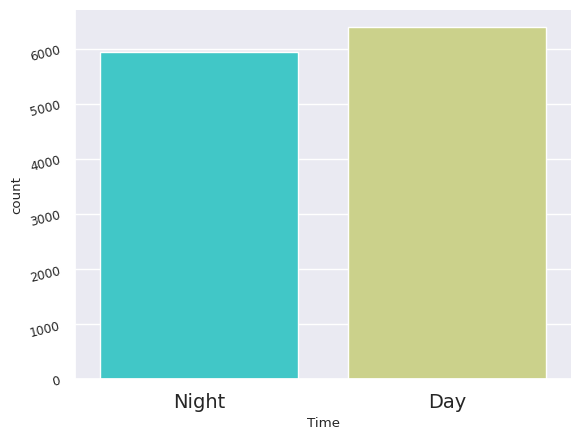

In [121]:
sns.countplot(x=rta['Time'],palette='rainbow')
plt.xticks(fontsize=14)
plt.yticks(rotation=14)
sns.despine(top=True,right=True)

inference on time:

* Most of the accidents occured on friday

* Occured at day time 8AM and 5AM(office & school hours)

* Sunday has less number of sccidents

## driver

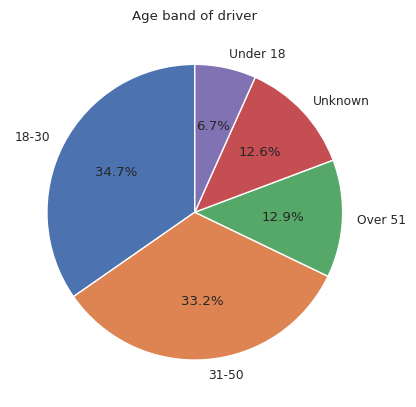

In [122]:
x=rta['Age_band_of_driver'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',startangle=90)
plt.title('Age band of driver')
plt.show()


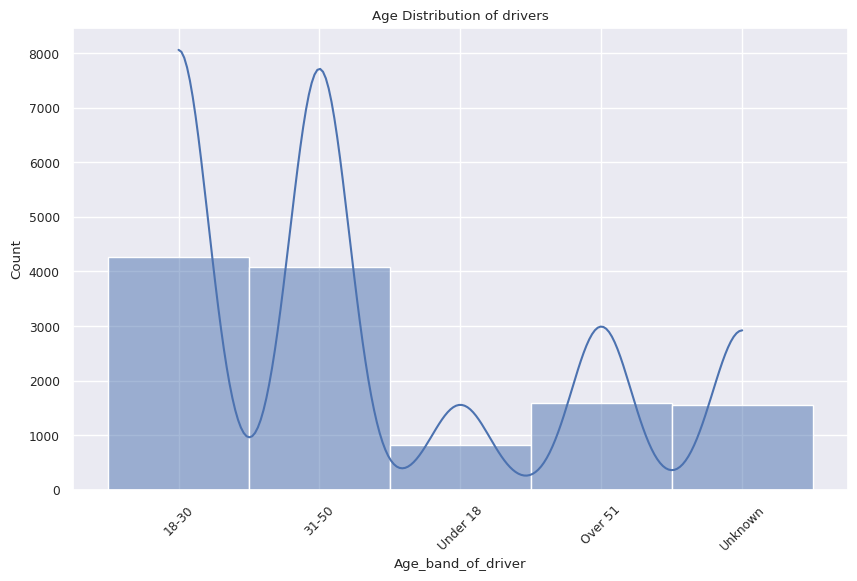

In [123]:
plt.figure(figsize=(10,6))
sns.histplot(rta['Age_band_of_driver'],kde=True,bins=10)
plt.title("Age Distribution of drivers")
plt.xticks(rotation=45)
plt.show( )

<ipython-input-124-86b509273a73>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta["Educational_level"],palette='dark')


Text(0.5, 1.0, 'education level of drivers')

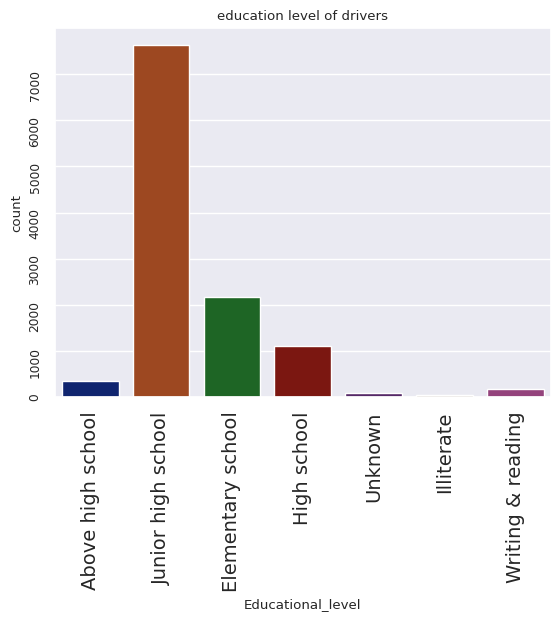

In [124]:
cp=sns.countplot(x=rta["Educational_level"],palette='dark')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(rotation=90)
plt.title('education level of drivers')

<ipython-input-125-d8f51b8a8243>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta["Driving_experience"],palette='rainbow')


Text(0.5, 1.0, 'Driving experience of drivers')

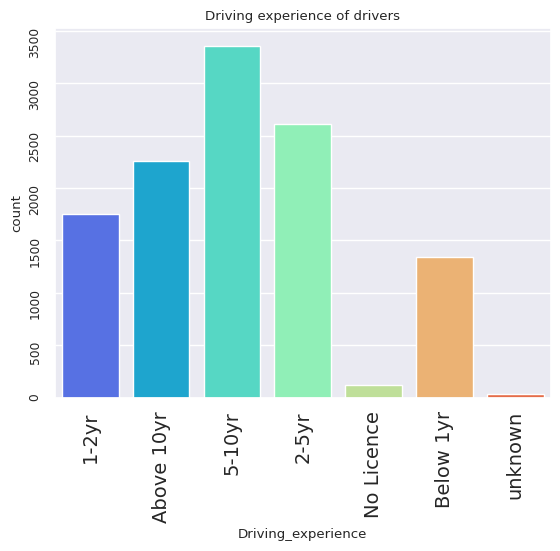

In [125]:
cp=sns.countplot(x=rta["Driving_experience"],palette='rainbow')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(rotation=90)
plt.title('Driving experience of drivers')

Text(0.5, 1.0, 'Sex of driver')

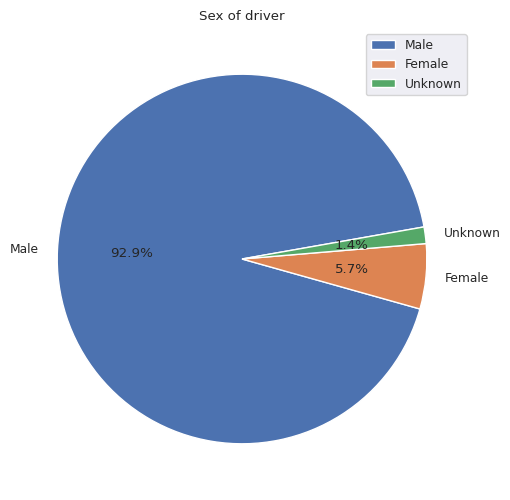

In [126]:
plt.figure(figsize=(10,6))
x=rta['Sex_of_driver'].value_counts()
plt.pie(x,labels=x.index,autopct='%1.1f%%',startangle=10)
plt.legend(loc='upper right')
plt.title('Sex of driver')

In [127]:
rta['Owner_of_vehicle'].value_counts()

Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

<ipython-input-128-d3a3a270ed96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Owner_of_vehicle'],palette='Set1')


Text(0.5, 1.0, 'Owner_of_vehicles')

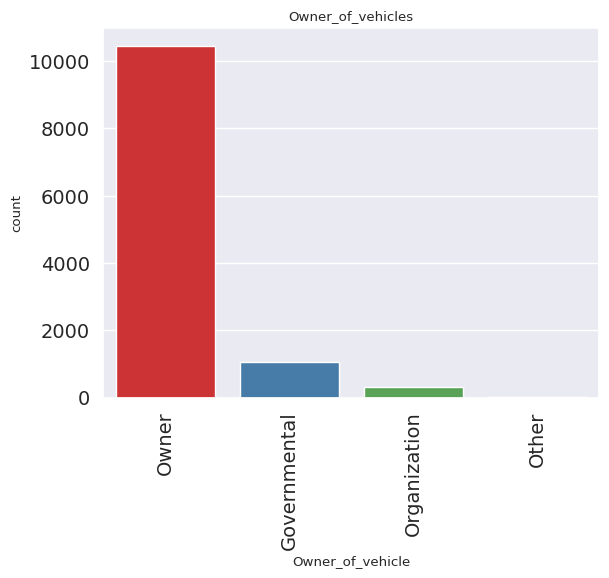

In [128]:
cp=sns.countplot(x=rta['Owner_of_vehicle'],palette='Set1')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.title('Owner_of_vehicles')

inference on driver's features:
* most of the drivers are male between 18-30 age group and with 5-10 yrs of driving experience.

* **Number of RTAs by Gender of Drivers**: in terms of gender,male drivers have been the main cause of traffic accidents by taking 88% of accidents. However, in the current data collection or data gained from the Addis Ababa traffic police commision data, there is no information on the number of vehicles driven by males and females in Addis Ababa.

* majority of the drivers who got accident are employees.

* **Number of RTAs by the driving experience of the driver** : From this, it can be seen that experienced drivers are not only experienced in high-risk accidents  but also in terms of human behavior. There are also reports of accidents involving unlicensed drivers, who are in violation of the law and endanger lives and property.

* **Road RTAs by the Educational Level Of Drivers**: According to the data,the highest number of the number of the accident report at the junior high school educational level of drivers. in this comparison, the risk of most drivers at this education level is related to the problems we have seen in the age group. This does not mean that all drivers at this level of education are in their teens, but they do take part.

* most of the accidents occured in personally owned passenger vehicle.

## casuality

<ipython-input-129-f9897b426a16>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Casualty_class'],palette='rocket')


Text(0.5, 1.0, 'Casualty class')

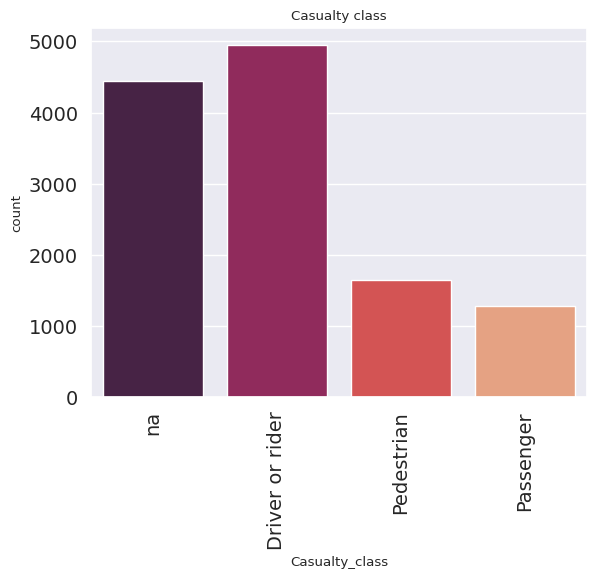

In [129]:
cp=sns.countplot(x=rta['Casualty_class'],palette='rocket')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.title('Casualty class')

<ipython-input-130-572598a43be0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Sex_of_casualty'],palette='viridis')


Text(0.5, 1.0, 'Sex of casualty')

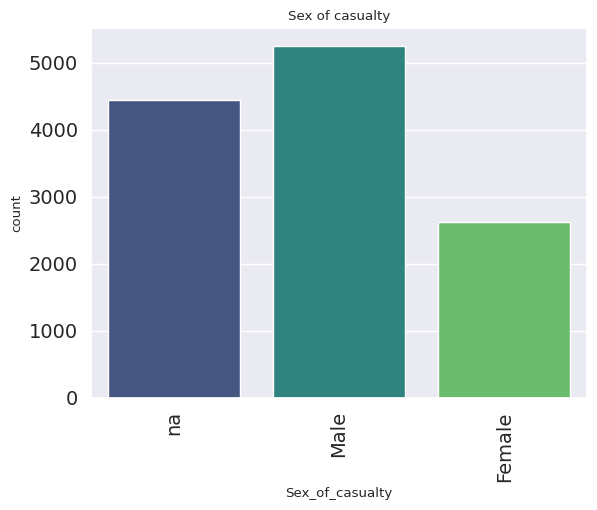

In [130]:
cp=sns.countplot(x=rta['Sex_of_casualty'],palette='viridis')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.title('Sex of casualty')

<ipython-input-131-9ebc47329032>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Cause_of_accident'],palette='rainbow')


Text(0.5, 1.0, 'cause of accident')

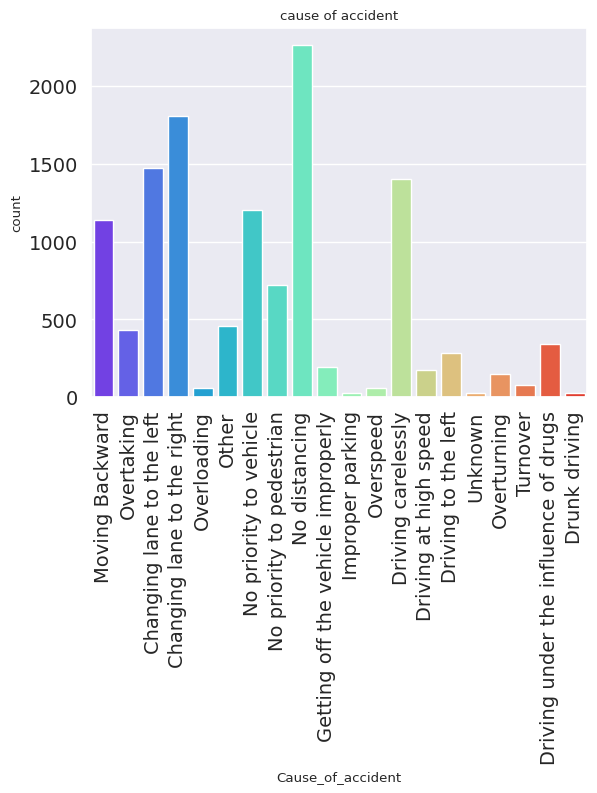

In [131]:
cp=sns.countplot(x=rta['Cause_of_accident'],palette='rainbow')
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.title('cause of accident')

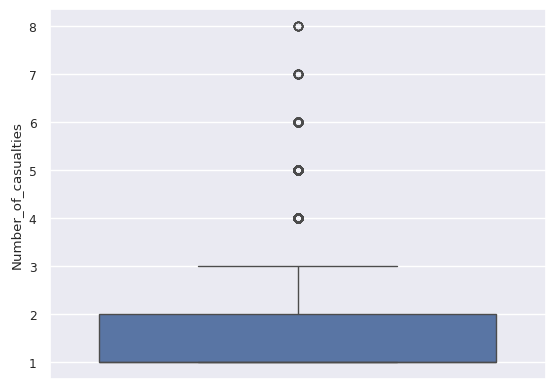

In [132]:
sns.boxplot(rta['Number_of_casualties'])
plt.show()

inferences on casually details:
* Avg casuality number is 1
* severity range of casuality is 3
* Age range is 18-30
* Most of people are normally fit. only a few are deaf and blind.
* male casuality is more compared to female casuality
* Major casuality is driver himself
* Pedestrians are also more likely affected by the accident.

## vehicle

In [133]:
rta['Type_of_vehicle'].value_counts()

Type_of_vehicle
Automobile              3205
Lorry (41?100Q)         2186
Other                   1208
Pick up upto 10Q         811
Public (12 seats)        711
Stationwagen             687
Lorry (11?40Q)           541
Public (13?45 seats)     532
Public (> 45 seats)      404
Long lorry               383
Taxi                     265
Motorcycle               177
Special vehicle           84
Ridden horse              76
Turbo                     46
Bajaj                     29
Bicycle                   21
Name: count, dtype: int64

<ipython-input-134-2caadd2d1f88>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rta['Owner_of_vehicle'],palette='rainbow')


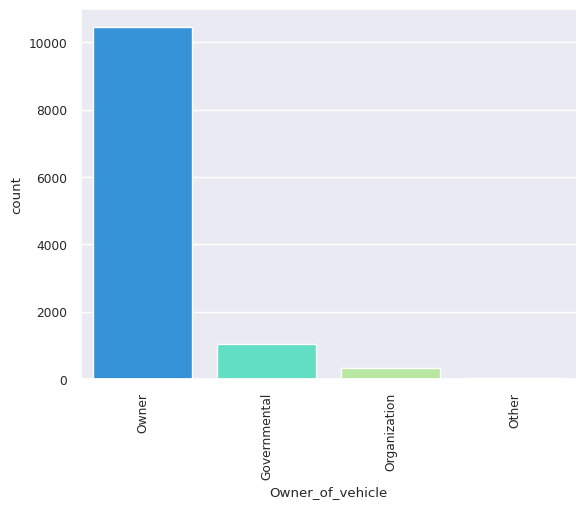

In [134]:
sns.countplot(x=rta['Owner_of_vehicle'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

<ipython-input-135-246a04d343ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rta['Service_year_of_vehicle'],palette='rainbow')


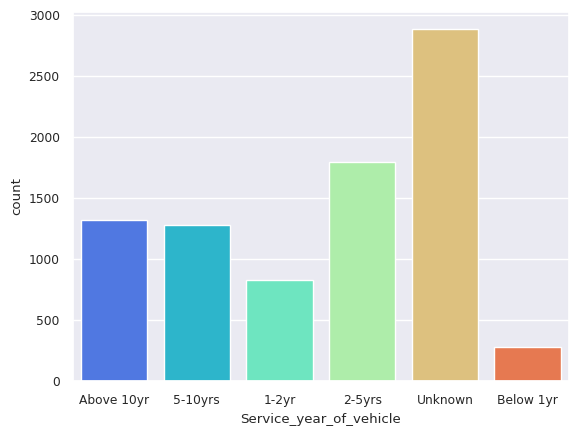

In [135]:
sns.countplot(x=rta['Service_year_of_vehicle'],palette='rainbow')
plt.show()

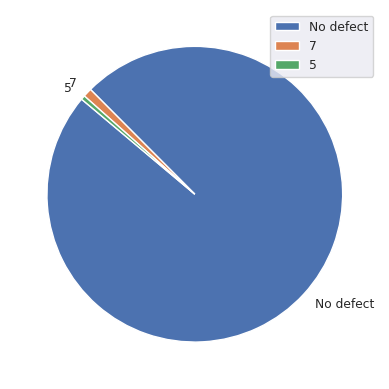

In [136]:
Defect_of_vehicle = rta['Defect_of_vehicle'].value_counts()
fig1=plt.pie(Defect_of_vehicle,labels=Defect_of_vehicle.index,startangle=140)
plt.legend(loc='best')
plt.show()

Inference on vehicle features:
* most of the vehicle dont have any defects.but still got accident

* most of the service_year is unknown.

## accident area

In [137]:
rta['Types_of_Junction'].value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

<ipython-input-138-280012ccf9fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rta['Area_accident_occured'],palette='rainbow')


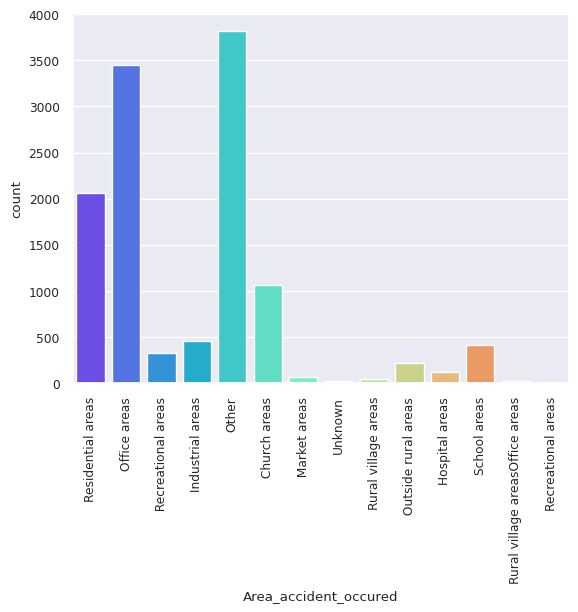

In [138]:
sns.countplot(x=rta['Area_accident_occured'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

<ipython-input-139-6c86f43550b9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rta['Lanes_or_Medians'],palette='rainbow')


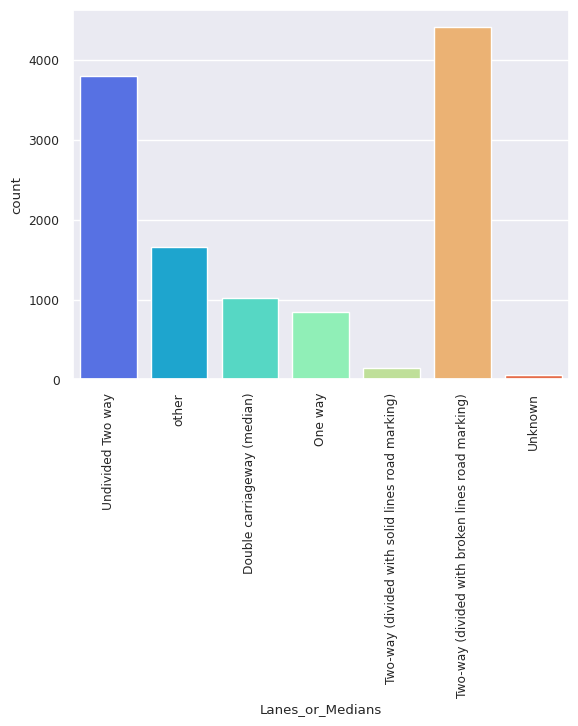

In [139]:
sns.countplot(x=rta['Lanes_or_Medians'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

<ipython-input-140-eda9f605e528>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rta['Road_allignment'],palette='rainbow')


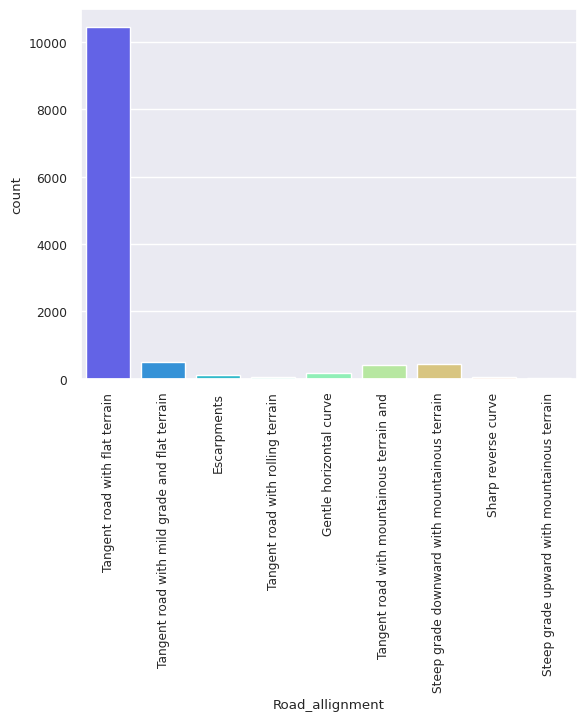

In [140]:
sns.countplot(x=rta['Road_allignment'],palette='rainbow')
plt.xticks(rotation=90)
plt.show()

## Road and weather

<ipython-input-141-8ef75f8faaa7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Road_surface_type'],palette='dark')


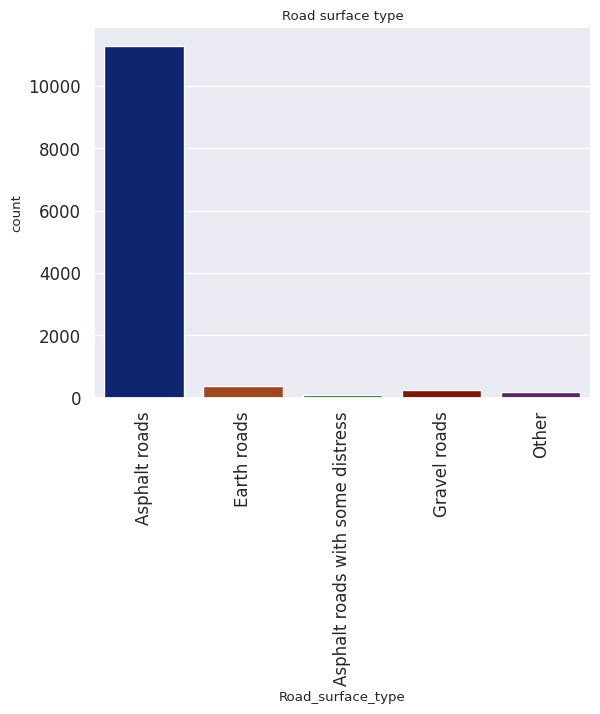

In [141]:
cp=sns.countplot(x=rta['Road_surface_type'],palette='dark')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('Road surface type')
sns.despine(top=True,right=True)

In [142]:
rta['Road_surface_conditions'].value_counts()

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

<ipython-input-143-1dea0b05f47a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Road_surface_conditions'],palette='rainbow')


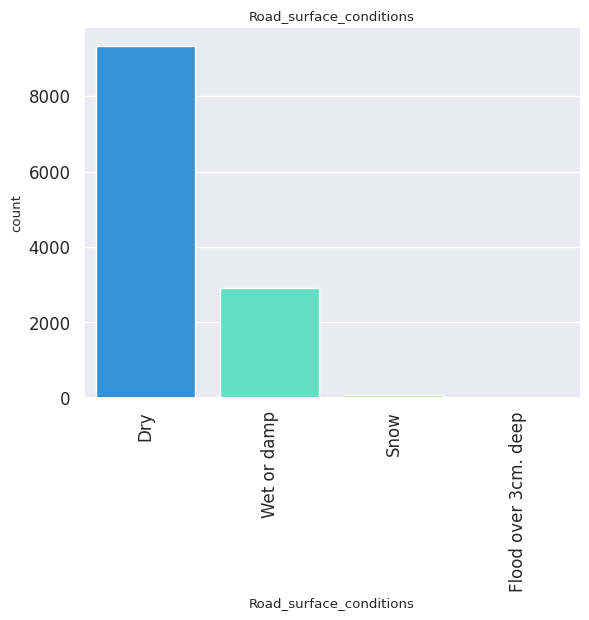

In [143]:
cp=sns.countplot(x=rta['Road_surface_conditions'],palette='rainbow')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('Road_surface_conditions')
sns.despine(top=True,right=True)

<ipython-input-144-6c6f648639f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Light_conditions'],palette='dark')


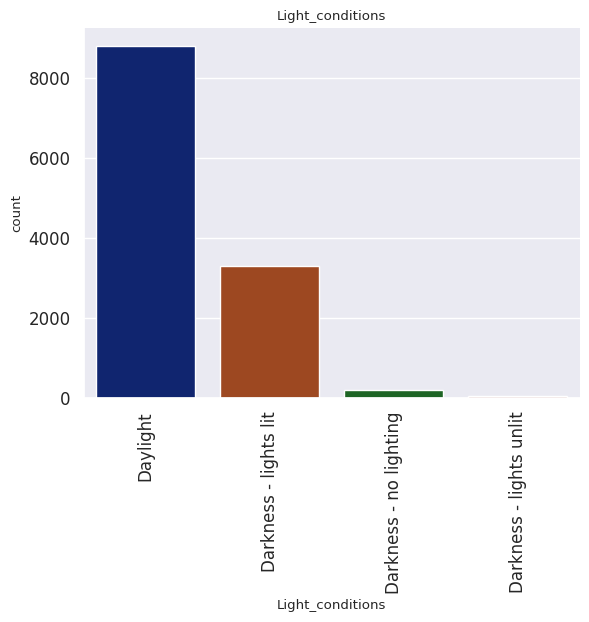

In [144]:
cp=sns.countplot(x=rta['Light_conditions'],palette='dark')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('Light_conditions')
sns.despine(top=True,right=True)

<ipython-input-145-53221f939e44>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Weather_conditions'],palette='Set2')


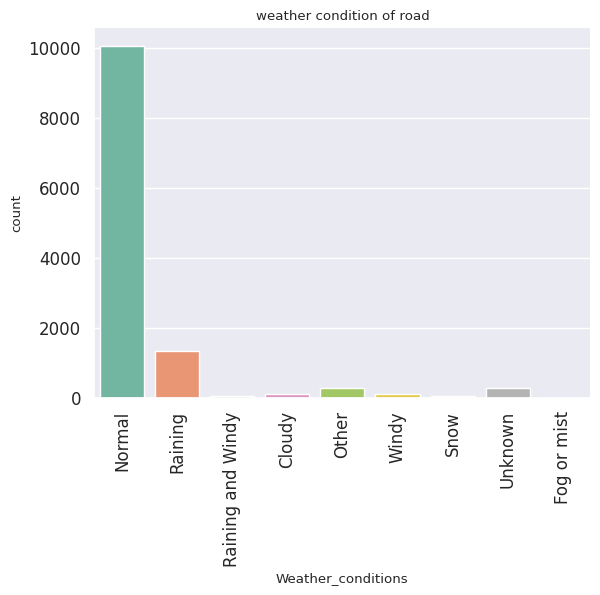

In [145]:
cp=sns.countplot(x=rta['Weather_conditions'],palette='Set2')
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title('weather condition of road')
sns.despine(top=True,right=True)

inference on road features:
* most of the accidents occured at two-way lines in dry surface road
* majority of accidents occured in normal day light and in normal whether condition

## collision

In [146]:
rta['Type_of_collision'].value_counts()

Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

<ipython-input-147-b52a9be4a1aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cp=sns.countplot(x=rta['Type_of_collision'],palette='dark')


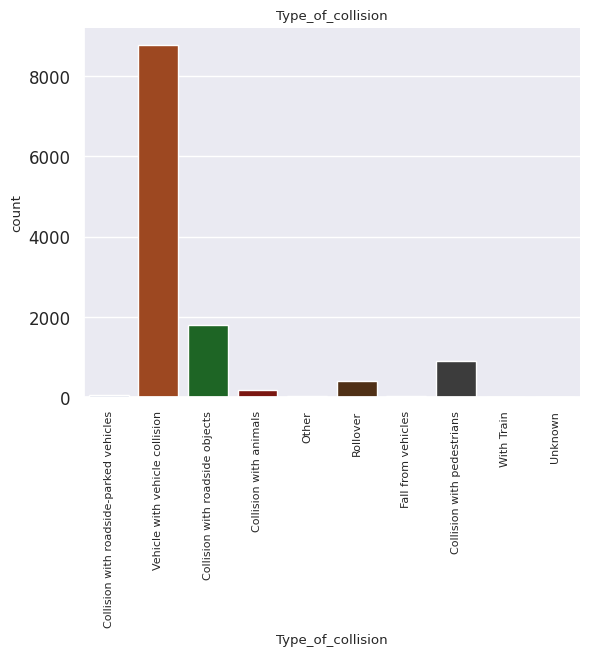

In [147]:
cp=sns.countplot(x=rta['Type_of_collision'],palette='dark')
plt.xticks(fontsize=8,rotation=90)
plt.yticks(fontsize=12)
plt.title('Type_of_collision')
sns.despine(top=True,right=True)

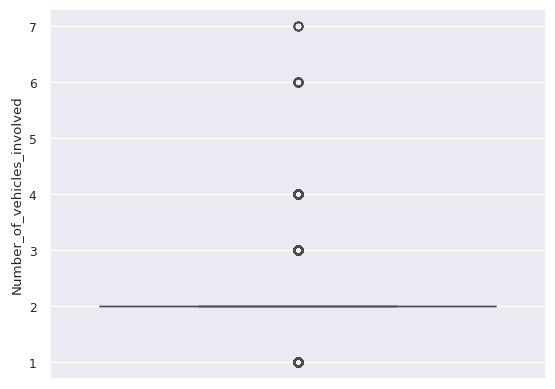

In [148]:
sns.boxplot(rta['Number_of_vehicles_involved'])
plt.show()

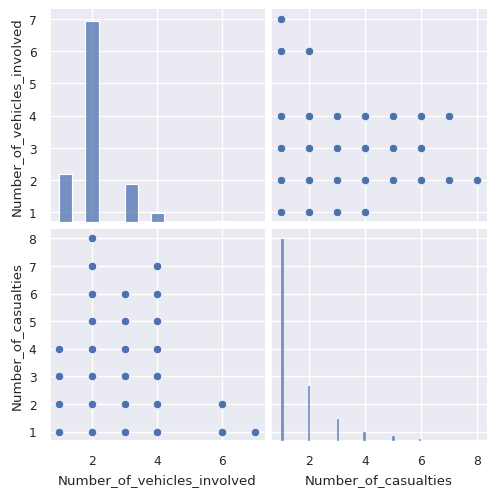

In [149]:
sns.pairplot(rta[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

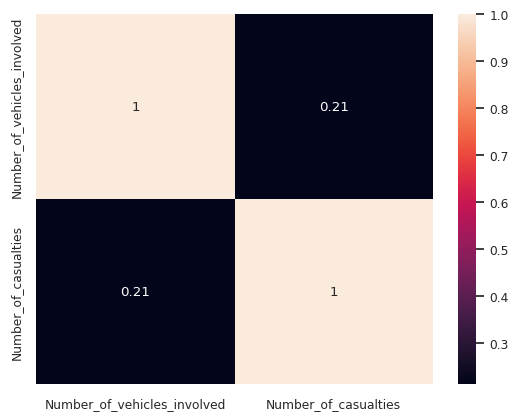

In [150]:
correlation_matrix=rta[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

inference on type of collision:
* Majority of accidents occured in vehicle-vehicle collision
* the number of vehicles involved of vehicles involved is 2 in majority of accidents
* major cause of accidents is not keeping sufficient distance between vehicles and lane changing

## cause of Accident

In [151]:
rta['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

In [152]:
rta['Pedestrian_movement'].value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle       13
Walking along in carriageway, facing traffic                                                                                                 7
Name: count, dtype: int64

## Target variable

In [153]:
rta['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

**inference**:-

So,the target variable has 3 occcassions,where slightly injury marks higher

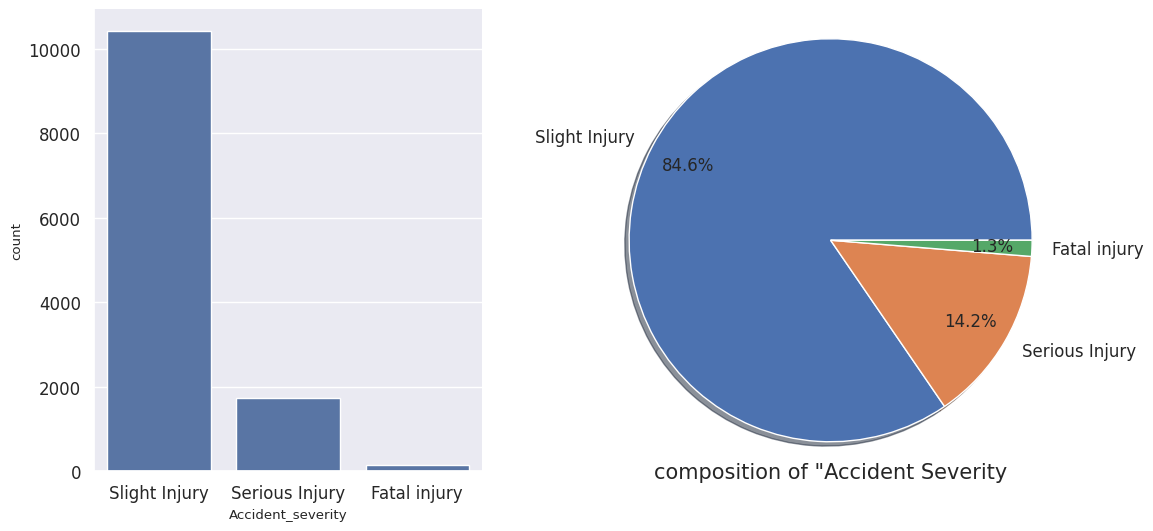

In [154]:
plt.figure(figsize=(12,6))
#barplot
ax1=plt.subplot(1,2,1)
cp=sns.countplot(x=rta['Accident_severity'])
ax1.set_xlabel('Accident_severity')
ax1.set_ylabel('count')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True,right=True)
#pieplot
ax2=plt.subplot(1,2,2)
plt.pie(x=rta['Accident_severity'].value_counts(),
labels=list(rta['Accident_severity'].unique()),autopct='%1.1f%%',
pctdistance=0.8,shadow=True,radius=1.3,textprops={'fontsize':12})
ax2.set_xlabel('')
plt.xlabel('composition of "Accident Severity',fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

**Inference**
* 84% of accidents led to sligh injuries
* There is large difference between slight injuries and serious injuries
* only 1.3% of people died in accidents instant deaths are less most people survived with slight injuries and few survived with very serious injuries

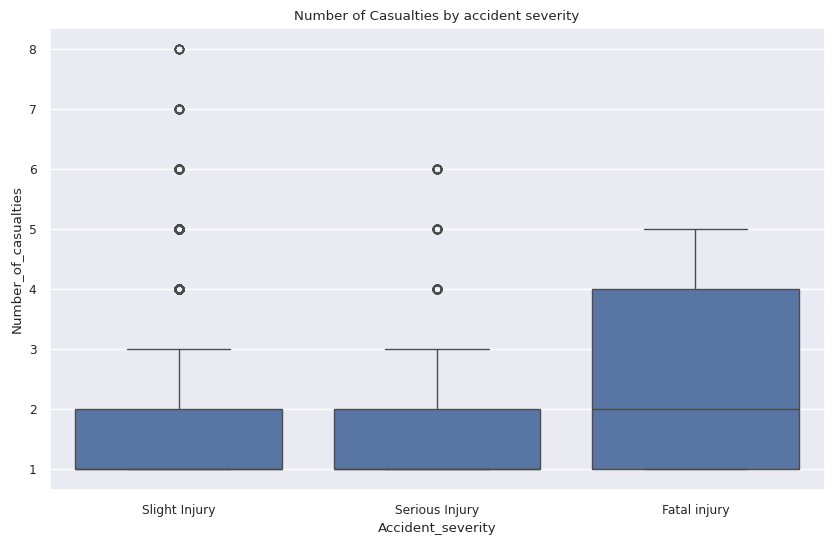

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Accident_severity',y='Number_of_casualties',data=rta)
plt.title('Number of Casualties by accident severity')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/

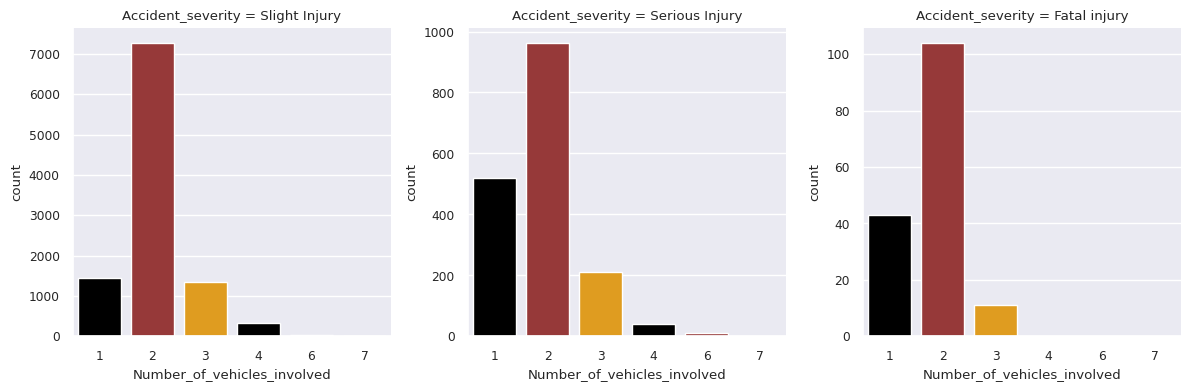

In [156]:
grid=sns.FacetGrid(data=rta,col="Accident_severity",height=4,aspect=1,sharey=False)
grid.map(sns.countplot,'Number_of_vehicles_involved',palette=['black','brown','orange'])
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/

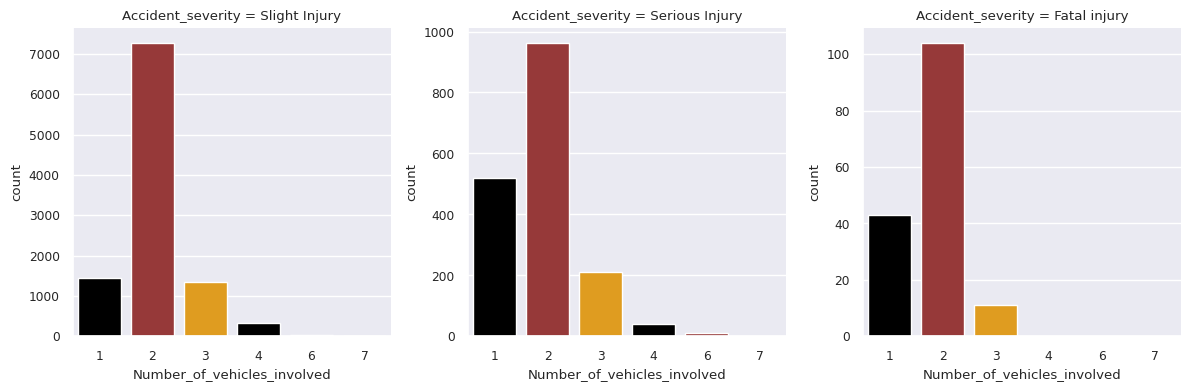

In [157]:
#creating a facet grid with columns as survived=0 and survived=1
grid=sns.FacetGrid(data=rta,col='Accident_severity',height=4,aspect=1,sharey=False)
#mapping bar plot and the data on to the grid
grid.map(sns.countplot,'Number_of_vehicles_involved',palette=['black','brown','orange'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

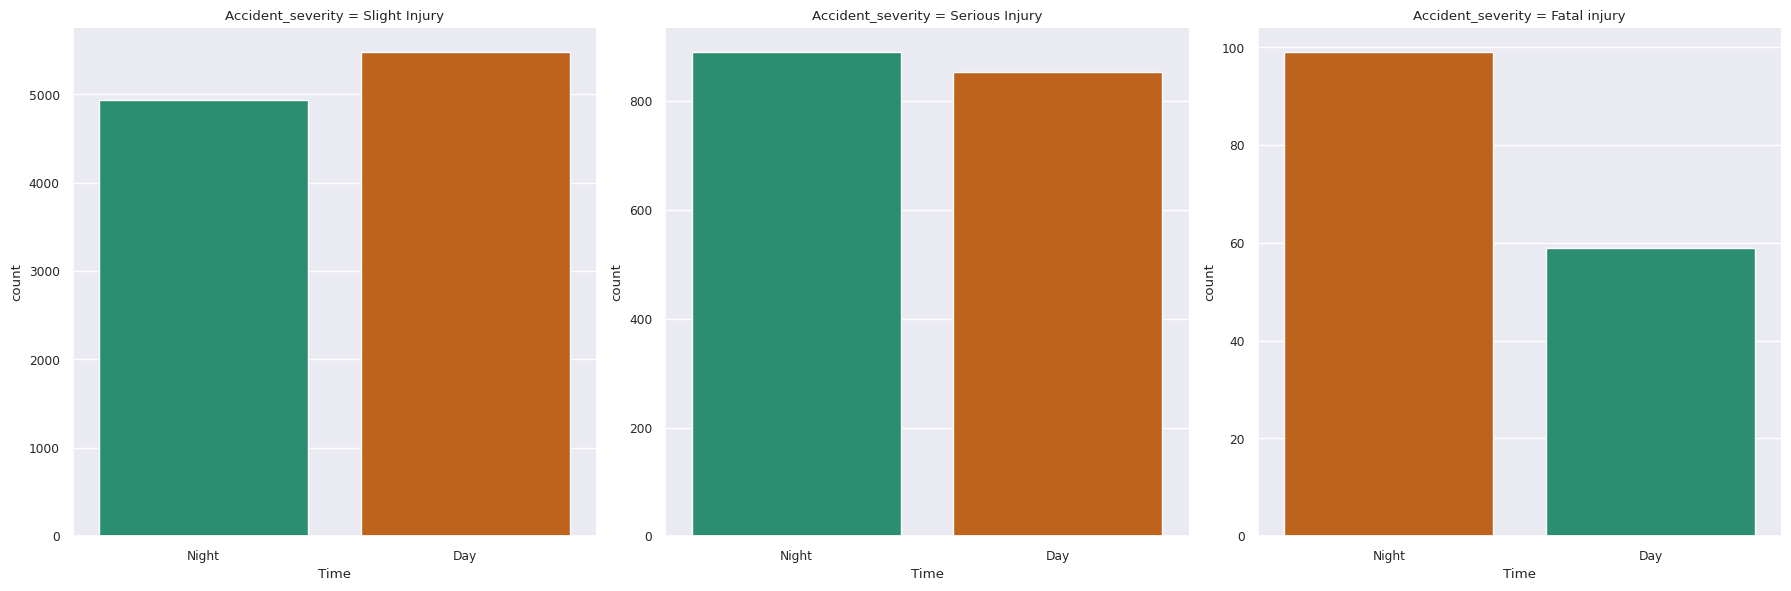

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

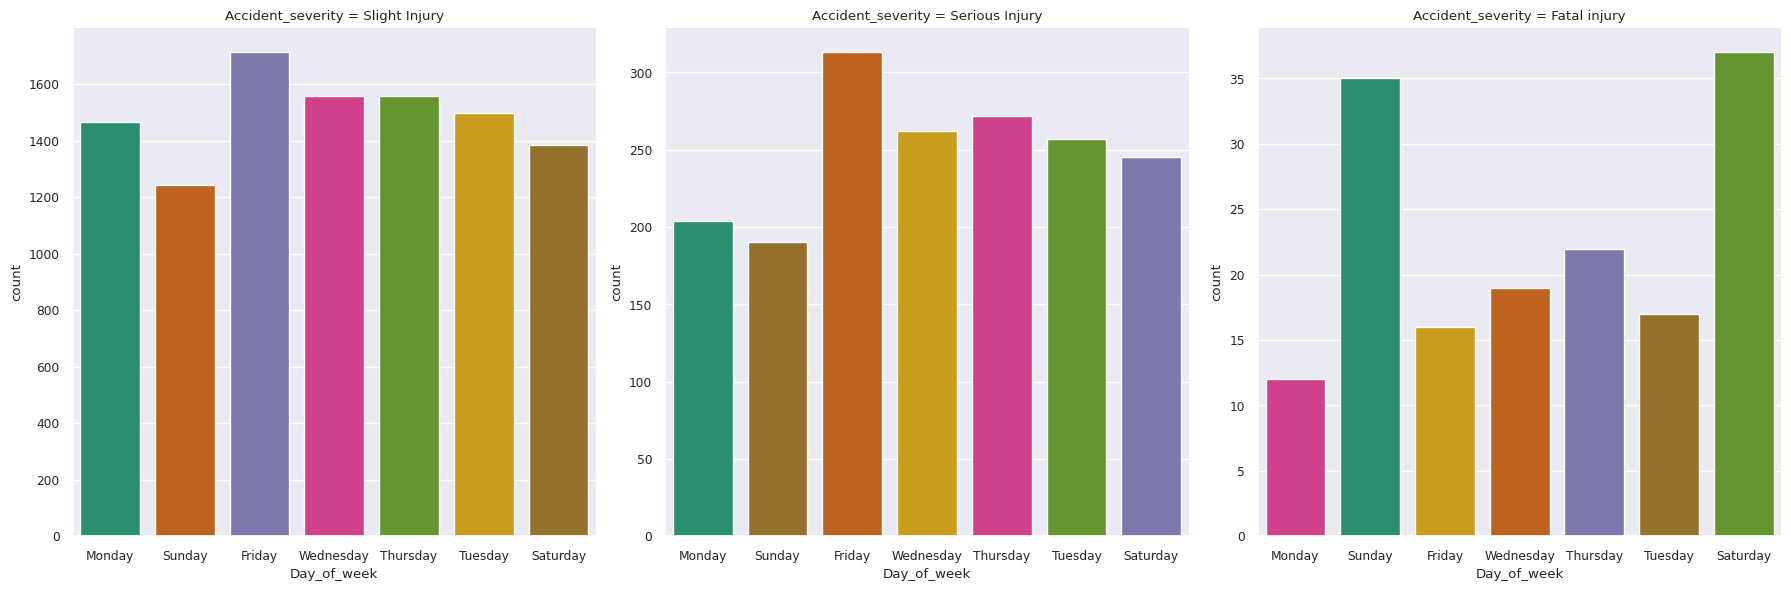

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

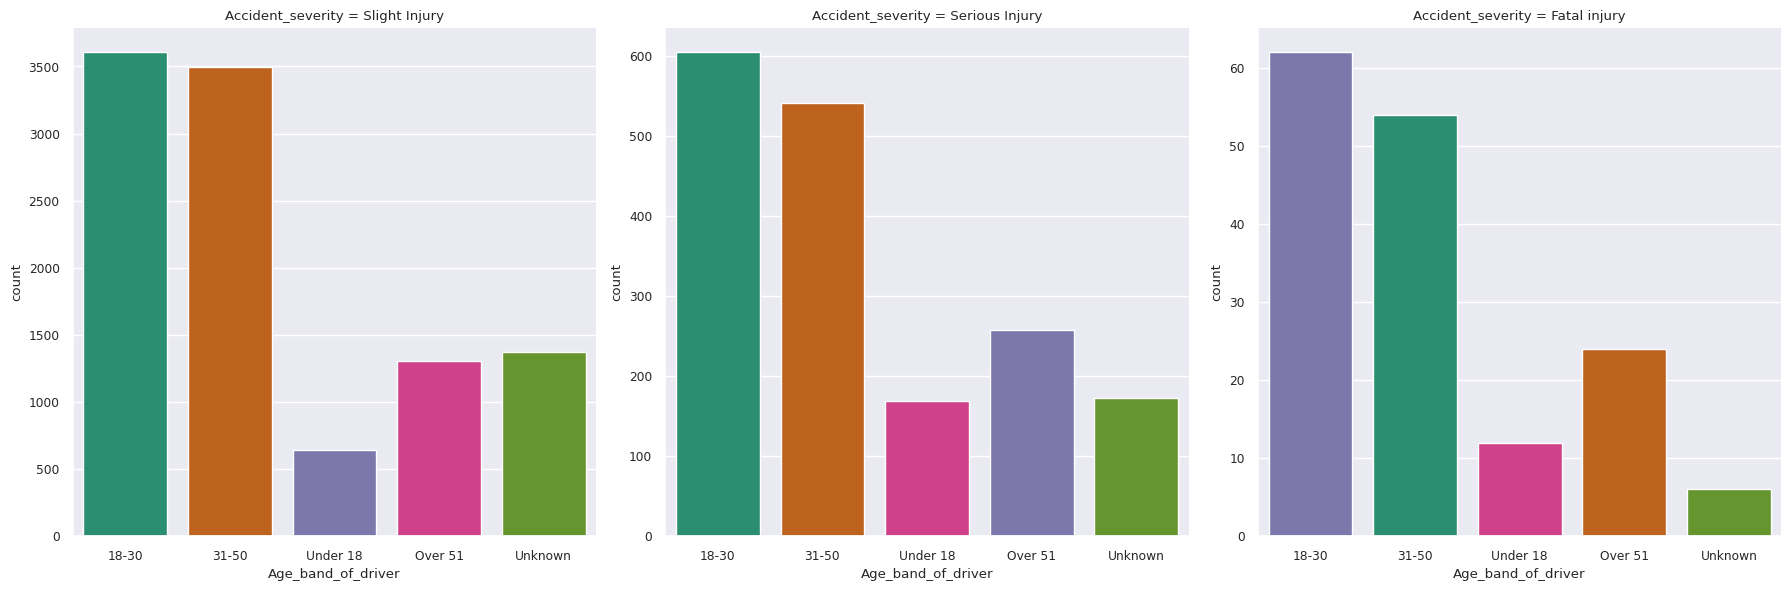

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

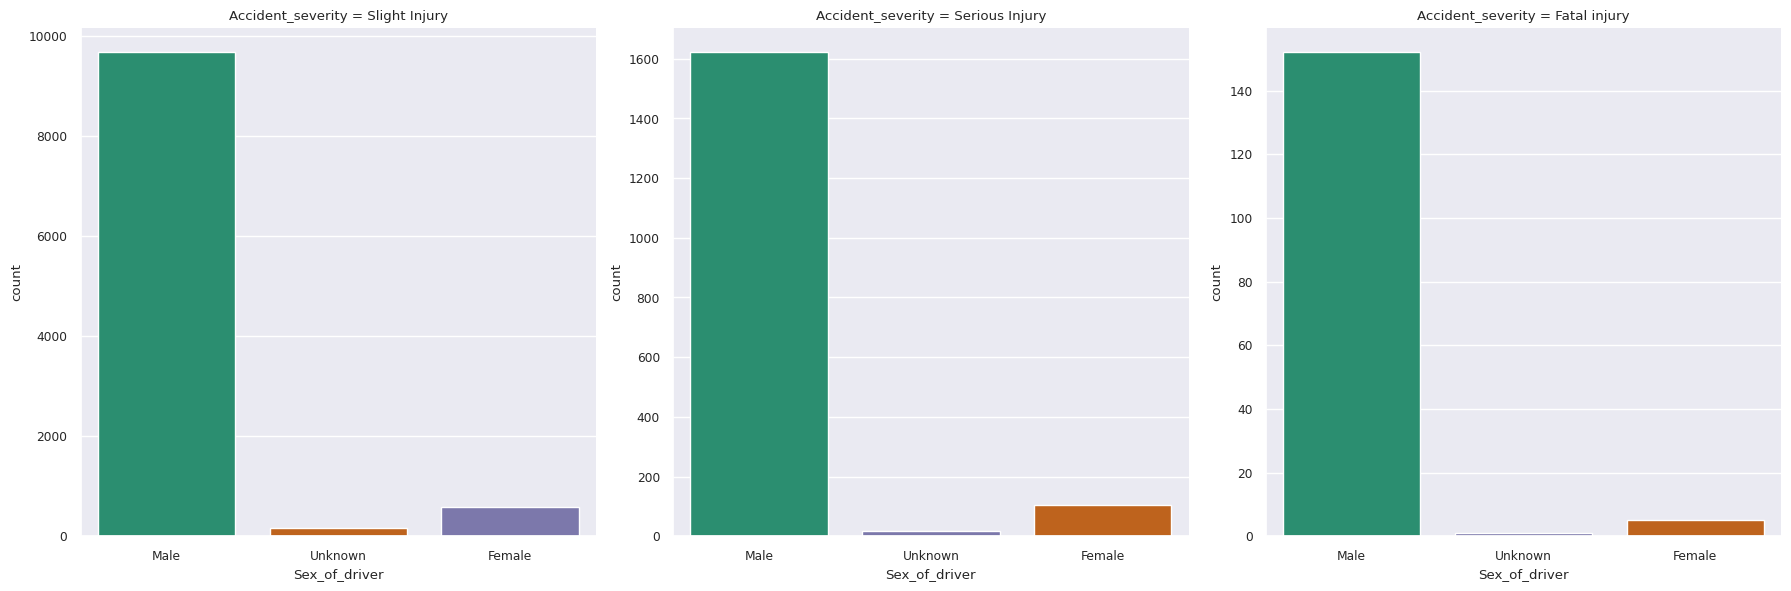

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

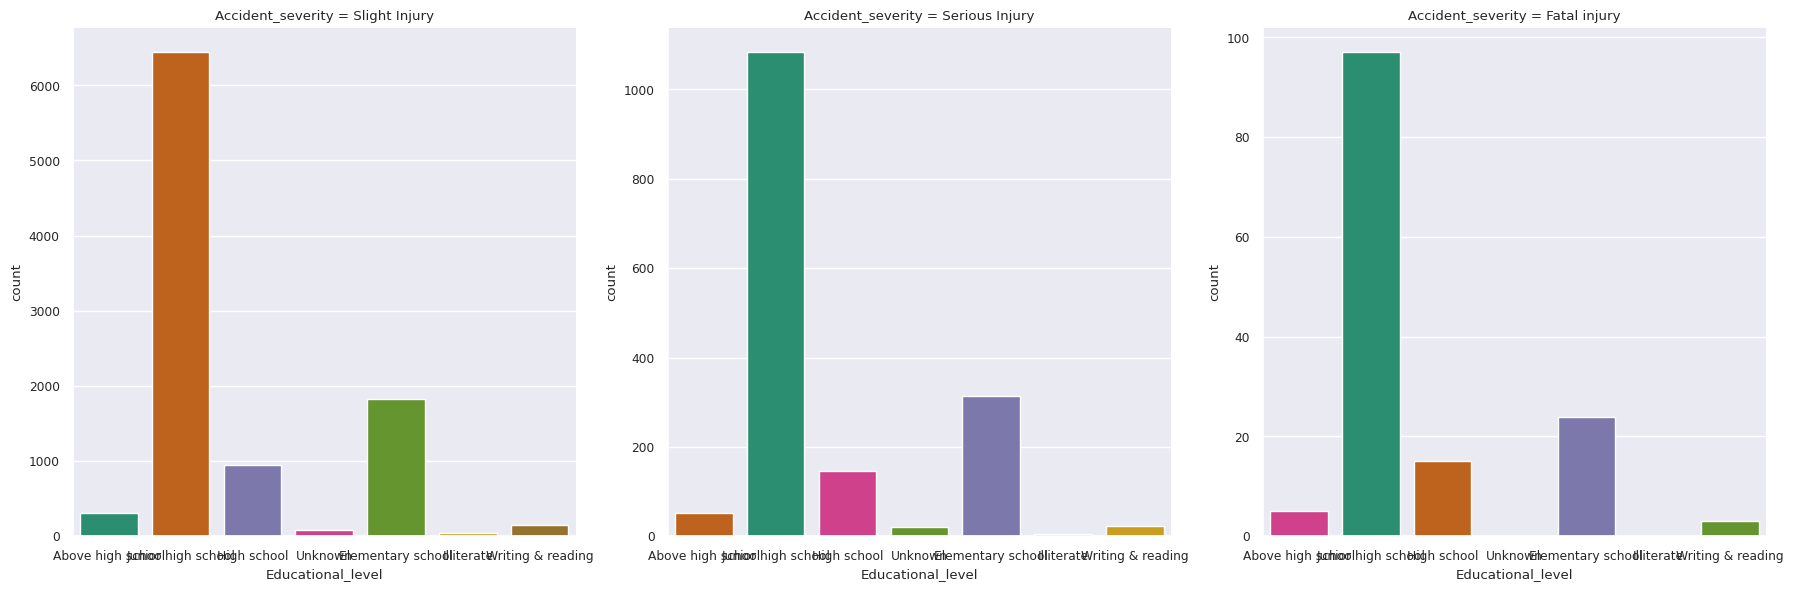

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

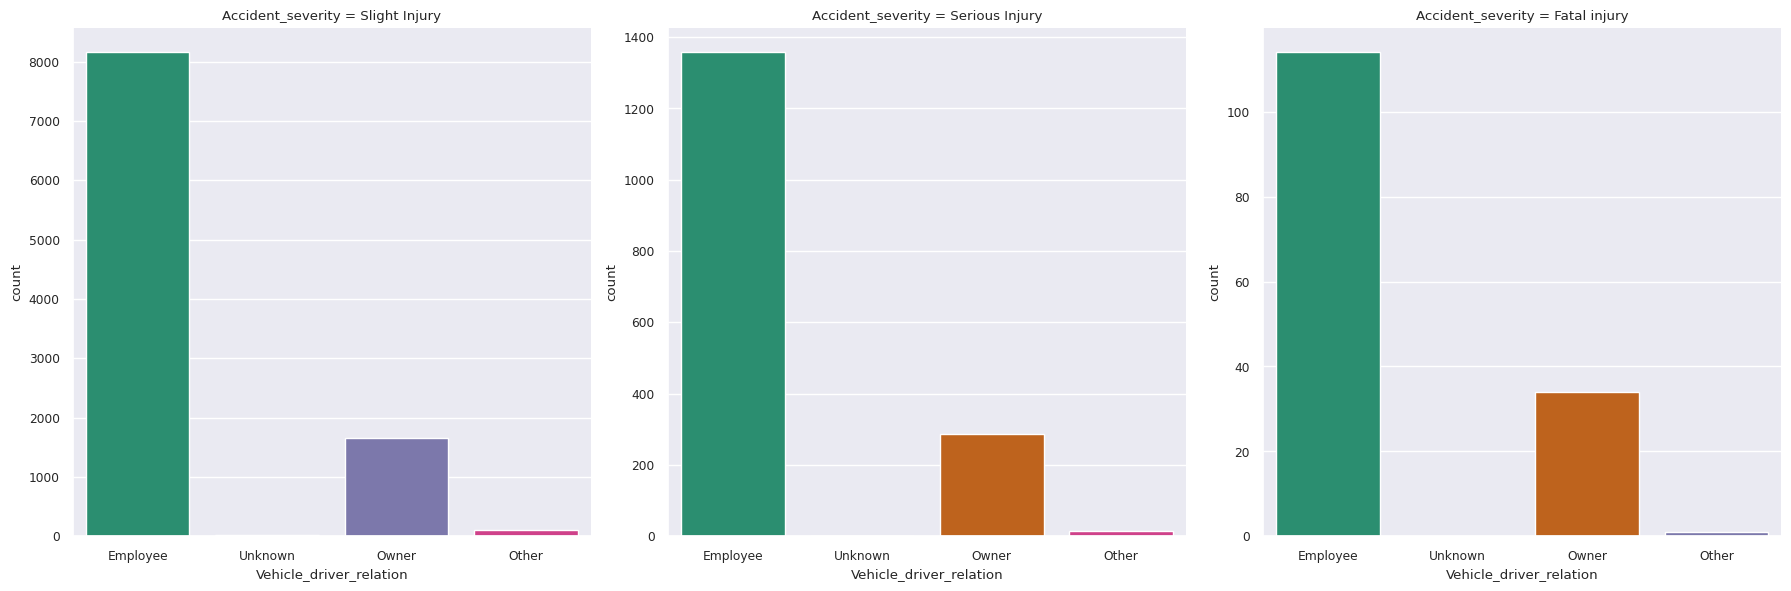

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

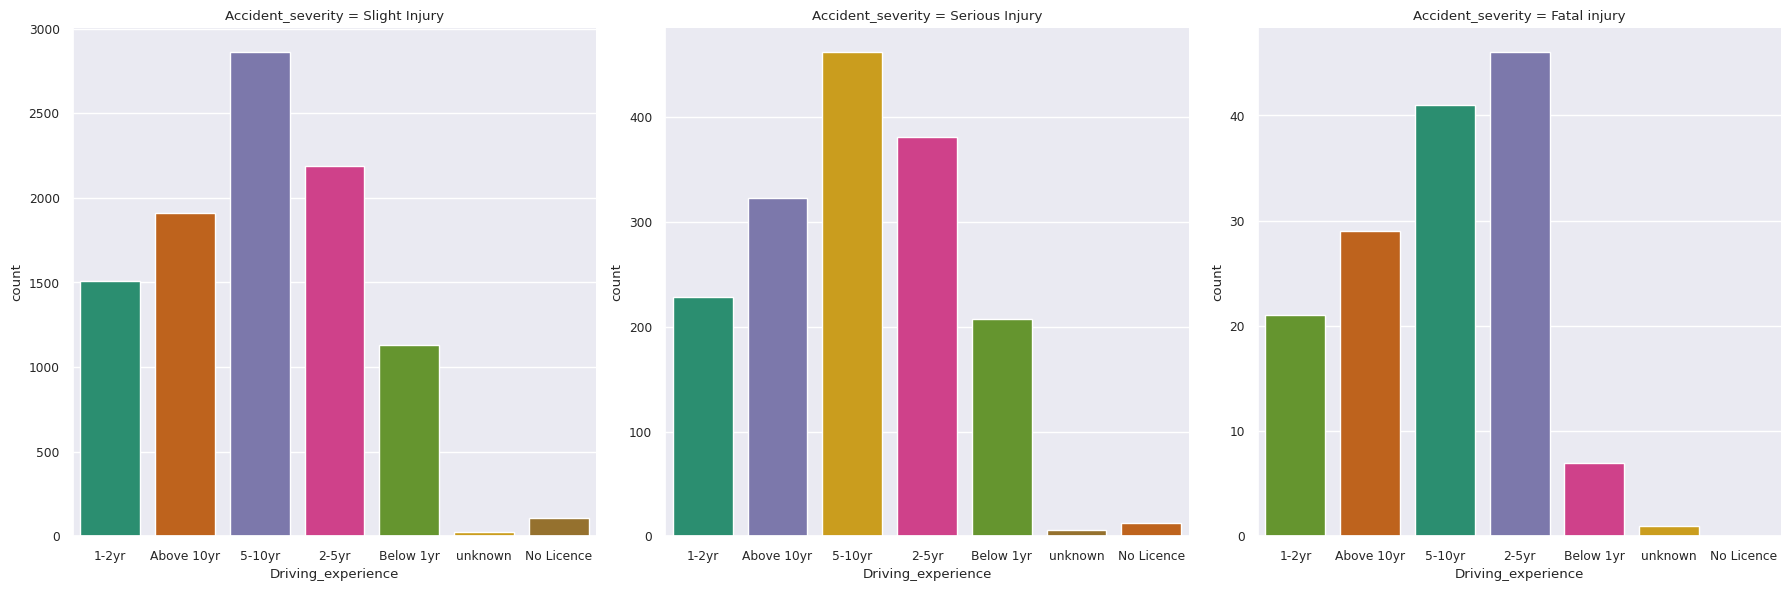

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

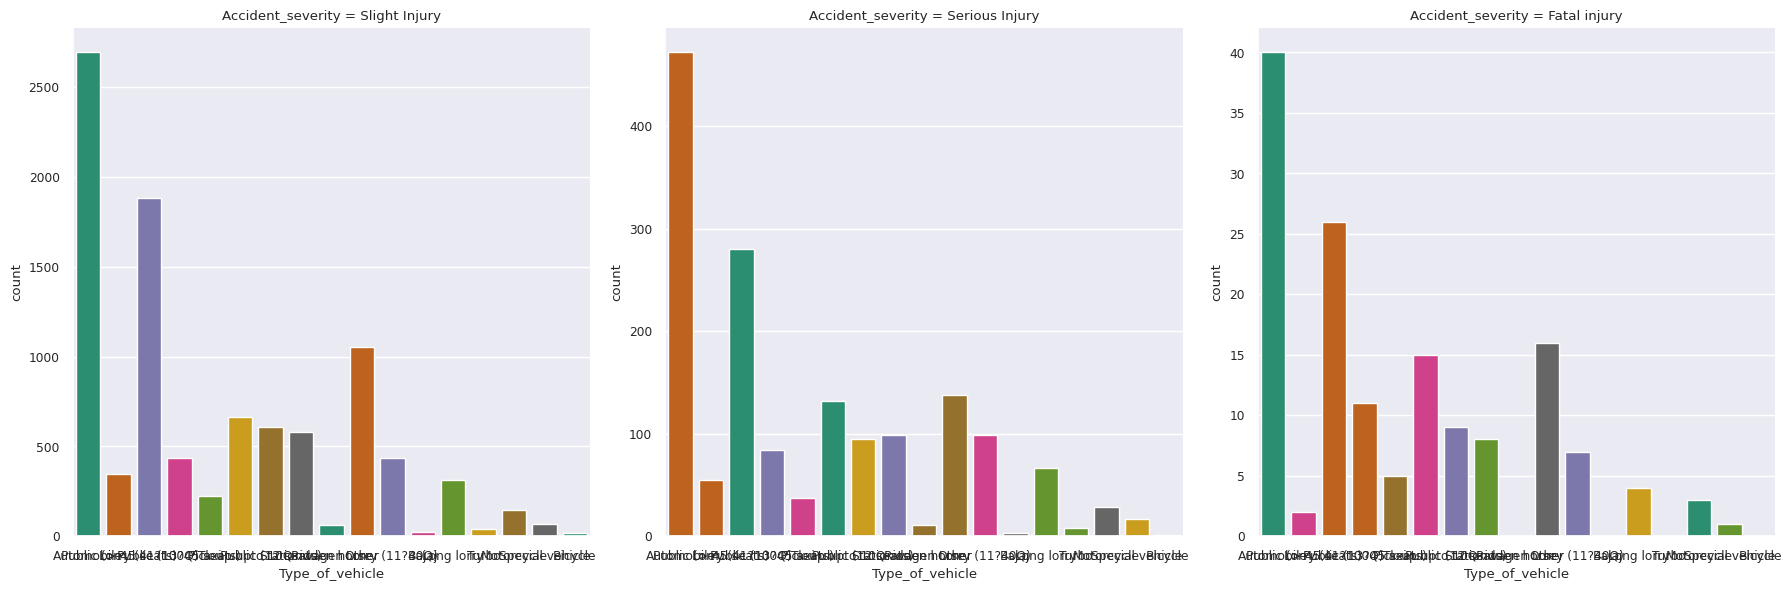

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

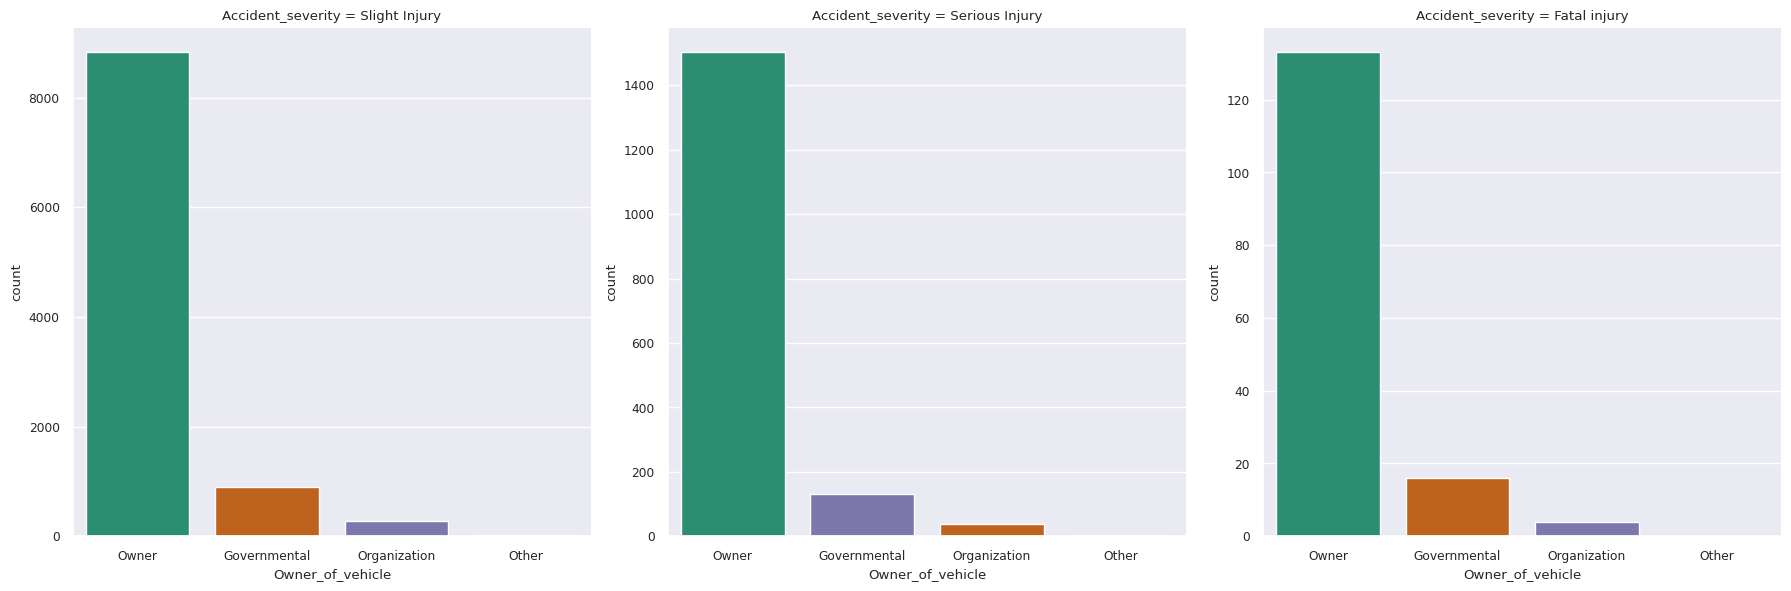

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

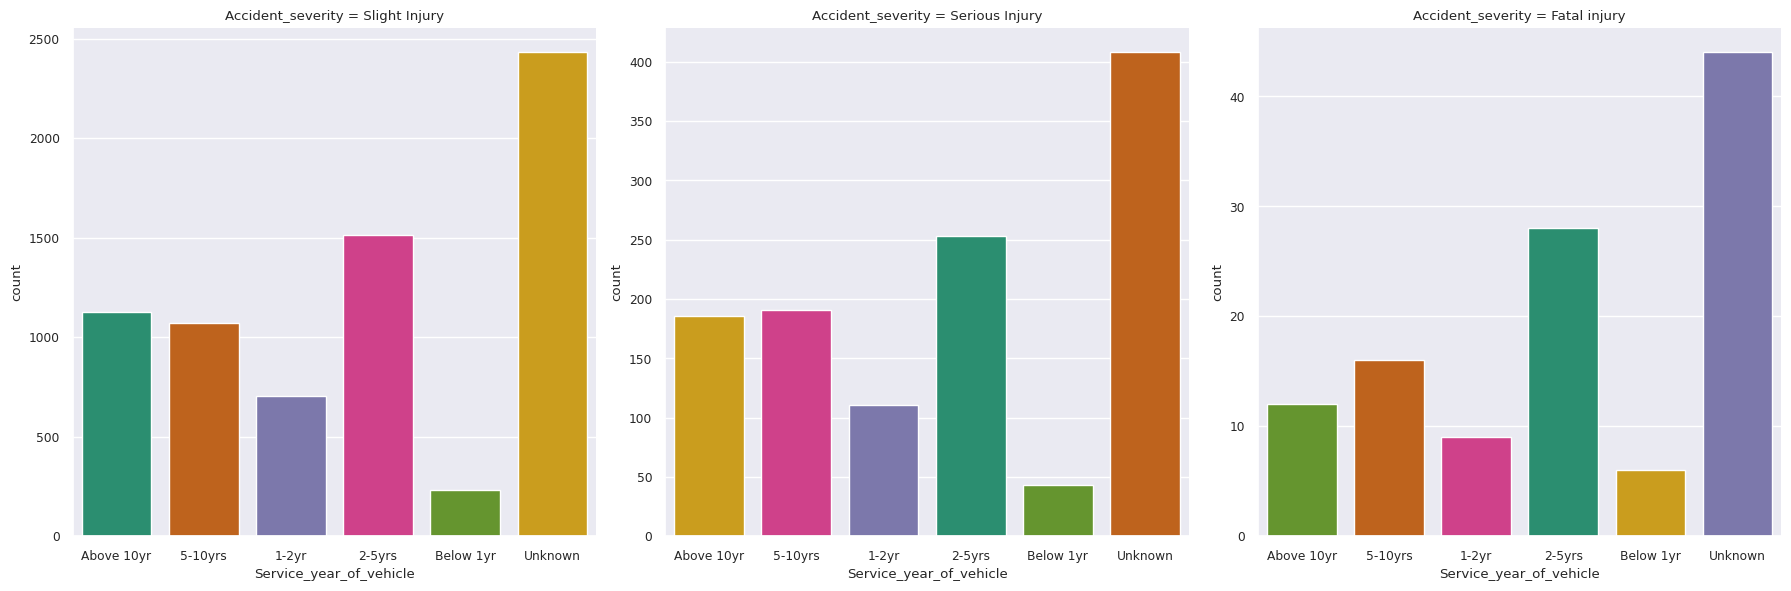

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

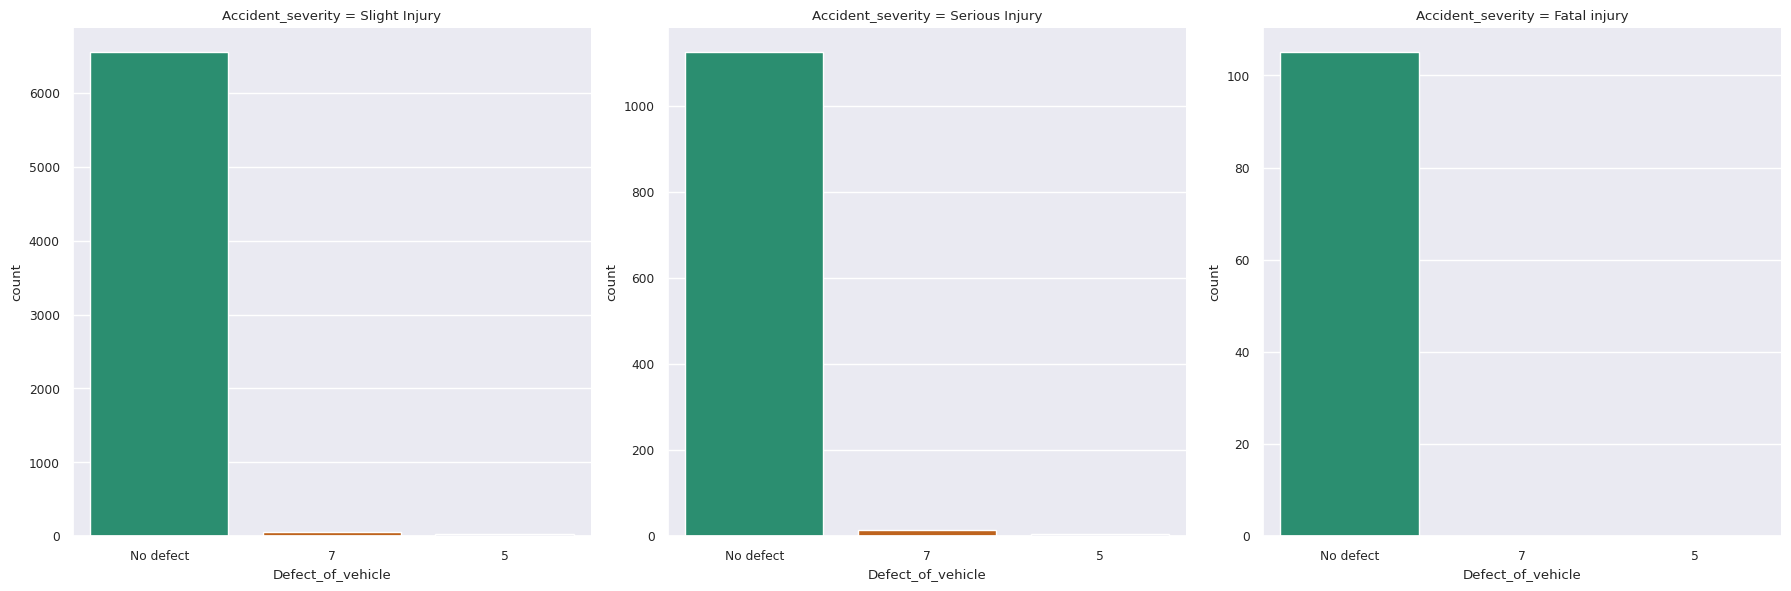

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

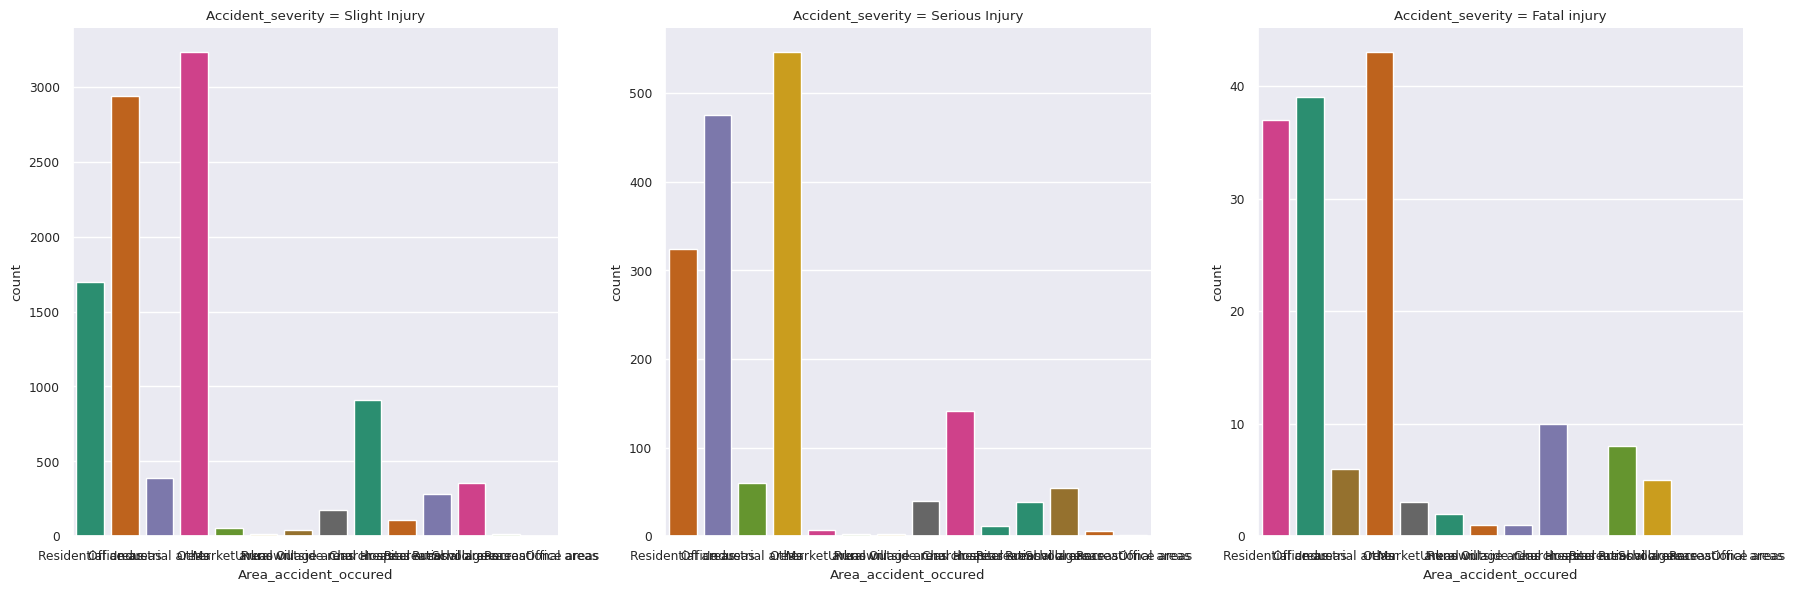

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

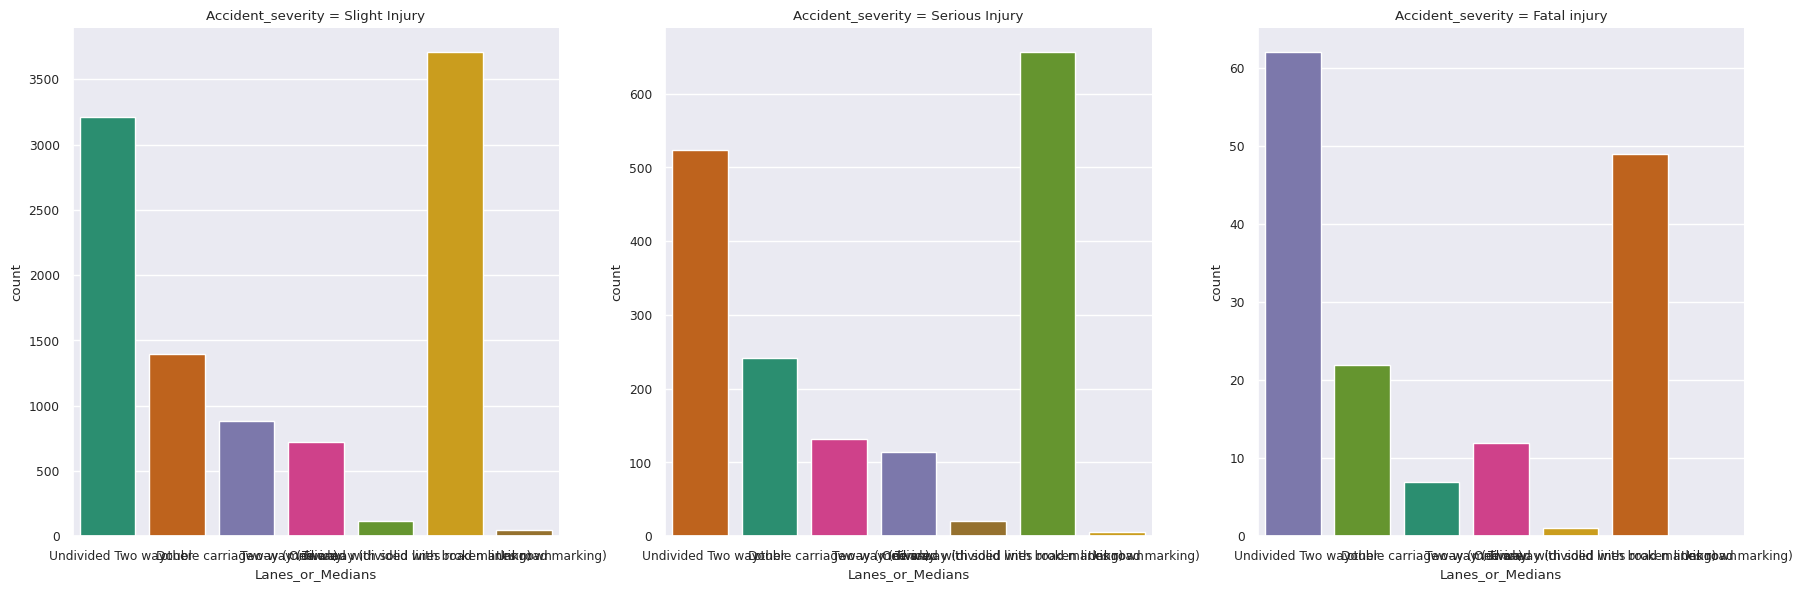

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

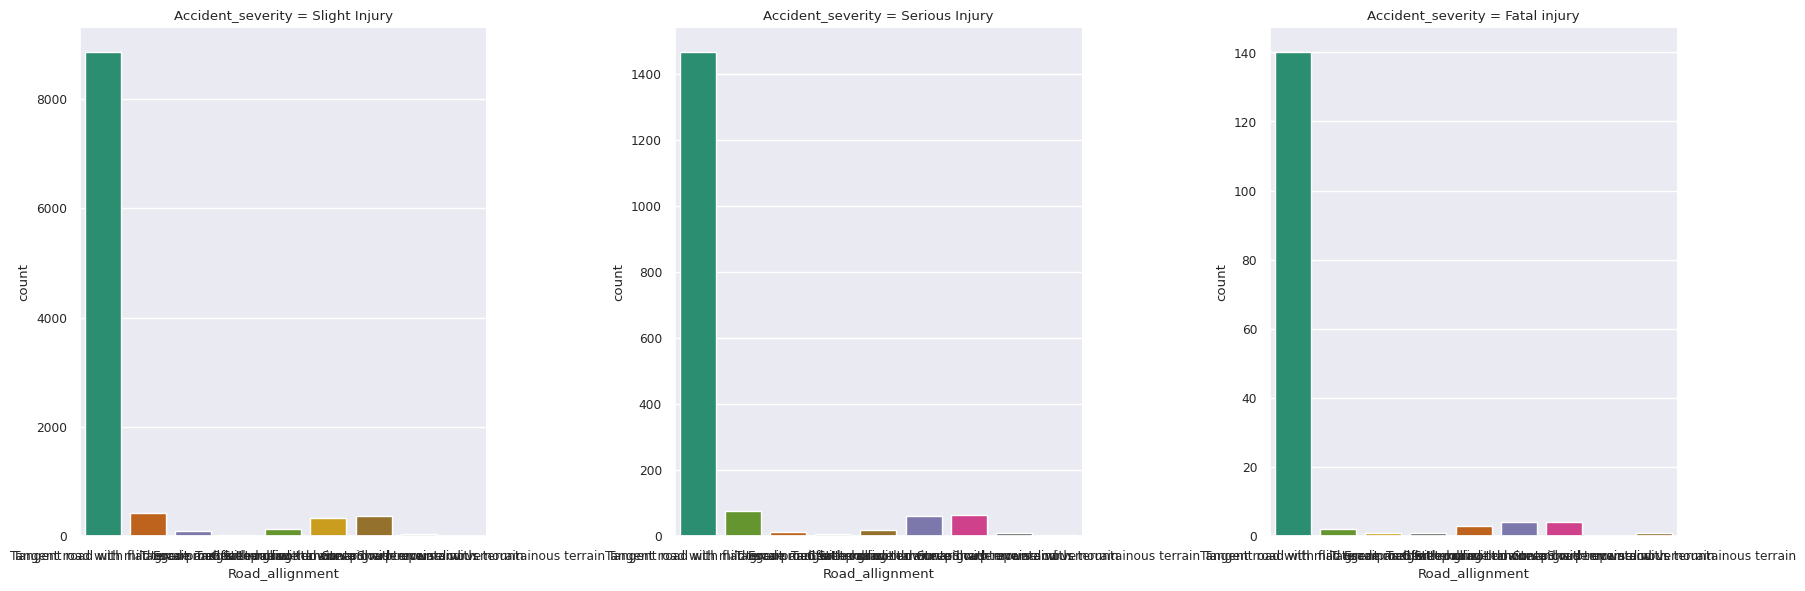

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

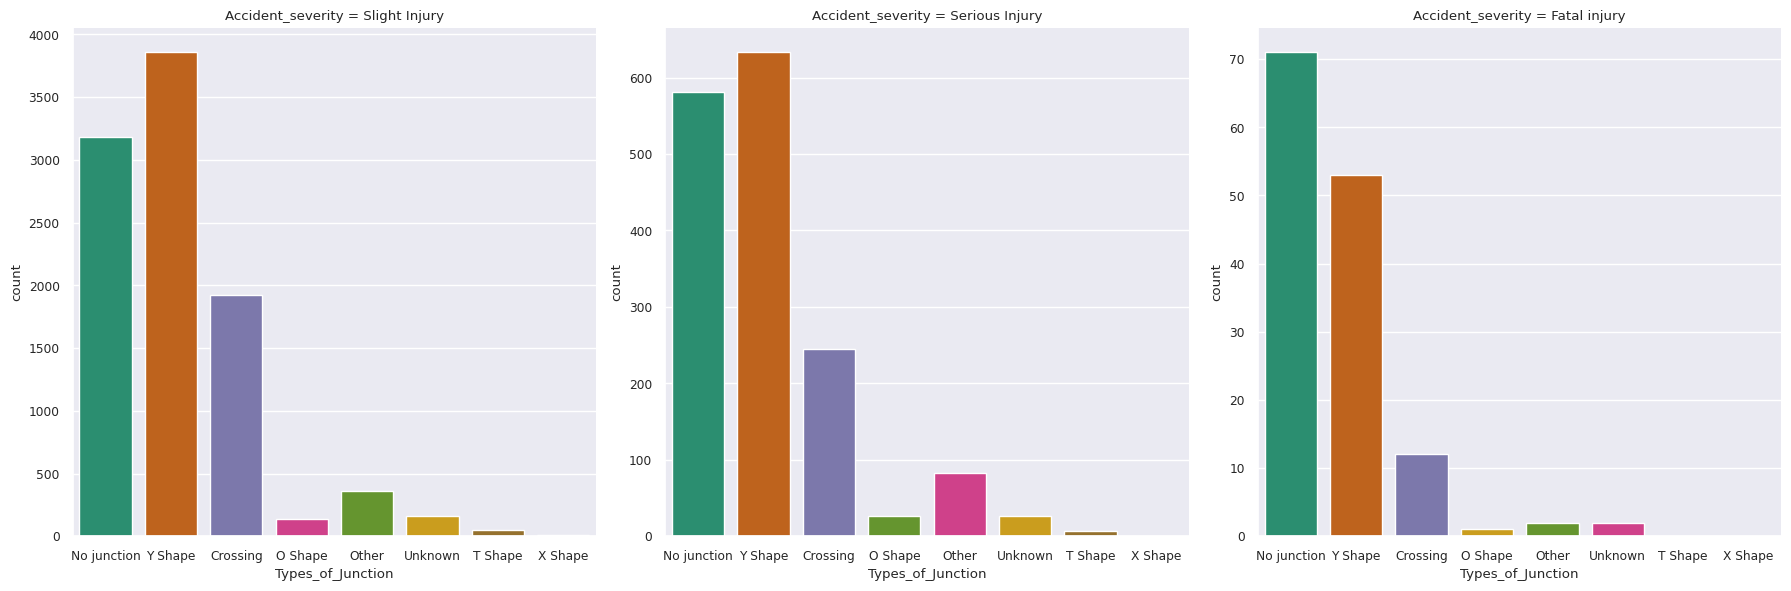

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

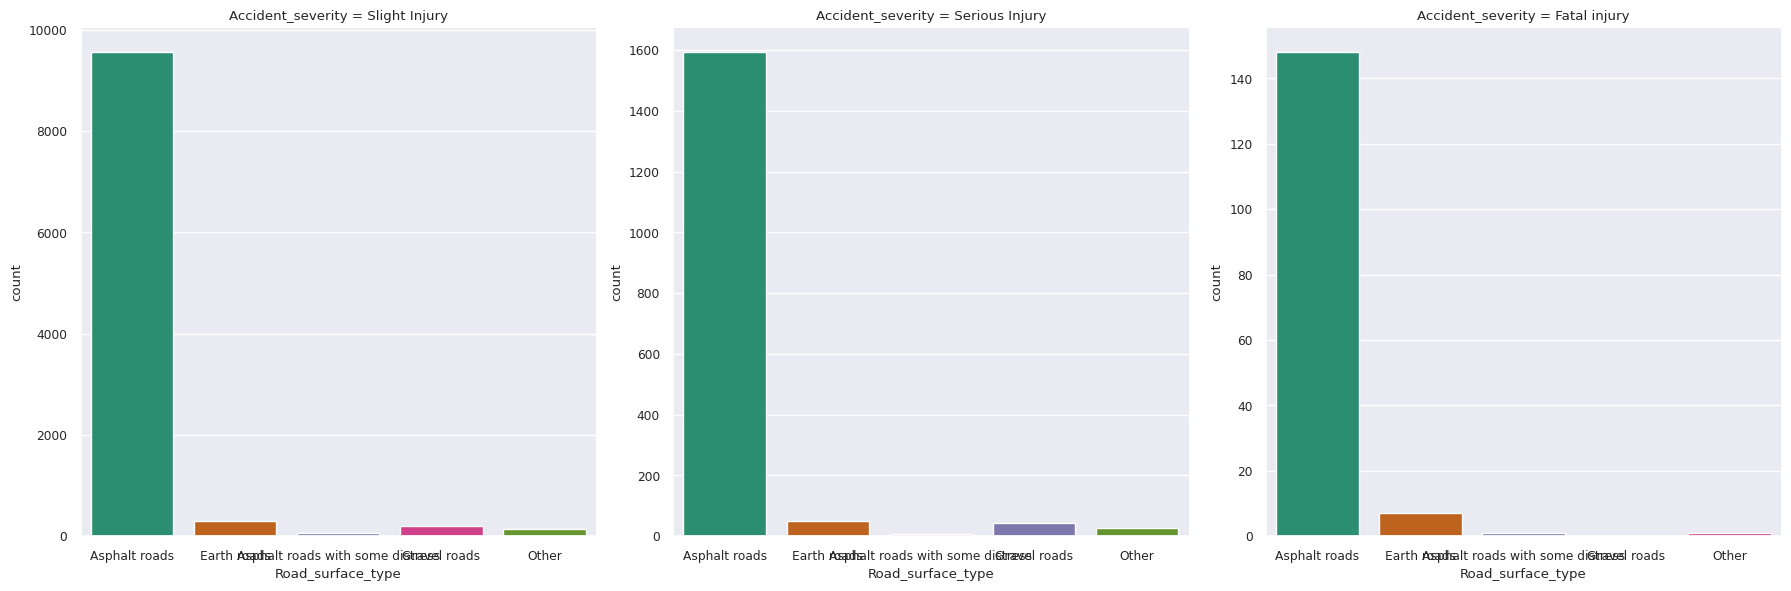

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

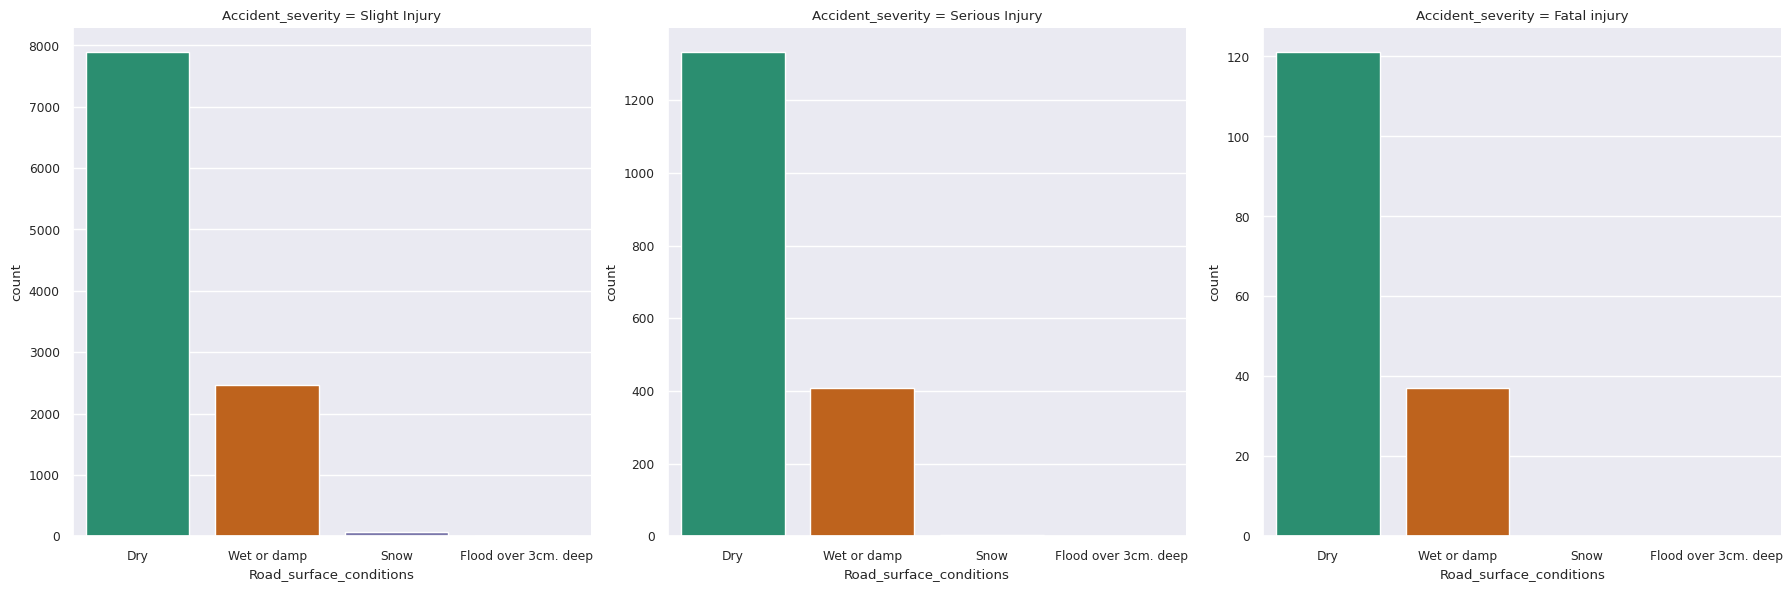

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

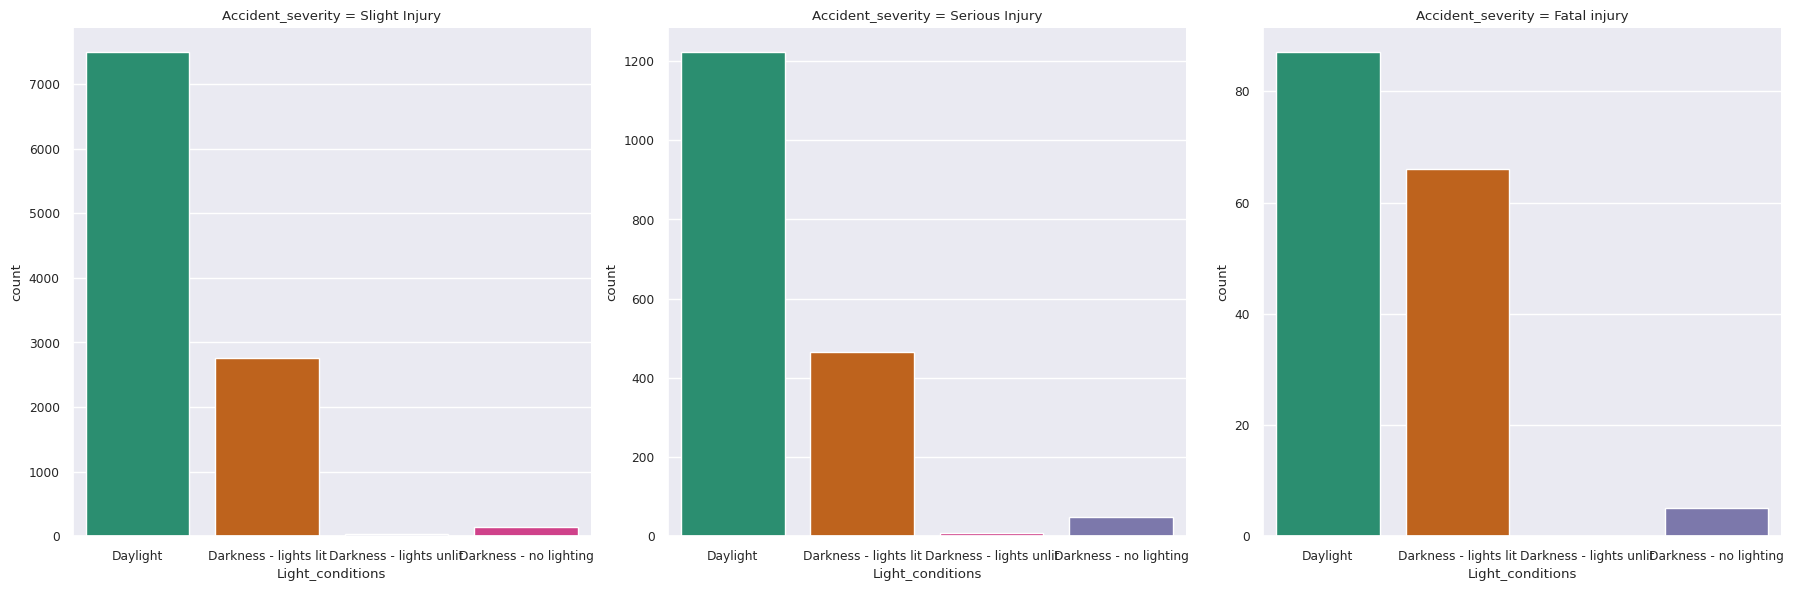

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

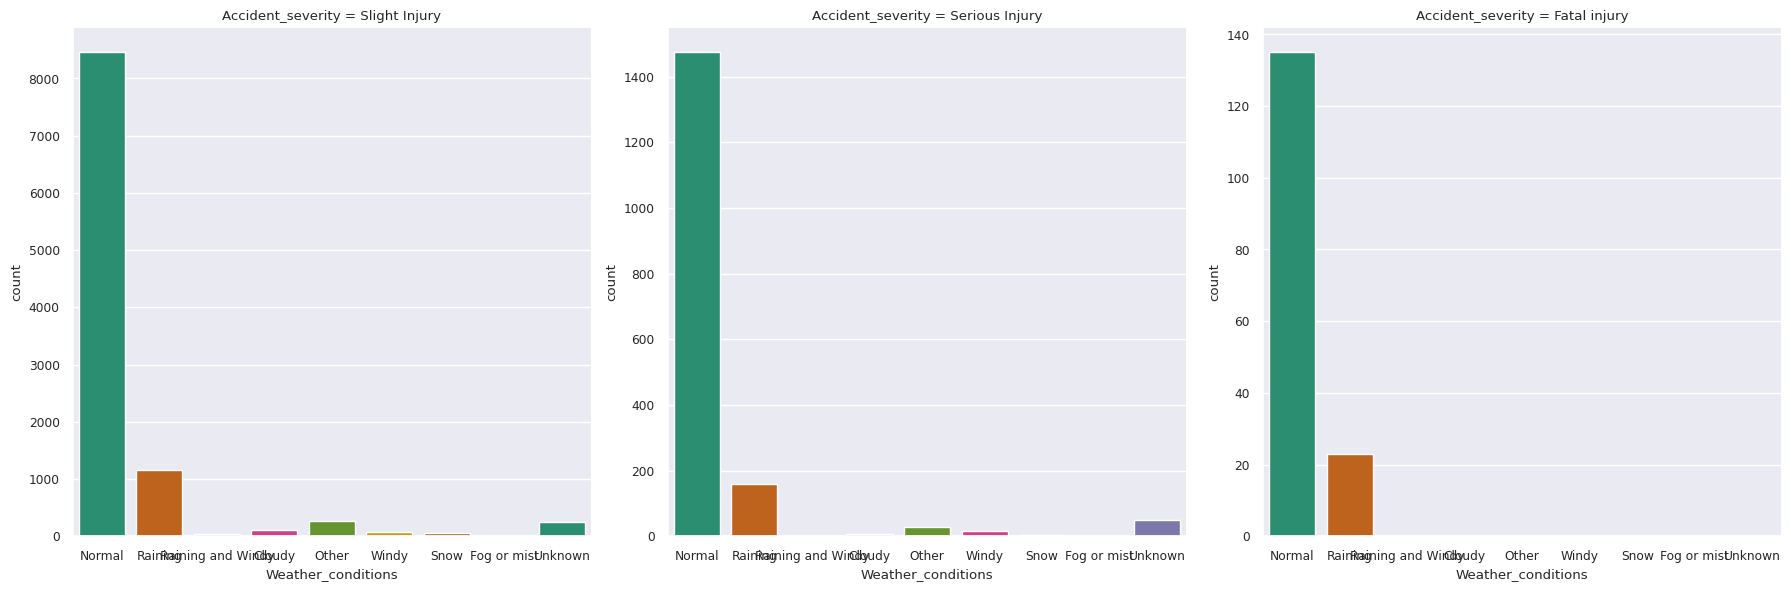

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

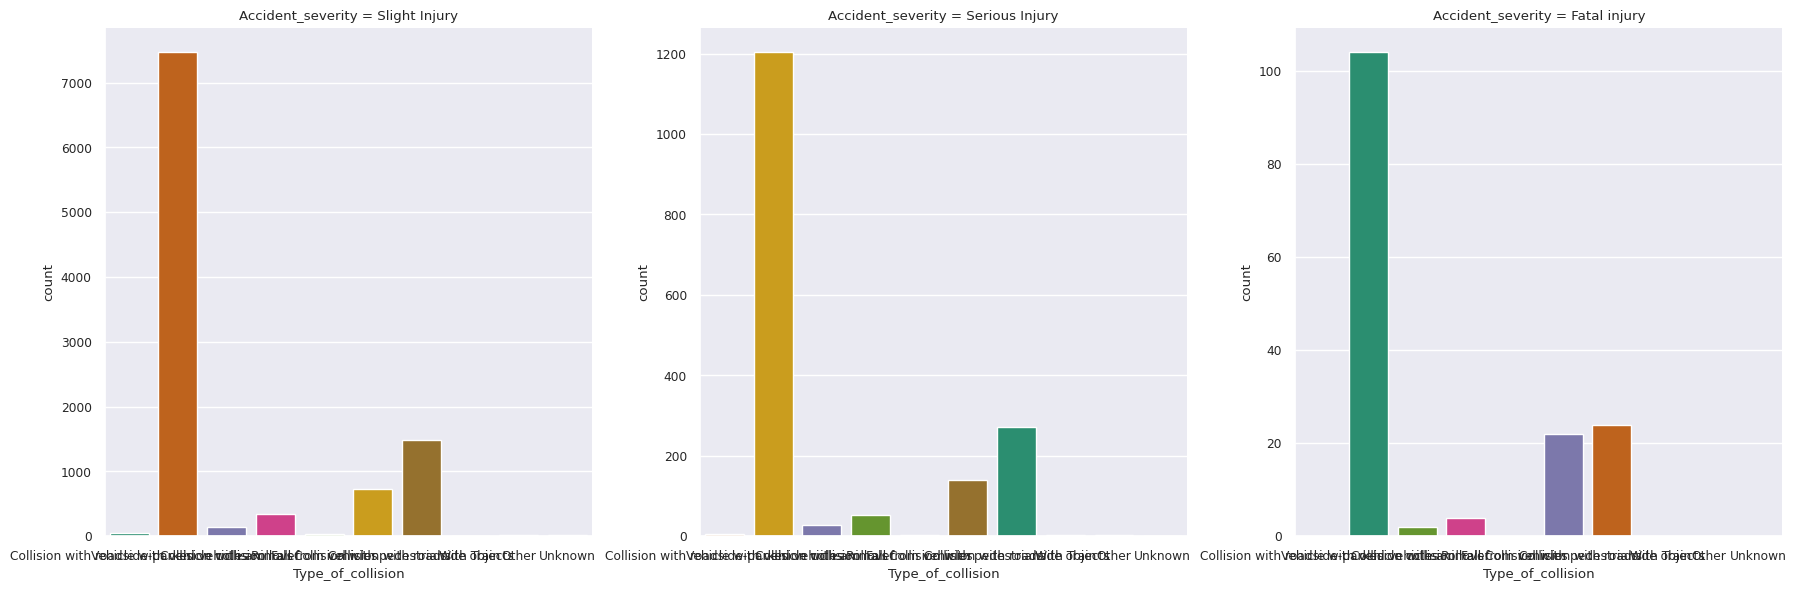

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

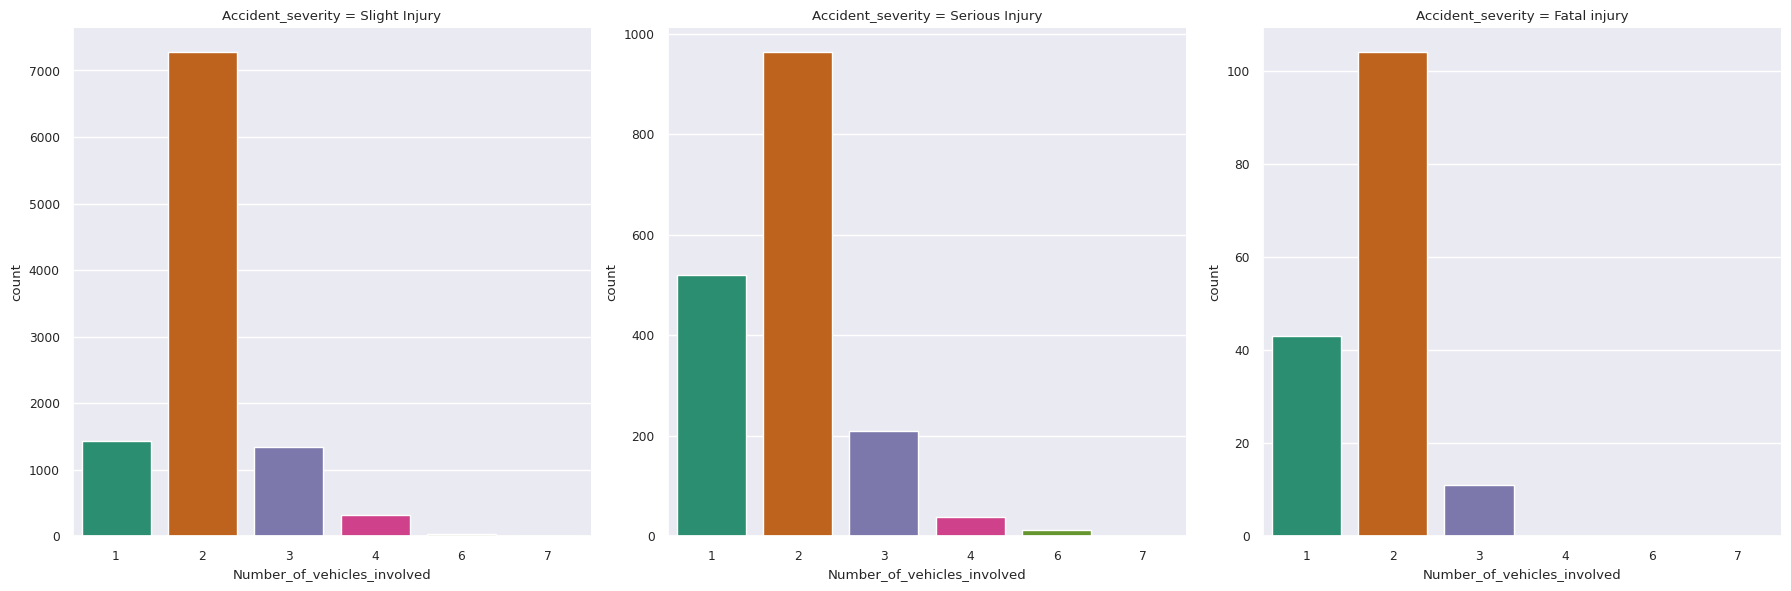

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

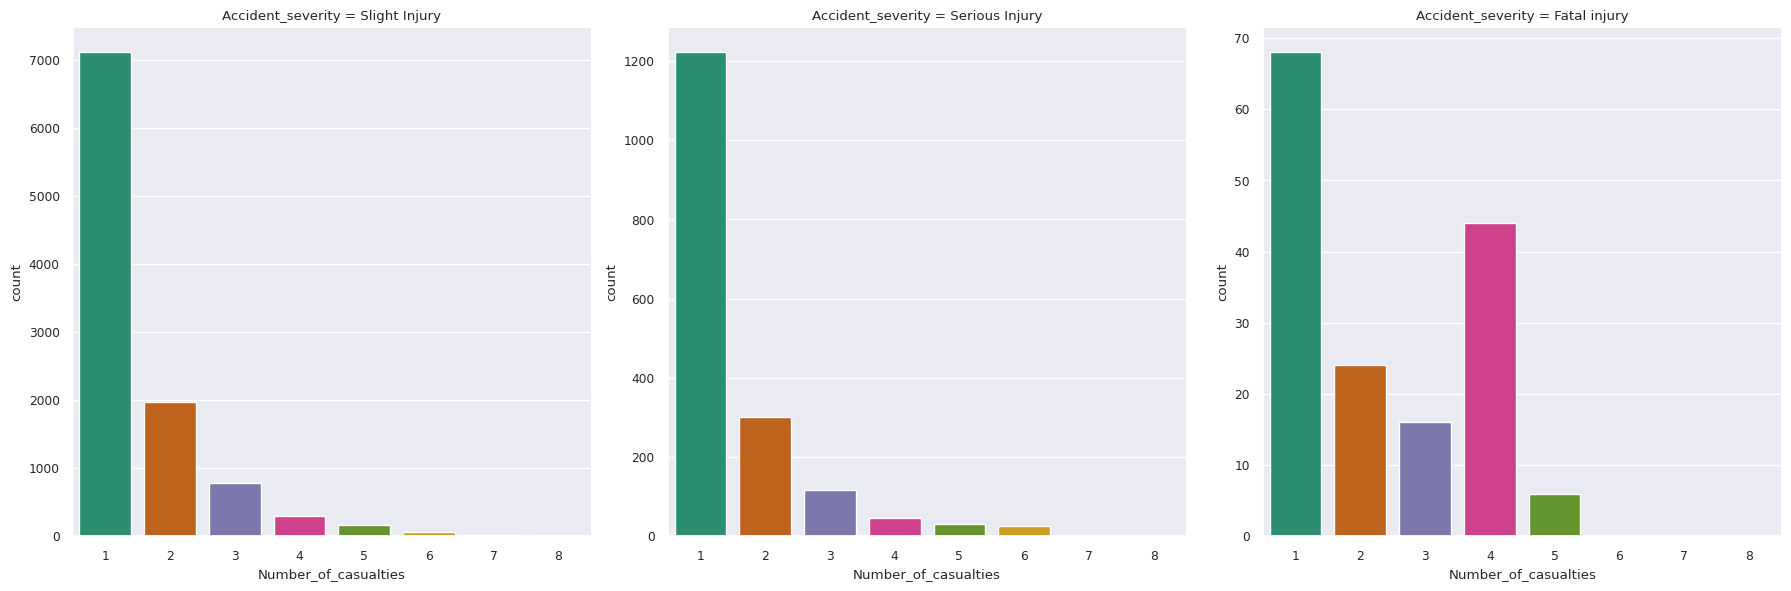

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

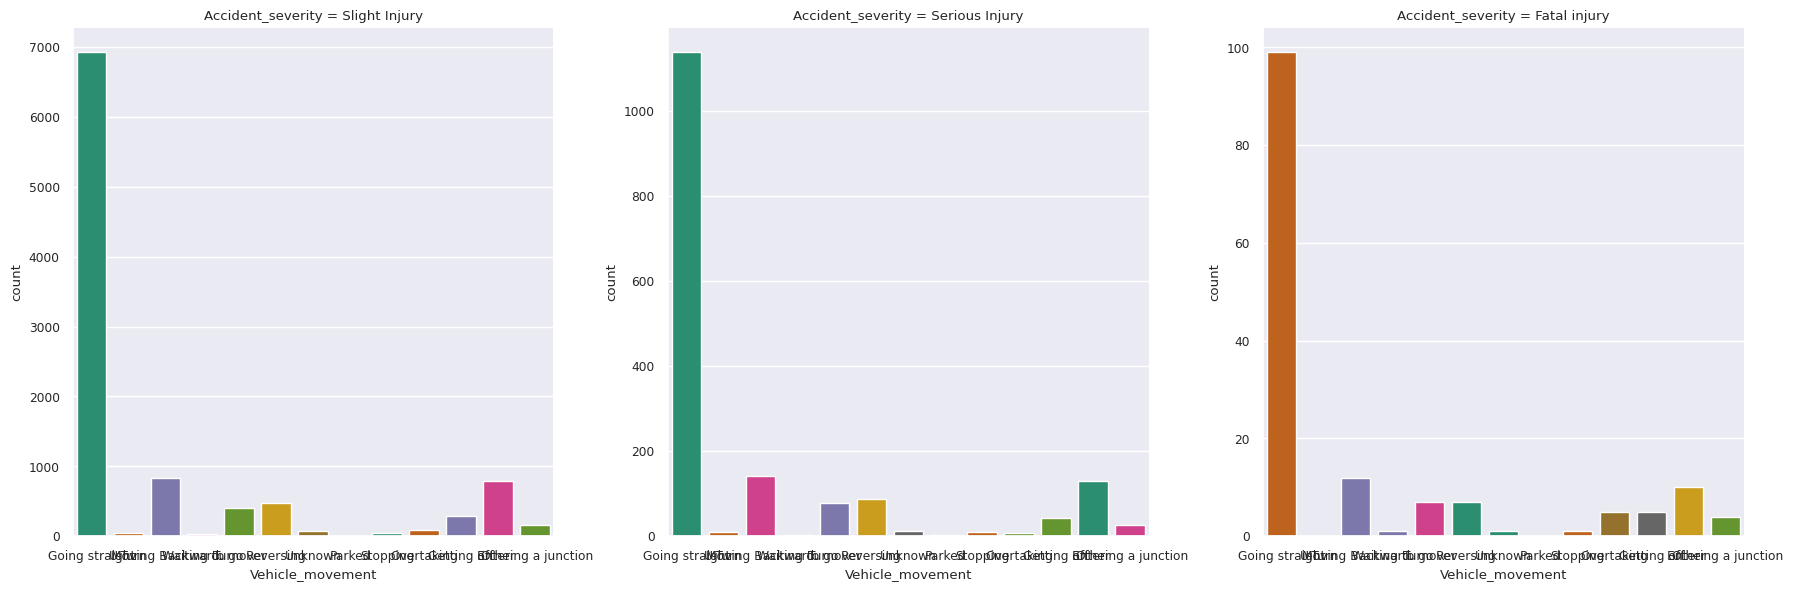

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

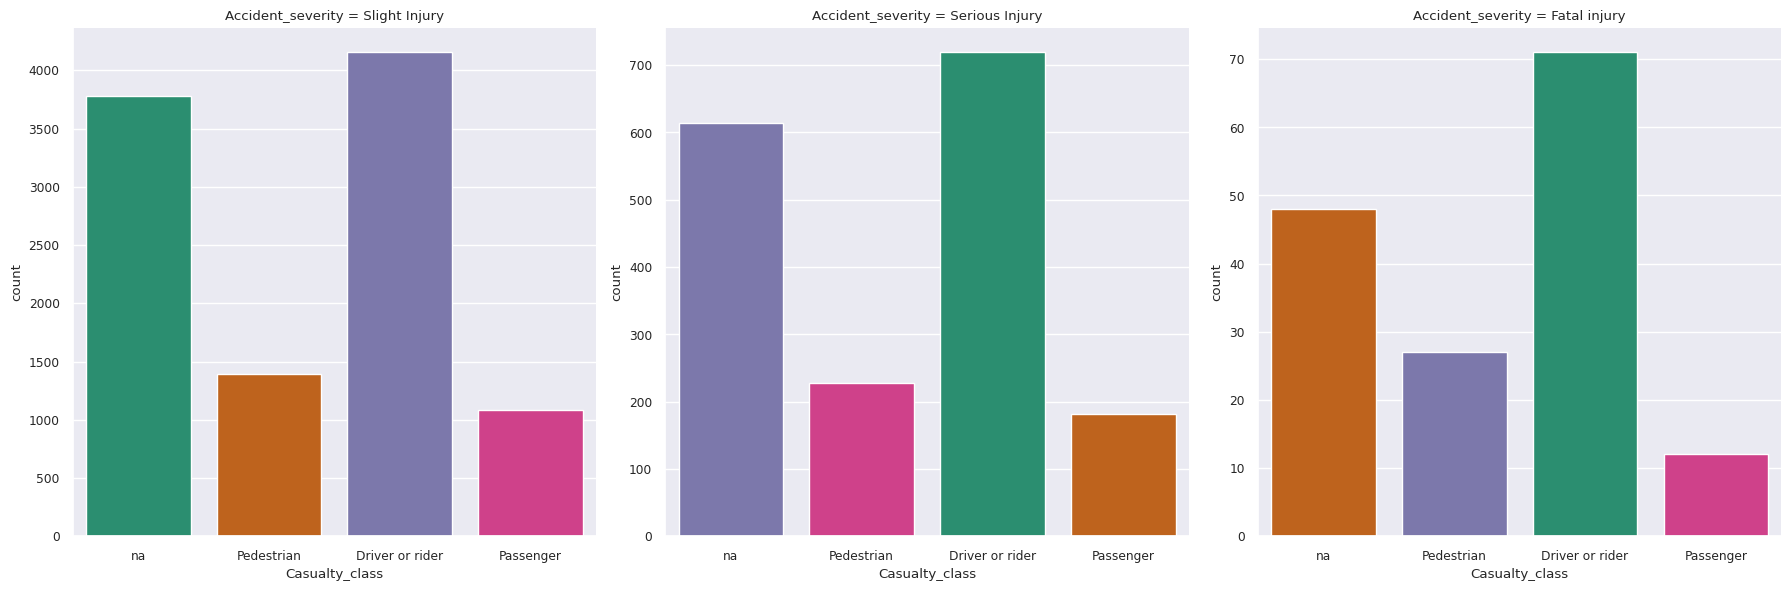

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

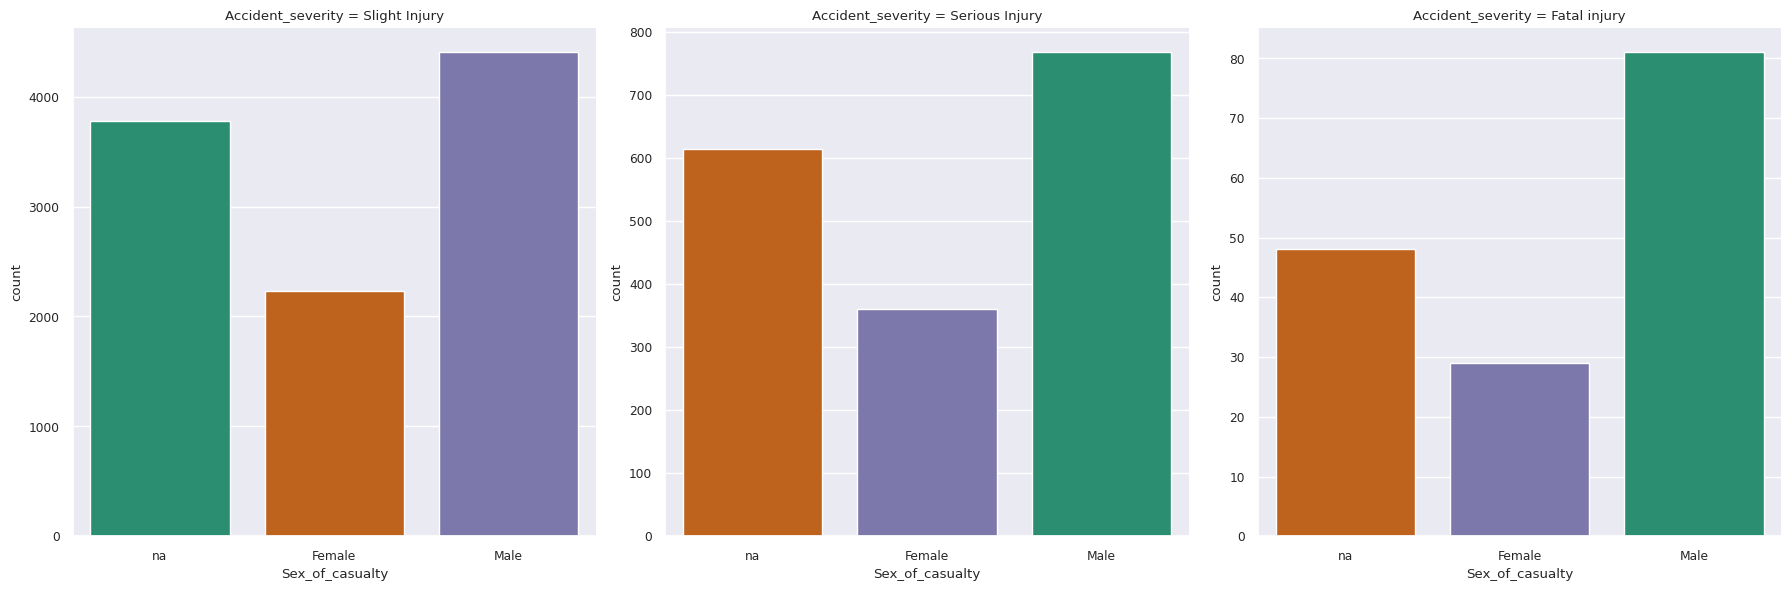

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

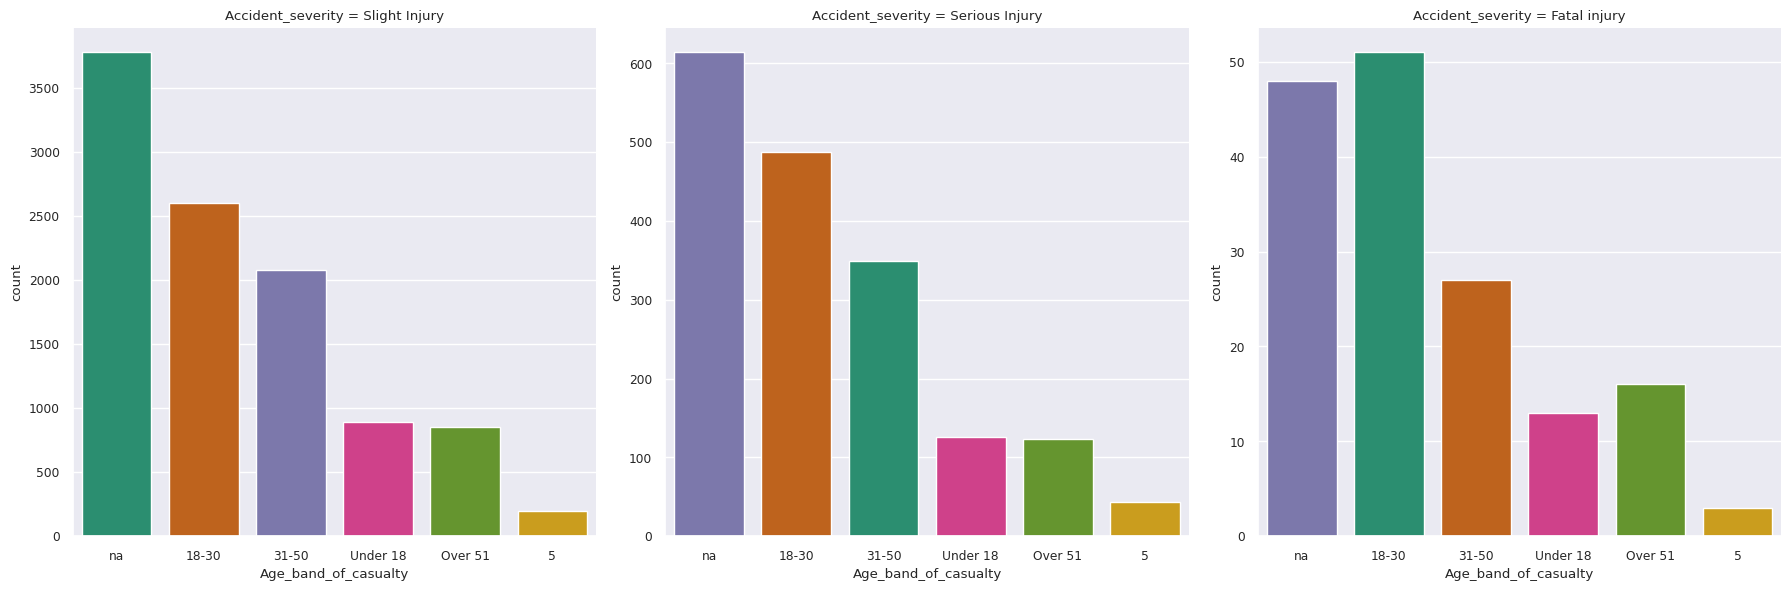

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

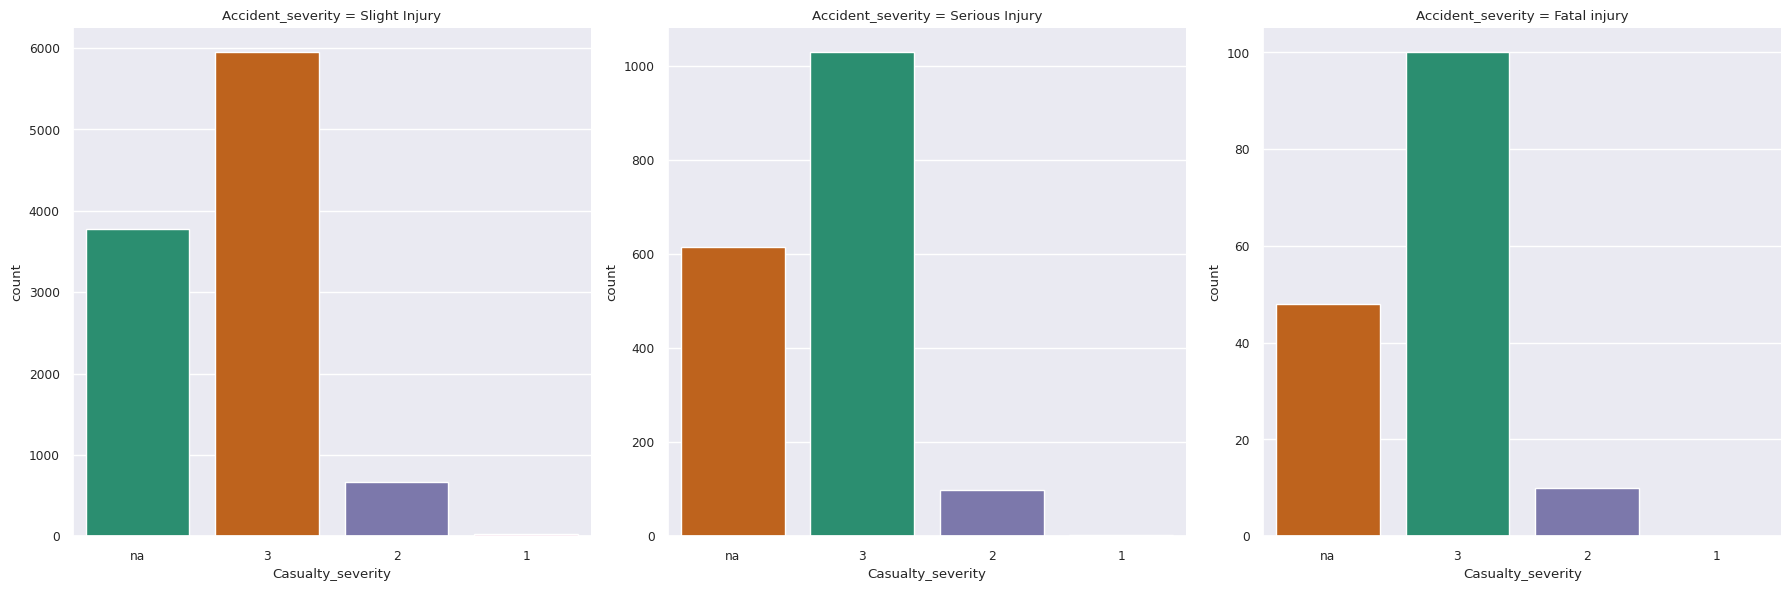

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

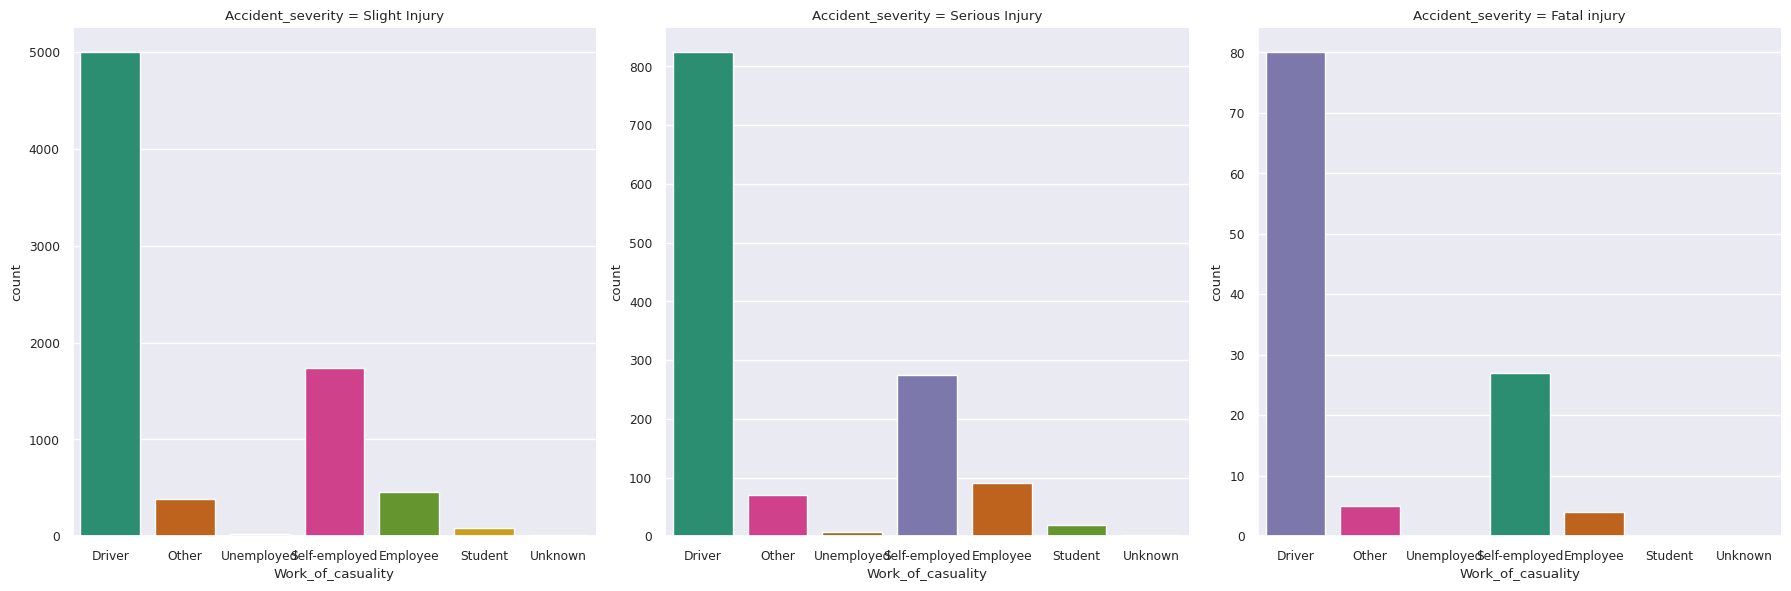

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

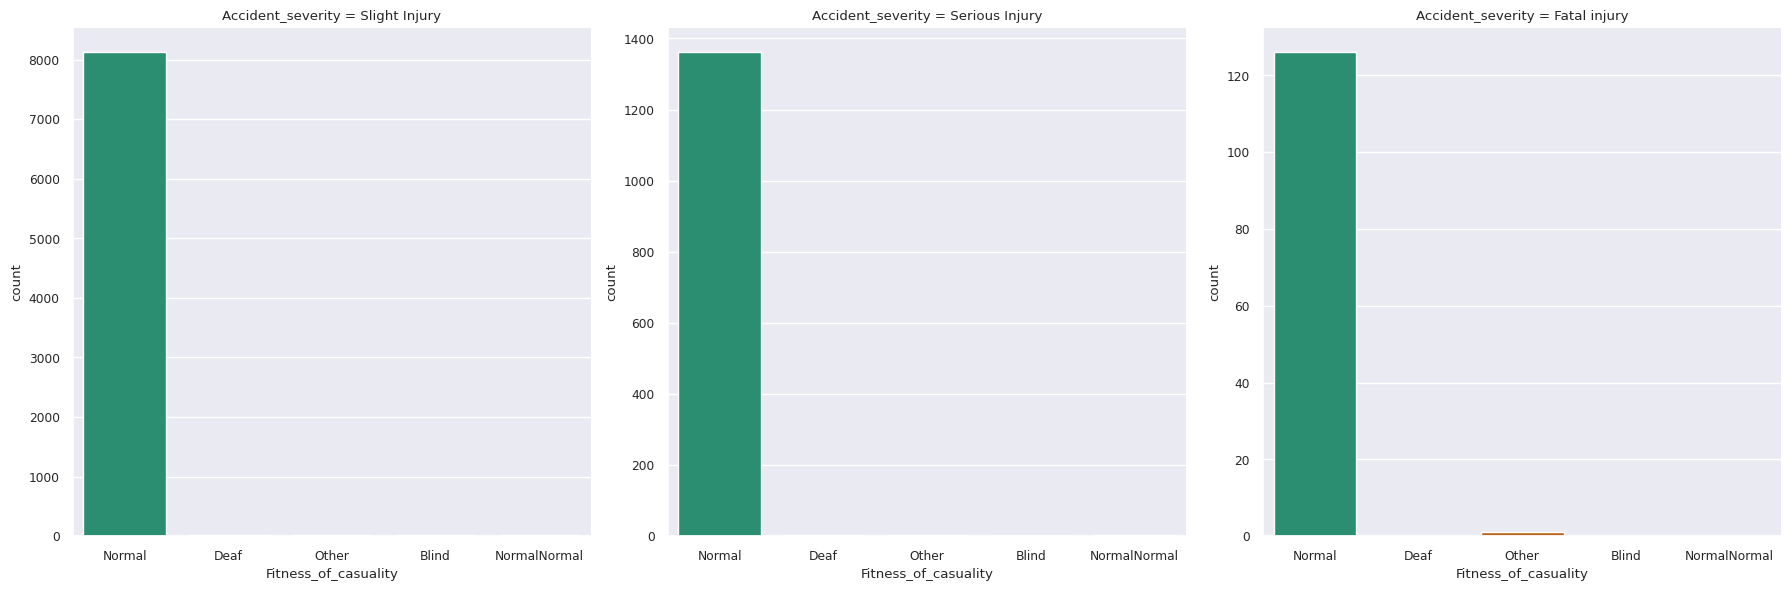

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

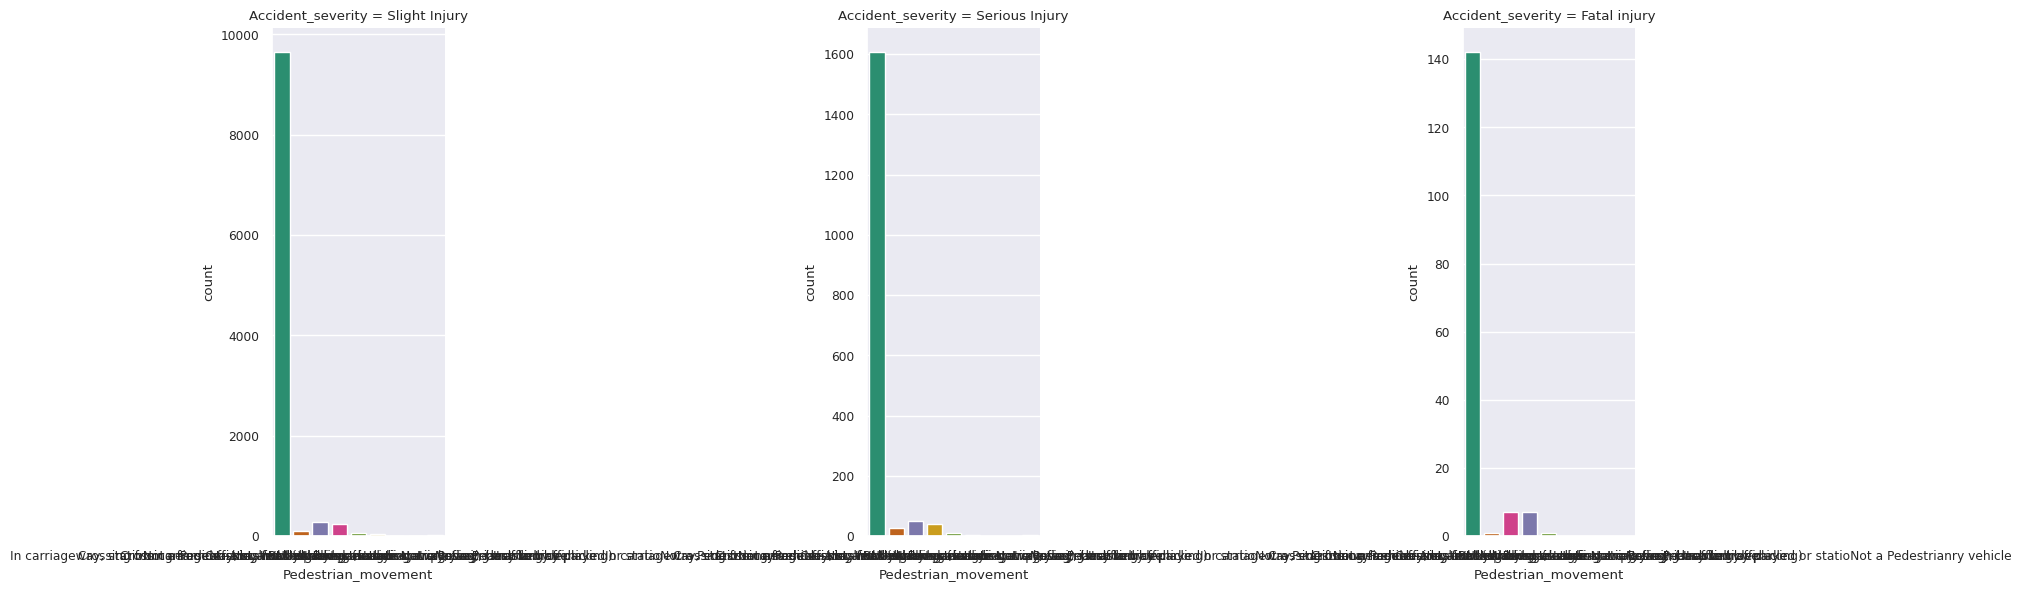

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

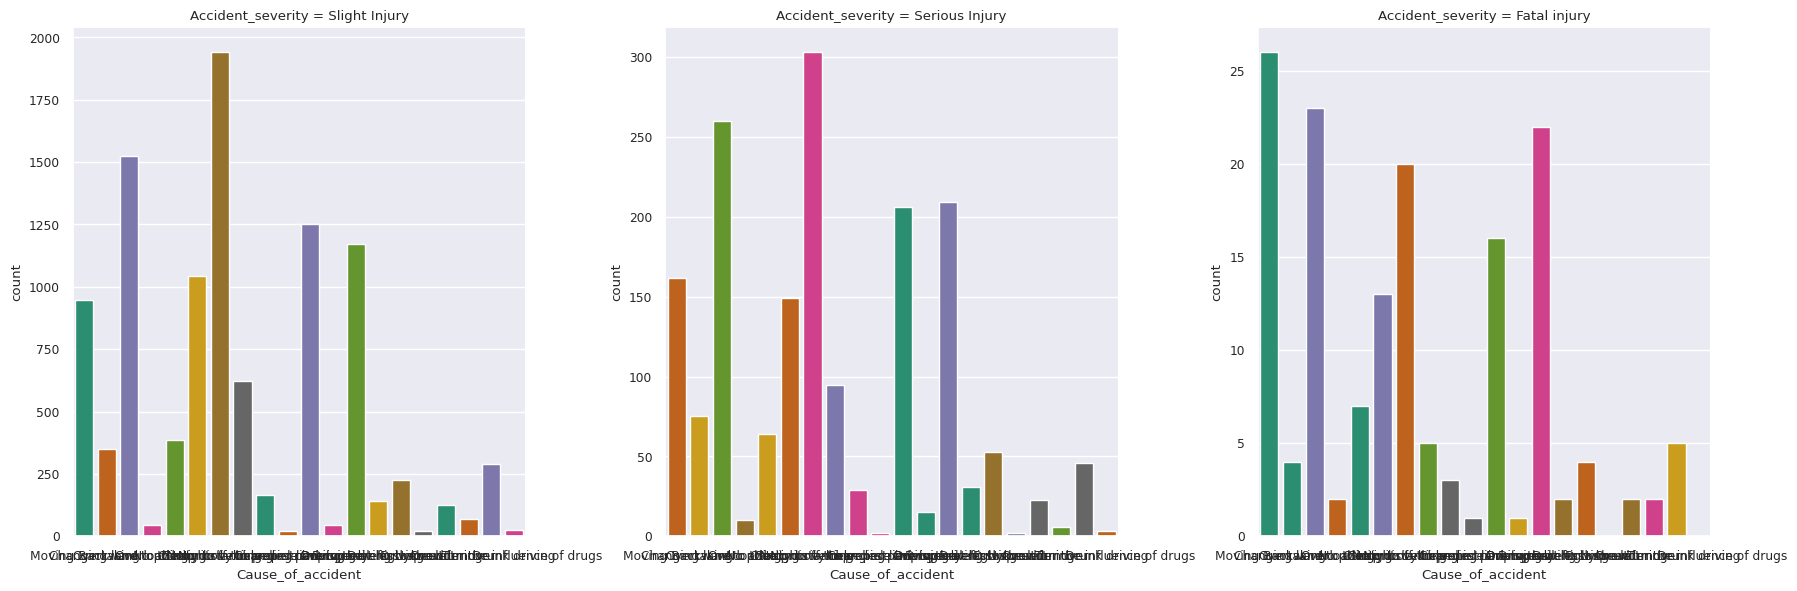

In [158]:
for col in rta.drop('Accident_severity', axis=1):
  g = sns.FacetGrid(rta, col='Accident_severity', height=6, aspect=1, sharey=False)
  g.map(sns.countplot, col, palette='Dark2')
  plt.show()

**Observations:**

* Most of the accidents with fatal injuries happened in night.
* Most of the accidents with fatal injuries happened on weekends.
* Fatality occured on saturdays and sundays.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

## categorical data analysis

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


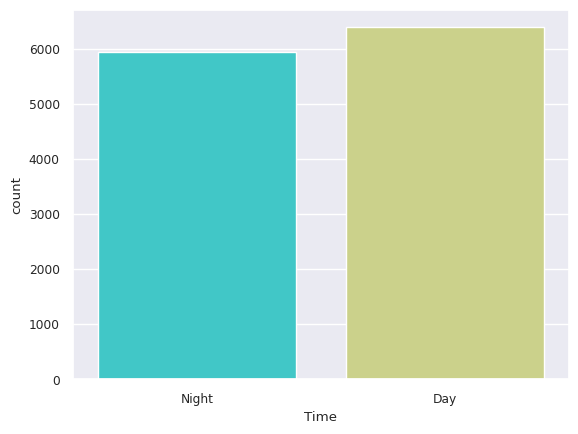

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


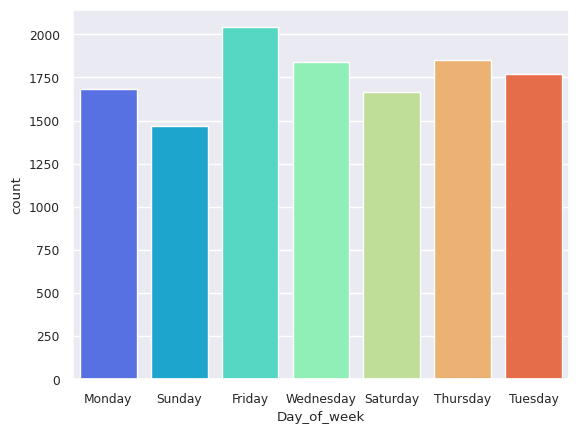

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


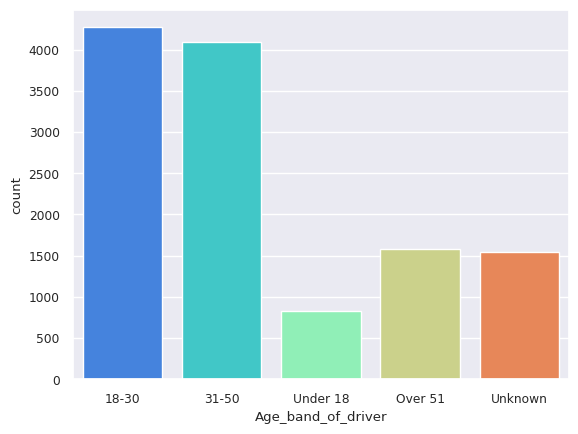

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


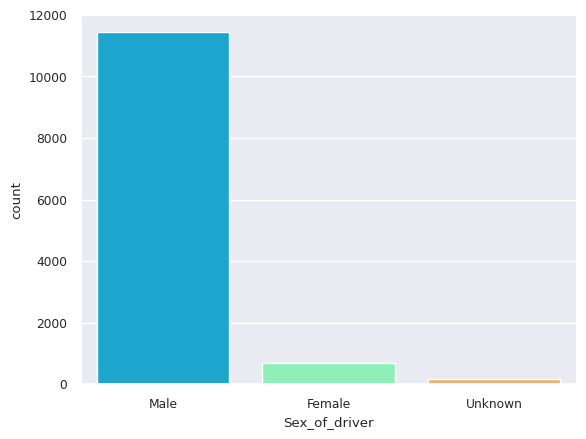

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


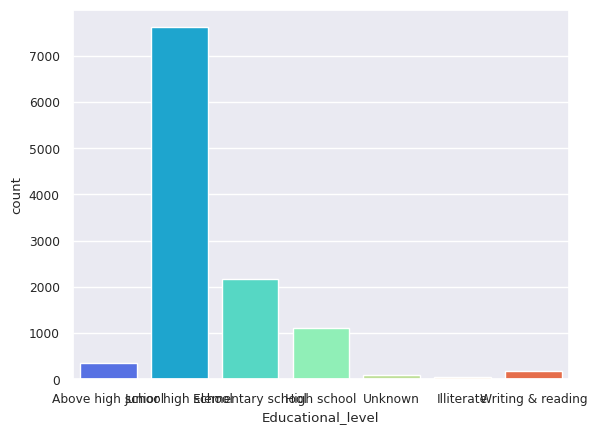

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


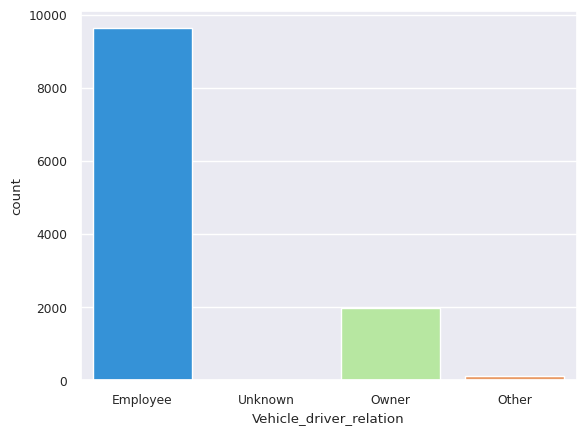

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


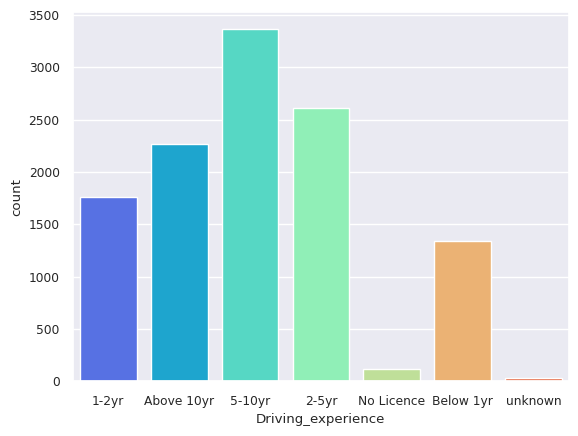

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


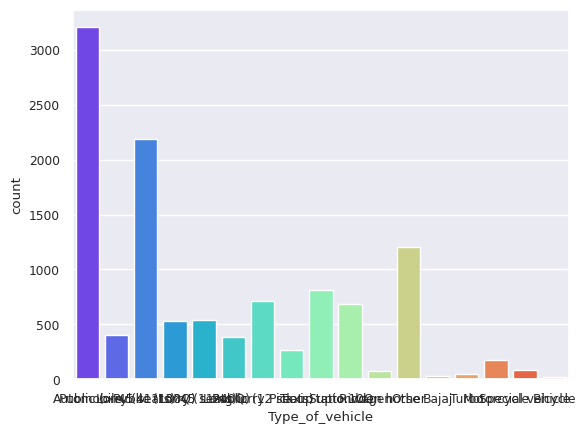

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


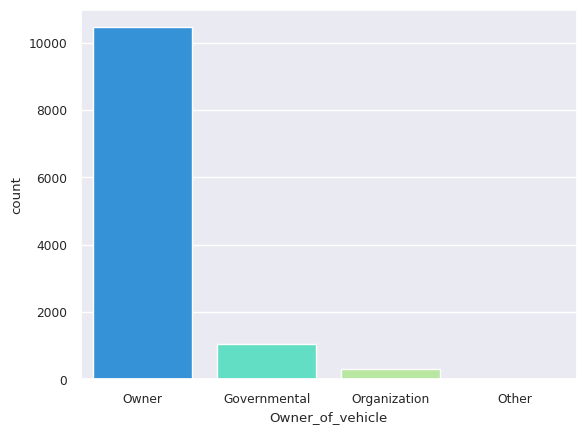

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


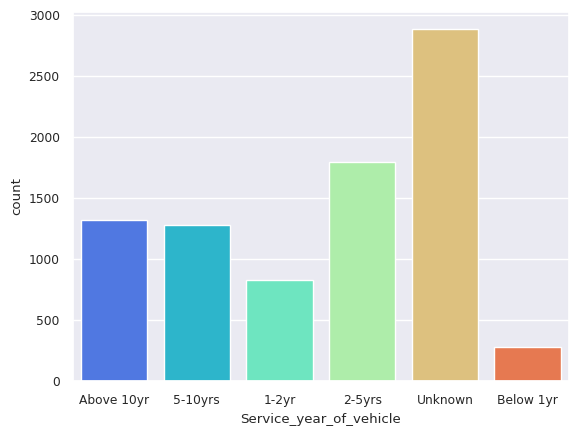

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


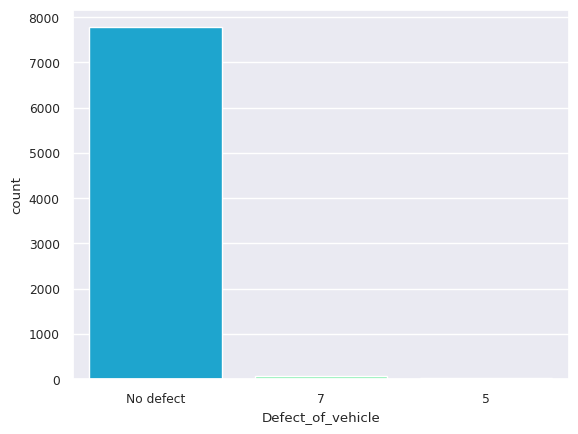

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


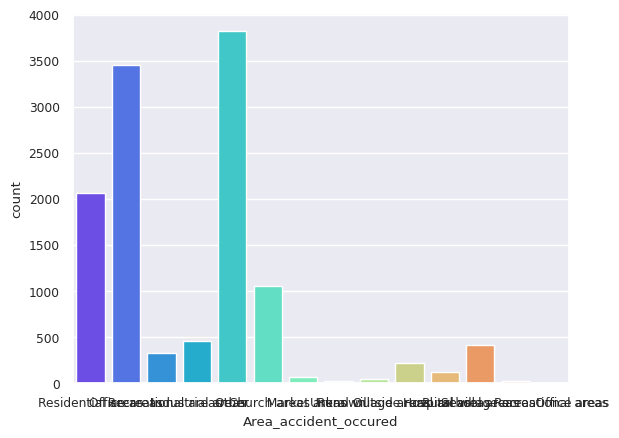

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


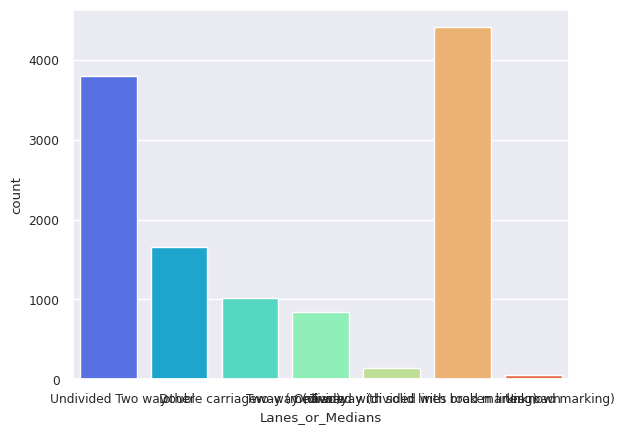

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


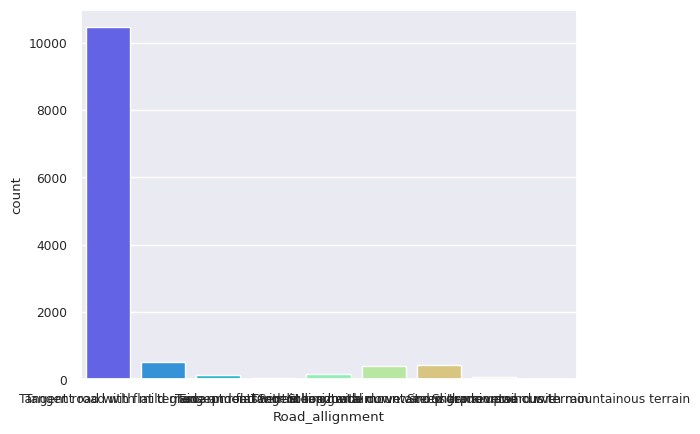

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


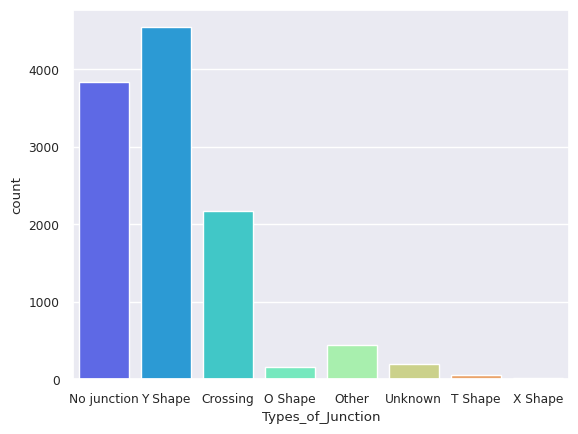

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


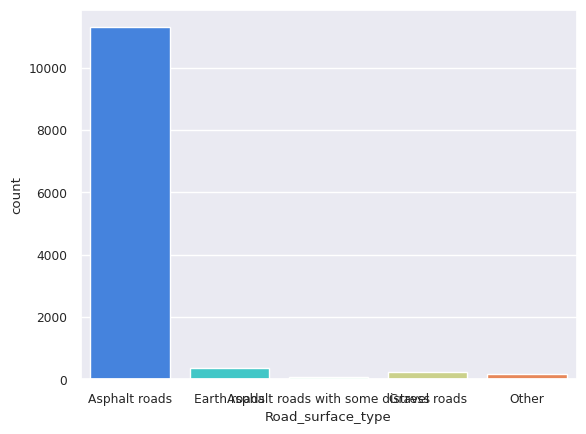

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


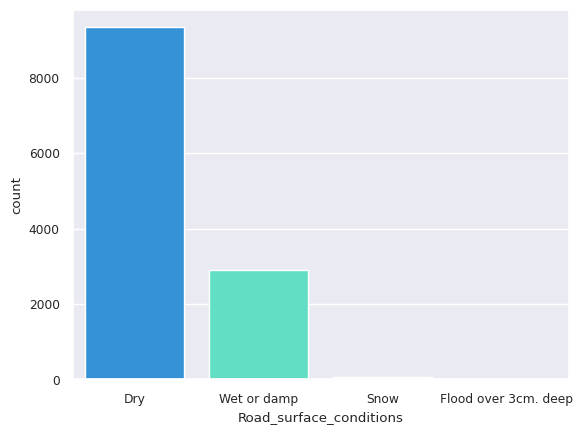

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


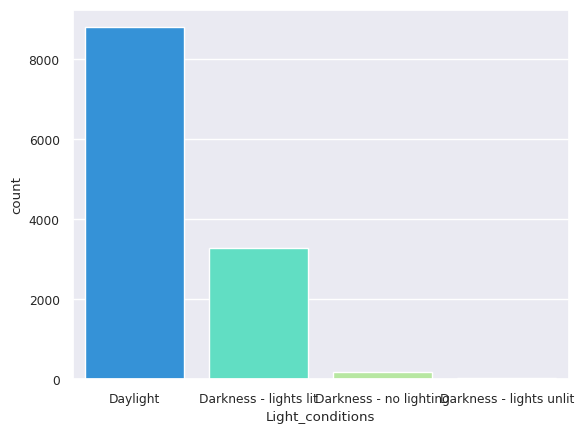

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


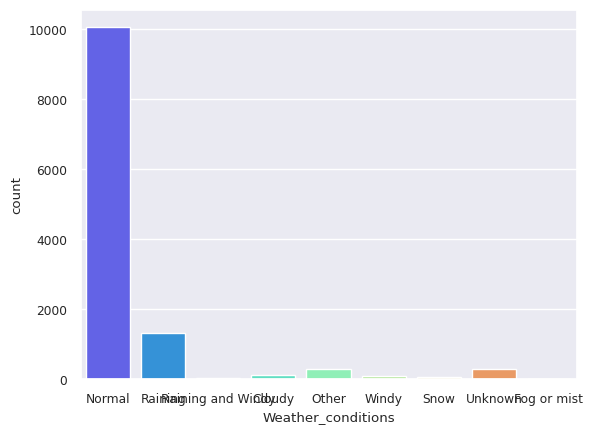

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


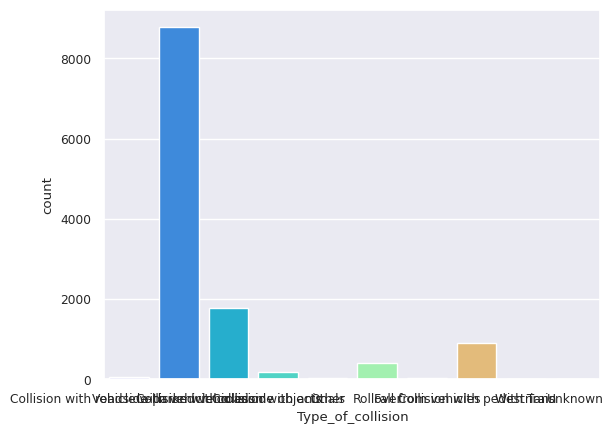

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


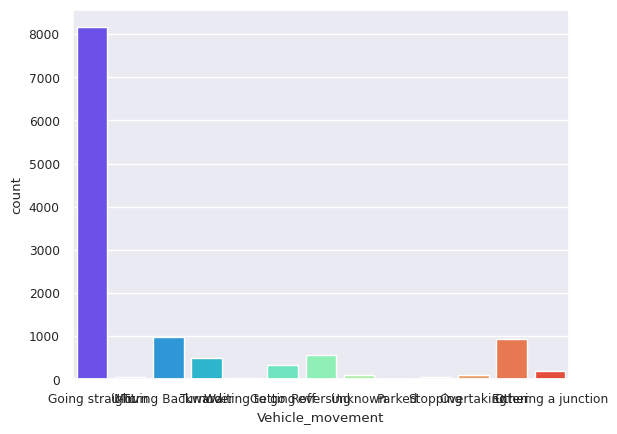

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


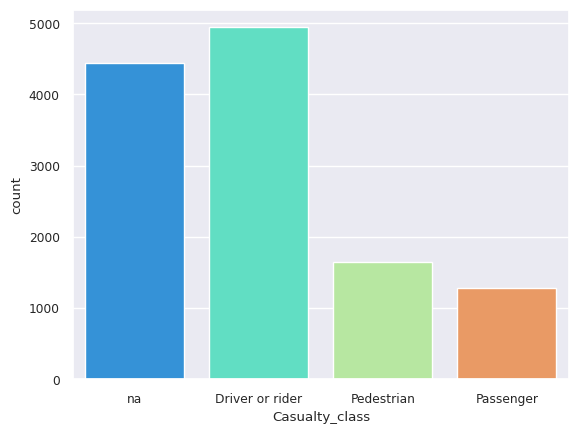

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


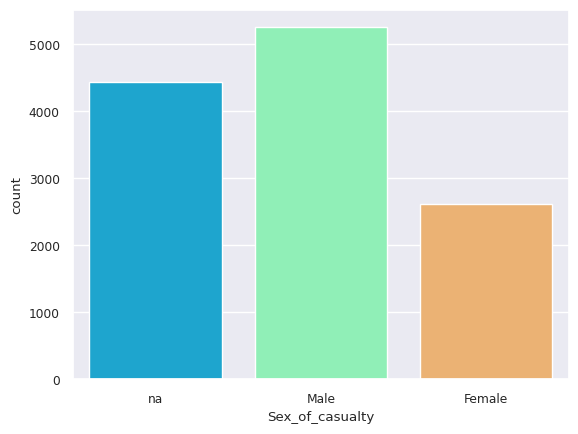

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


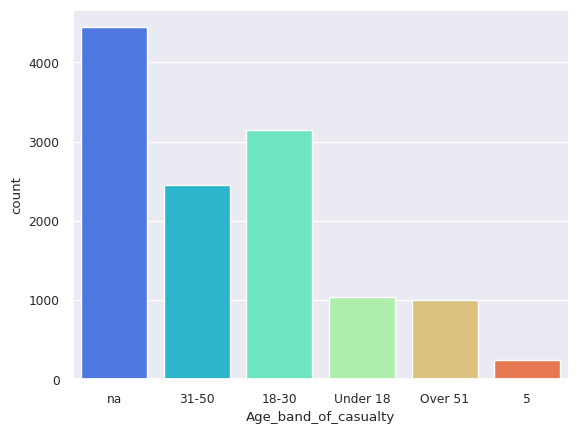

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


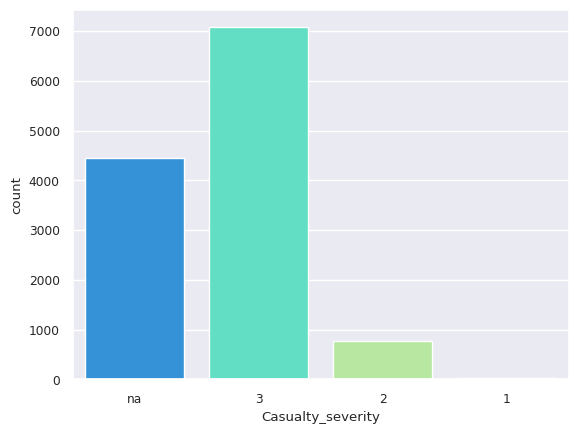

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


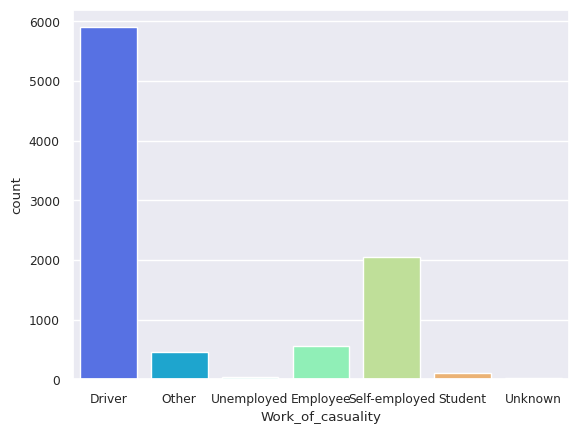

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


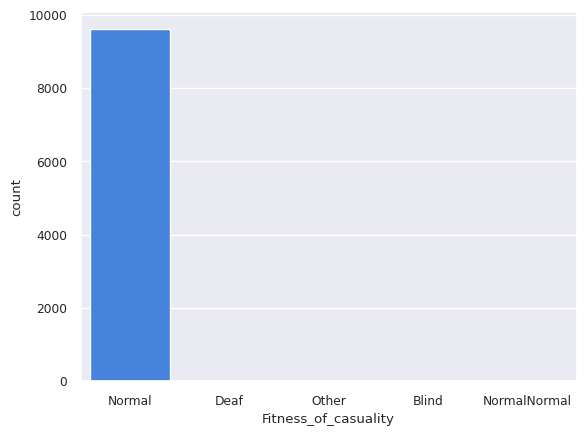

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


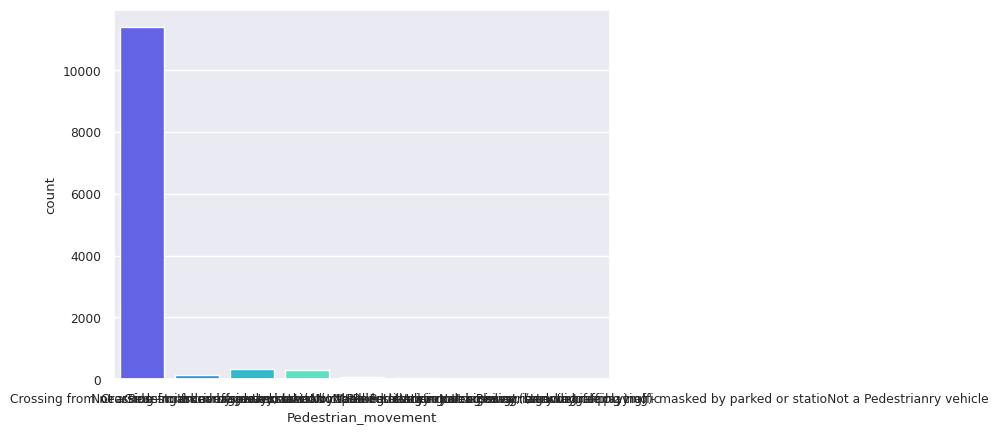

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


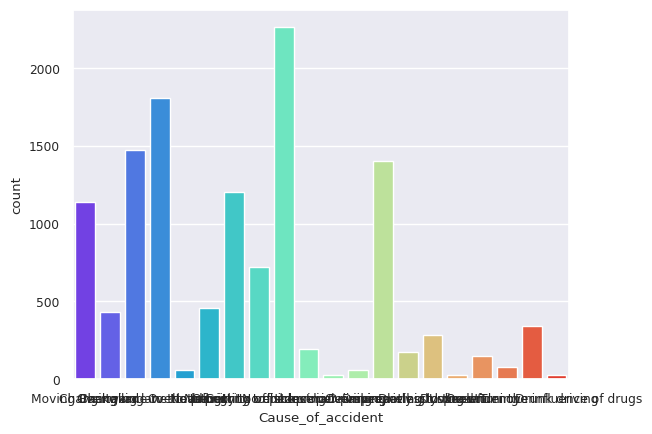

<ipython-input-159-5588a6e8b6b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col,data=rta,palette='rainbow')


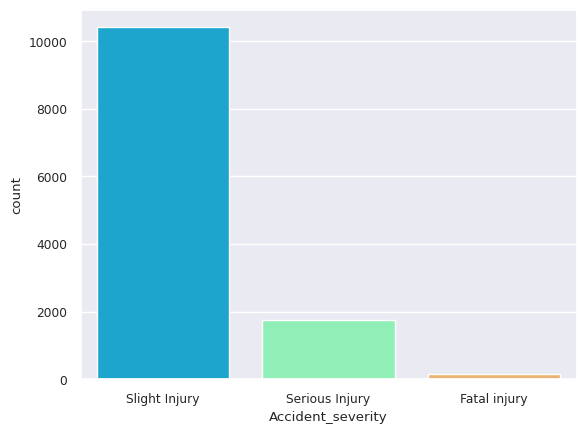

In [159]:
for col in rta.select_dtypes(include='object'):
  if rta[col].nunique()<=22:
    sns.countplot(x=col,data=rta,palette='rainbow')
    plt.show()

#Data cleaning

##spelling mistake handling

In [160]:
#replacing misspelled vehicle type names

#Lorry
rta.loc[(rta['Type_of_vehicle']=='Lorry (41?100Q)')|
        (rta['Type_of_vehicle']=='Lorry (11?40Q)')|
        (rta['Type_of_vehicle']=='Pick up upto 10Q')
        , 'Type_of_vehicle']='Lorry'
rta.loc[(rta['Type_of_vehicle']=="Public (12 seats)")|
        (rta['Type_of_vehicle']=="Public (13?45 seats)")|
        (rta['Type_of_vehicle']=='Public (> 45 seats)')
        , 'Type_of_vehicle']= 'Public vehicles'

In [161]:
rta['Type_of_vehicle'].value_counts()

Type_of_vehicle
Lorry              3538
Automobile         3205
Public vehicles    1647
Other              1208
Stationwagen        687
Long lorry          383
Taxi                265
Motorcycle          177
Special vehicle      84
Ridden horse         76
Turbo                46
Bajaj                29
Bicycle              21
Name: count, dtype: int64

In [162]:
rta.loc[rta['Defect_of_vehicle']=='No defect','Defect_of_vehicle']='0'

In [163]:
#replacing misspelled Area_accident_occured names

#Rural village areasOffice areas
rta.loc[rta['Area_accident_occured']=='Rural village areasOffice areas',
        'Area_accident_occured']='Rural village areas or Ofice areas'

In [164]:
#to_remove 5 in age band of casuality
rta=rta.drop(rta.index[rta['Age_band_of_casualty']=='5'])

In [165]:
rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)

<ipython-input-165-a18baa69b8e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)


In [166]:
#to_remove 5 in age bond of casualty
rta=rta.drop(rta.index[rta['Age_band_of_casualty']=='5'])

In [167]:
rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)

<ipython-input-167-a18baa69b8e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rta['Cause_of_accident'].replace('Driving at high speed','Overspeed',inplace=True)


In [168]:
from typing import List
def display_cols_value_counts(col_names:List[str]):
  for col_name in col_names:
    print('-'*30)
    print(f"column: {col_name}")
    print('-'*30)
    print(rta[col_name].value_counts())
    print('')
display_cols_value_counts(rta.columns)

------------------------------
column: Time
------------------------------
Time
Day      6252
Night    5820
Name: count, dtype: int64

------------------------------
column: Day_of_week
------------------------------
Day_of_week
Friday       1992
Thursday     1813
Wednesday    1811
Tuesday      1734
Monday       1652
Saturday     1632
Sunday       1438
Name: count, dtype: int64

------------------------------
column: Age_band_of_driver
------------------------------
Age_band_of_driver
18-30       4181
31-50       4015
Over 51     1561
Unknown     1515
Under 18     800
Name: count, dtype: int64

------------------------------
column: Sex_of_driver
------------------------------
Sex_of_driver
Male       11210
Female       684
Unknown      178
Name: count, dtype: int64

------------------------------
column: Educational_level
------------------------------
Educational_level
Junior high school    7469
Elementary school     2116
High school           1094
Above high school      353
Writing 

## handling duplicates

In [169]:
#detecting duplicates
rta.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12310    False
12311    False
12312    False
12313    False
12314    False
Length: 12072, dtype: bool

## handling missing values

In [170]:
rta.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               724
Vehicle_driver_relation         566
Driving_experience              811
Type_of_vehicle                 931
Owner_of_vehicle                472
Service_year_of_vehicle        3866
Defect_of_vehicle              4347
Area_accident_occured           234
Lanes_or_Medians                377
Road_allignment                 141
Types_of_Junction               863
Road_surface_type               170
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               151
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                299
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3140
Fitness_of_casuality           2588
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

## Missing values handling

In [171]:
rta.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               724
Vehicle_driver_relation         566
Driving_experience              811
Type_of_vehicle                 931
Owner_of_vehicle                472
Service_year_of_vehicle        3866
Defect_of_vehicle              4347
Area_accident_occured           234
Lanes_or_Medians                377
Road_allignment                 141
Types_of_Junction               863
Road_surface_type               170
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               151
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                299
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3140
Fitness_of_casuality           2588
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [172]:
#coulmn with missing values
rta.isna().sum()[rta.isna().sum()!=0]

Educational_level           724
Vehicle_driver_relation     566
Driving_experience          811
Type_of_vehicle             931
Owner_of_vehicle            472
Service_year_of_vehicle    3866
Defect_of_vehicle          4347
Area_accident_occured       234
Lanes_or_Medians            377
Road_allignment             141
Types_of_Junction           863
Road_surface_type           170
Type_of_collision           151
Vehicle_movement            299
Work_of_casuality          3140
Fitness_of_casuality       2588
dtype: int64

In [173]:
(rta.isna().sum()/rta.shape[0]*100).round(2)

Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               6.00
Vehicle_driver_relation         4.69
Driving_experience              6.72
Type_of_vehicle                 7.71
Owner_of_vehicle                3.91
Service_year_of_vehicle        32.02
Defect_of_vehicle              36.01
Area_accident_occured           1.94
Lanes_or_Medians                3.12
Road_allignment                 1.17
Types_of_Junction               7.15
Road_surface_type               1.41
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.25
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                2.48
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
Work_of_casuality              26.01
Fitness_of_casuality           21.44
Pedestrian_movement             0.00
Cause_of_accident               0.00
Accident_severity               0.00
dtype: float64

In [174]:
# fill nan values with the mode of each column
rta.fillna(rta.mode().iloc[0],inplace=True)
rta.isna().sum()


Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [175]:
#df["Road_surface_type"].filna(df["Road_surface_type"].mode()[0],inplace=True)
#df["Road_allignment].filna(df["Road_allignment"].mode()[0],inplace=True)

In [176]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Service_year_of_vehicle      12072 non-null  object
 10  Defect_of_vehicle            12072 non-null  object
 11  Area_accident_occured        12072 non-null  object
 12  Lanes_or_Medians             12072 non-null  object
 13  Road_allignment              12072 n

## Handling "unknown" and "na" values

we can hamdle all null values. But there are also,'unknown' and"na" as value in the column which is also equal to null .Have to deal with that too!

In [177]:
# replace "Unknown",'unknown',and "na" with the mode of each column
def replace_with_mode(df,values_to_replace=['Unknown','unknown','na']):
  for column in df.columns:
    mode_value=df[column].mode()[0] #Get the mode (most frequent value)
    df[column]=df[column].replace(values_to_replace,mode_value)
replace_with_mode(rta)
rta.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  Night      Monday              18-30          Male   Above high school   
1  Night      Monday              31-50          Male  Junior high school   
2  Night      Monday              18-30          Male  Junior high school   
3  Night      Sunday              18-30          Male  Junior high school   
4  Night      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience  Type_of_vehicle  \
0                Employee              1-2yr       Automobile   
1                Employee         Above 10yr  Public vehicles   
2                Employee              1-2yr            Lorry   
3                Employee             5-10yr  Public vehicles   
4                Employee              2-5yr            Lorry   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                 Unknown  ...   Going straight   
3     Governmental                 Unknown  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0  Driver or rider            Male                   na                 3   
1  Driver or rider            Male                   na                 3   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4  Driver or rider            Male                   na                 3   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4            Driver               Normal    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [178]:
rta.describe(include=['O']).T

count unique  \
Time                     12072      2   
Day_of_week              12072      7   
Age_band_of_driver       12072      4   
Sex_of_driver            12072      2   
Educational_level        12072      6   
Vehicle_driver_relation  12072      3   
Driving_experience       12072      6   
Type_of_vehicle          12072     13   
Owner_of_vehicle         12072      4   
Service_year_of_vehicle  12072      6   
Defect_of_vehicle        12072      3   
Area_accident_occured    12072     13   
Lanes_or_Medians         12072      6   
Road_allignment          12072      9   
Types_of_Junction        12072      7   
Road_surface_type        12072      5   
Road_surface_conditions  12072      4   
Light_conditions         12072      4   
Weather_conditions       12072      8   
Type_of_collision        12072      9   
Vehicle_movement         12072     12   
Casualty_class           12072      3   
Sex_of_casualty          12072      2   
Age_band_of_casualty     12072      5   
Casualty_severity        12072      3   
Work_of_casuality        12072      6   
Fitness_of_casuality     12072      5   
Pedestrian_movement      12072      9   
Cause_of_accident        12072     18   
Accident_severity        12072      3   

                                                                      top  \
Time                                                                  Day   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                     Lorry   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                                       0   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                      6252  
Day_of_week               1992  
Age_band_of_driver        5696  
Sex_of_driver            11388  
Educational_level         8290  
Vehicle_driver_relation  10024  
Driving_experience        4145  
Type_of_vehicle           4388  
Owner_of_vehicle         10726  
Service_year_of_vehicle   6682  
De

in the columns 'Age_band_ofcasualty' and 'Service_year_of_vehicle',most of the data points are unknown.So better to drop them.

In [179]:
rta=rta.drop(['Age_band_of_casualty','Service_year_of_vehicle'],axis=1)

In [180]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

In [181]:
from typing import List
def display_cols(col_names:List[str]):
  for col_name in col_names:
    print('-'*30)
    print(f"column:{col_name}")
    print('-'*30)
    print(rta[col_name].unique())
    print('')
display_cols(rta.columns)

------------------------------
column:Time
------------------------------
['Night' 'Day']

------------------------------
column:Day_of_week
------------------------------
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

------------------------------
column:Age_band_of_driver
------------------------------
['18-30' '31-50' 'Under 18' 'Over 51']

------------------------------
column:Sex_of_driver
------------------------------
['Male' 'Female']

------------------------------
column:Educational_level
------------------------------
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']

------------------------------
column:Vehicle_driver_relation
------------------------------
['Employee' 'Owner' 'Other']

------------------------------
column:Driving_experience
------------------------------
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']

------------------------------
column:Type_of_ve

##Converting Categorical variables to Numerical

In [182]:
# Columns of object type
cats_cols=rta.columns[rta.dtypes=='object']
cats_cols

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

## Ordinal Encoding

Map logical categorical columns using dictionary

In [183]:
rta["Age_band_of_driver"].value_counts()

Age_band_of_driver
18-30       5696
31-50       4015
Over 51     1561
Under 18     800
Name: count, dtype: int64

In [184]:
rta['Educational_level'].value_counts()

Educational_level
Junior high school    8290
Elementary school     2116
High school           1094
Above high school      353
Writing & reading      176
Illiterate              43
Name: count, dtype: int64

In [185]:
rta['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10218
Serious Injury     1699
Fatal injury        155
Name: count, dtype: int64

In [186]:
rta['Sex_of_driver']=rta['Sex_of_driver'].map({'Female':0,
                                             'Male':1})
rta['Time']=rta['Time'].map({'Day':1,
                           'Night':0})
rta["Age_band_of_driver"]=rta['Age_band_of_driver'].map({'Under 18':0,
                                                       '18-30':1,
                                                       '31-50':2,
                                                       'Over 51':3})
rta['Driving_experience']=rta['Driving_experience'].map({'No Licence':0,
                                                       'Below 1yr':1,
                                                       '1-2yr':2,
                                                       '2-5yr':3,
                                                       '5-10yr':4,
                                                       'Above 10yr':5})
rta['Educational_level']=rta['Educational_level'].map({'Illiterate':0,
                                                     'Writing & reading':1,
                                                     'Elementary school':2,
                                                     'Junior high school':3,
                                                     'High school':4,
                                                     'Above high school':5
                                                     })

rta['Accident_severity']=rta['Accident_severity'].map({'Slight Injury':0,
                                                     'Serious Injury':1,
                                                     'Fatal injury':2})
rta['Sex_of_casualty']=rta['Sex_of_casualty'].map({'Male':0,'Female':1})

In [187]:
rta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  int64 
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  int64 
 3   Sex_of_driver                12072 non-null  int64 
 4   Educational_level            12072 non-null  int64 
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  int64 
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

## Converting columns to integer Type


In [188]:
rta['Defect_of_vehicle']=rta['Defect_of_vehicle'].astype('int')
rta['Casualty_severity']=rta['Casualty_severity'].astype('int')

In [189]:
rta.dtypes

Time                            int64
Day_of_week                    object
Age_band_of_driver              int64
Sex_of_driver                   int64
Educational_level               int64
Vehicle_driver_relation        object
Driving_experience              int64
Type_of_vehicle                object
Owner_of_vehicle               object
Defect_of_vehicle               int64
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                 int64
Casualty_severity               int64
Work_of_casuality              object
Fitness_of_casuality           object
Pedestrian_movement            object
Cause_of_accident              object
Accident_severity               int64
dtype: object


## One Hot Encoding-Nominal Data

In [190]:
cats_cols=rta.columns[rta.dtypes=='object']
cats_cols

Index(['Day_of_week', 'Vehicle_driver_relation', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

In [191]:
for col in cats_cols:
  print(col,':',rta[col].nunique())

Day_of_week : 7
Vehicle_driver_relation : 3
Type_of_vehicle : 13
Owner_of_vehicle : 4
Area_accident_occured : 13
Lanes_or_Medians : 6
Road_allignment : 9
Types_of_Junction : 7
Road_surface_type : 5
Road_surface_conditions : 4
Light_conditions : 4
Weather_conditions : 8
Type_of_collision : 9
Vehicle_movement : 12
Casualty_class : 3
Work_of_casuality : 6
Fitness_of_casuality : 5
Pedestrian_movement : 9
Cause_of_accident : 18


In [192]:
rta=pd.get_dummies(rta,columns=['Fitness_of_casuality'],prefix=['Fitness_of_casuality'],drop_first=False,dtype=int)

In [193]:
rta.head()

Time Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0     0      Monday                   1              1                  5   
1     0      Monday                   2              1                  3   
2     0      Monday                   1              1                  3   
3     0      Sunday                   1              1                  3   
4     0      Sunday                   1              1                  3   

  Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                Employee                   2       Automobile   
1                Employee                   5  Public vehicles   
2                Employee                   2            Lorry   
3                Employee                   4  Public vehicles   
4                Employee                   3            Lorry   

  Owner_of_vehicle  Defect_of_vehicle  ... Casualty_severity  \
0            Owner                  0  ...                 3   
1            Owner                  0  ...                 3   
2            Owner                  0  ...                 3   
3     Governmental                  0  ...                 3   
4            Owner                  0  ...                 3   

  Work_of_casuality Pedestrian_movement           Cause_of_accident  \
0            Driver    Not a Pedestrian             Moving Backward   
1            Driver    Not a Pedestrian                  Overtaking   
2            Driver    Not a Pedestrian   Changing lane to the left   
3            Driver    Not a Pedestrian  Changing lane to the right   
4            Driver    Not a Pedestrian                  Overtaking   

  Accident_severity Fitness_of_casuality_Blind Fitness_of_casuality_Deaf  \
0                 0                          0                         0   
1                 0                          0                         0   
2                 1                          0                         0   
3                 0                          0                         0   
4                 0                          0                         0   

  Fitness_of_casuality_Normal Fitness_of_casuality_NormalNormal  \
0                           1                                 0   
1                           1                                 0   
2                           1                                 0   
3                           1                                 0   
4                           1                                 0   

   Fitness_of_casuality_Other  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 34 columns]

## Label Encoding-Nominal Data

* converting categorical Features values to numerical values using Label Enconding
* Label Enconding provides values from 1 to N

In [194]:
from sklearn.preprocessing import LabelEncoder
cats_cols=rta.columns[rta.dtypes=='object']
for cats_col in cats_cols:
  le=LabelEncoder()
  rta[cats_col]=le.fit_transform(rta[cats_col])
rta.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0     0            1                   1              1                  5   
1     0            1                   2              1                  3   
2     0            1                   1              1                  3   
3     0            3                   1              1                  3   
4     0            3                   1              1                  3   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   2                0   
1                        0                   5                7   
2                        0                   2                4   
3                        0                   4                7   
4                        0                   3                4   

   Owner_of_vehicle  Defect_of_vehicle  ...  Casualty_severity  \
0                 3                  0  ...                  3   
1                 3                  0  ...                  3   
2                 3                  0  ...                  3   
3                 0                  0  ...                  3   
4                 3                  0  ...                  3   

   Work_of_casuality  Pedestrian_movement  Cause_of_accident  \
0                  0                    5                  8   
1                  0                    5                 15   
2                  0                    5                  0   
3                  0                    5                  1   
4                  0                    5                 15   

   Accident_severity  Fitness_of_casuality_Blind  Fitness_of_casuality_Deaf  \
0                  0                           0                          0   
1                  0                           0                          0   
2                  1                           0                          0   
3                  0                           0                          0   
4                  0                           0                          0   

   Fitness_of_casuality_Normal  Fitness_of_casuality_NormalNormal  \
0                            1                                  0   
1                            1                                  0   
2                            1                                  0   
3                            1                                  0   
4                            1                                  0   

   Fitness_of_casuality_Other  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 34 columns]

#Data Transformations-Numerical data analysis

##outliers

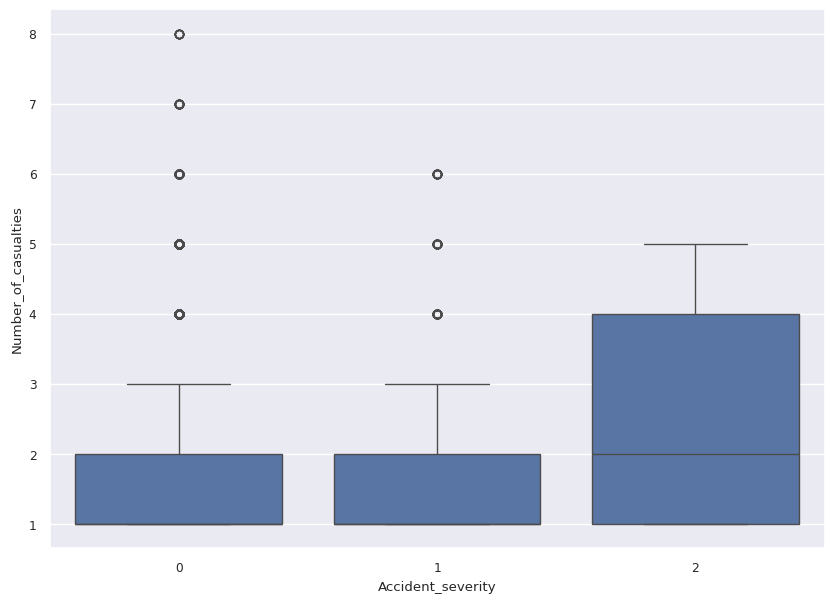

In [195]:
plt.figure(figsize=(10,7))
sns.boxplot(data=rta,x='Accident_severity',y='Number_of_casualties')
plt.show()

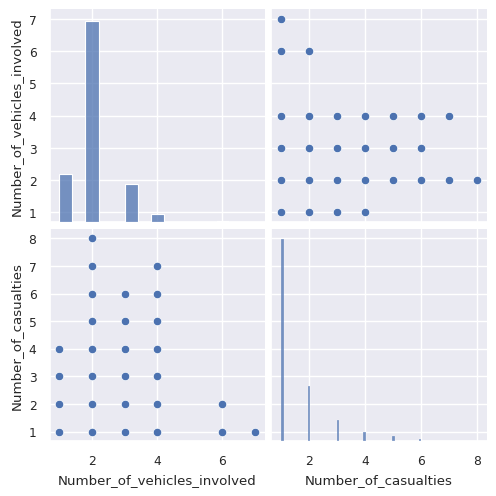

In [196]:
sns.pairplot(rta[['Number_of_vehicles_involved','Number_of_casualties']])

##correlation of numerical variables

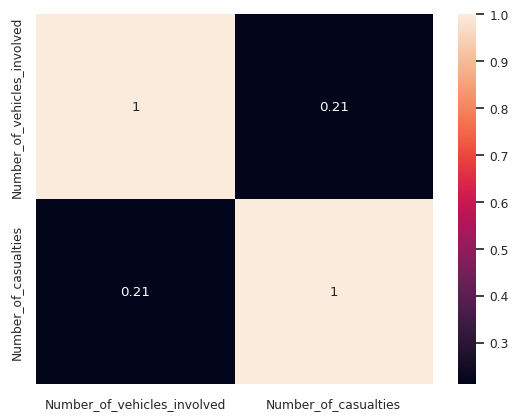

In [197]:
correlation_matrix=rta[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(correlation_matrix,annot=True)
plt.show()

Inference:

We really may need "Number_of_vehicles_involved" because that might be lead to severity of accident (for Example: if number of vehicles is 2 and if lorry and bike collided, then the severity of bike rider is severe, elif bike and bike slight injury, and so on.. cases).
 1. We may or may not need the "Number_of_vehicles_involved",but there is a 1 supporting  case, so this may be a useful feature as data cannot be lost if there is a slight chance of dependancy.

 2. Coming to "Number_of_casualties", we really dont consider the number of patients. As we are aiming for severity of accident. so, we can drop the "Number_of_casualties" column.

 3. In this heatmap, we can find that these are not much extremely correlated variables.



##Scaling

No need of scaling here!!!!

## Non relevant columns

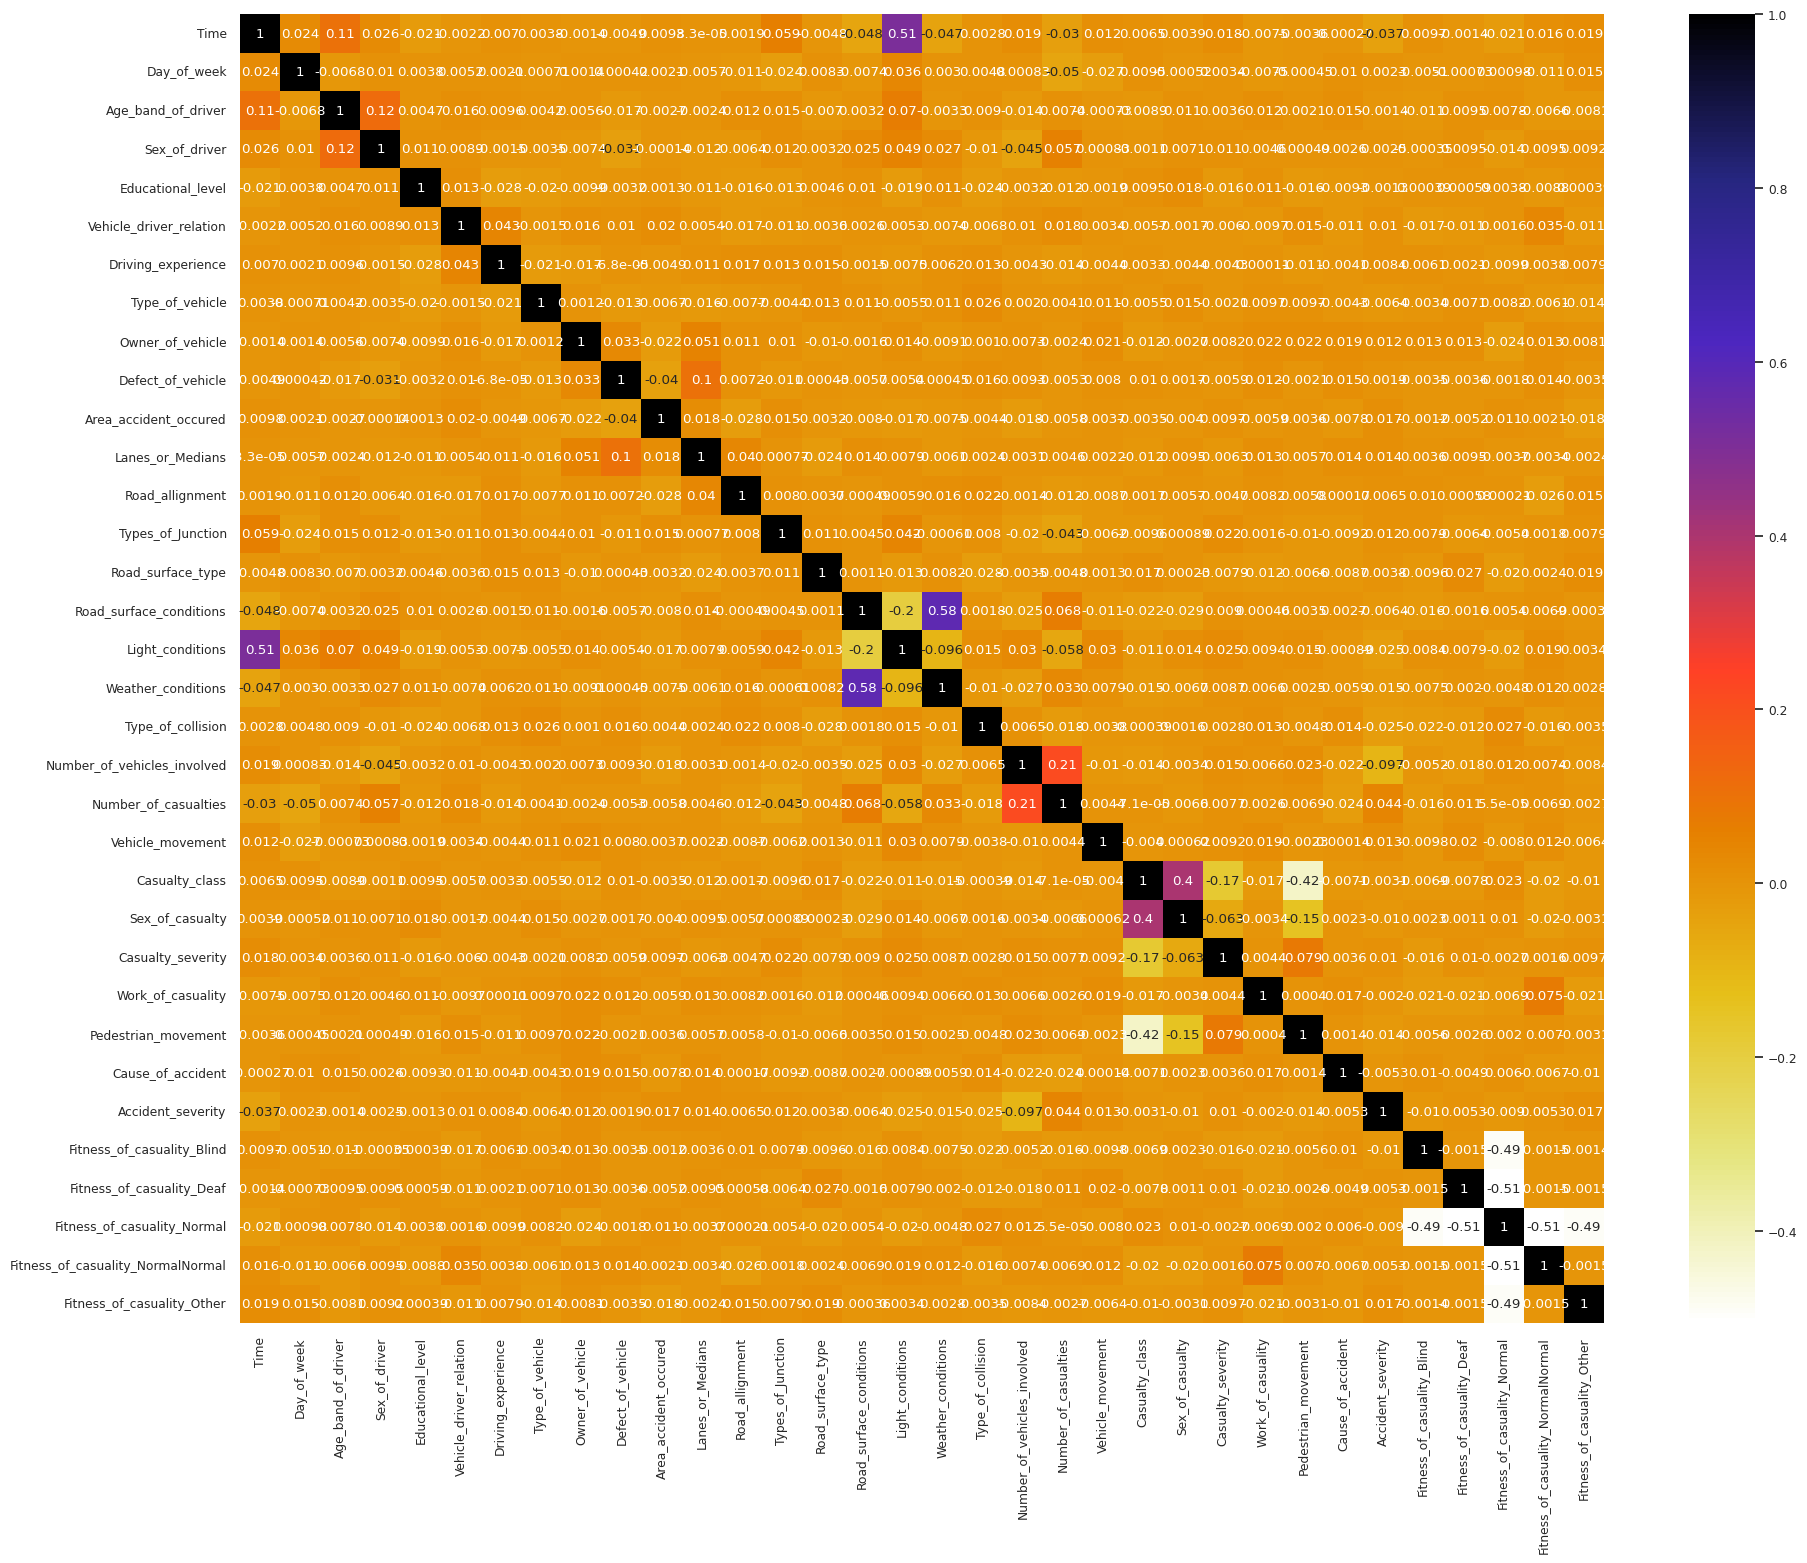

In [198]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(rta.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [199]:
rta_data_corr=rta.corr()
rta_data_corr.style.background_gradient(cmap='cool')

In [200]:
#correlation values of all features with the target variable
rta.corr()['Accident_severity'].sort_values(ascending=False)

Accident_severity                    1.000000
Number_of_casualties                 0.043857
Fitness_of_casuality_Other           0.017275
Area_accident_occured                0.017143
Lanes_or_Medians                     0.013666
Vehicle_movement                     0.012717
Owner_of_vehicle                     0.011701
Types_of_Junction                    0.011552
Casualty_severity                    0.010430
Vehicle_driver_relation              0.010143
Driving_experience                   0.008366
Road_allignment                      0.006488
Fitness_of_casuality_NormalNormal    0.005318
Fitness_of_casuality_Deaf            0.005318
Road_surface_type                    0.003821
Sex_of_driver                        0.002501
Day_of_week                          0.002276
Defect_of_vehicle                    0.001906
Educational_level                   -0.001302
Age_band_of_driver                  -0.001427
Work_of_casuality                   -0.002040
Casualty_class                      -0.003112
Cause_of_accident                   -0.005288
Type_of_vehicle                     -0.006361
Road_surface_conditions             -0.006382
Fitness_of_casuality_Normal         -0.009016
Fitness_of_casuality_Blind          -0.009965
Sex_of_casualty                     -0.010039
Pedestrian_movement                 -0.013921
Weather_conditions                  -0.014942
Light_conditions                    -0.024994
Type_of_collision                   -0.025082
Time                                -0.037389
Number_of_vehicles_involved         -0.096960
Name: Accident_severity, dtype: float64

**Observing useful features:**

As from the data, we are classifying the severity of accident happened.
1. So, we really dont need the date and time of particular instance. So, they can be left out.
2. Age_band_of_driver really would be an important feature, as the age signifes the immunity of patient. If the patient is older human (>50 or >60), his immunity levels are not so high so the injuries/recovering wont happen so easily. So, we can consider this.

3. Sex_of_driver, can be considered.

4. Educational_level doesn't really matter, while we are focussing on accident severity. We really dont think of educational_level when an accident happened to the person, we check for his condition. Whether he is educated or un-educated, the severity of accident wont show any kindness to the person. so, we can drop this.
5. Vehicle_driver_relation too doesnt matter, as we dont need whether he is a owner of it or not.

6. Driving_experience it may be useful, so we can consider
7. Type_of_vehicle it may be useful, suppose if it is a lorry, we can try to conclude the severity of accident.

8. Owner_of_vehicle, can be left out as we dont do any thing with owner.

9. Service_year_of_vehicle, this feature can be helpful as it specifies the condition of vehicle.

10. Defect_of_vehicle, can be considered for the condition as of "Service_year_of_vehicle".

11. Area_accident_occured, dont really matter the severity really depends on collision of two/three vehicles or other irrespective of place.

12. Lanes_or_medians,Road_alignment,Types_of_junction can be considered.


13. Road_surface_type, may be helpful in resulting of severity. Suppose, if the patient would fall from large distances or from highway which is at a height to normal layout road.

14. Road_surface_conditions, can be considered like "Road_surface_type".

15. Light_conditions and Weather_conditions can be considered because this may result in accidents.


16. Type_of_collision, can be considered.

17. Vehilce_movement, may be helpful.

18. Causalty_class, may be useful.

19. Sex_of_casualty, can be dropped.

20. Age_band_of_casulity, can be considered.

21. Casuality_severity, can be considered.

22. Work_of_casuality, can be dropped as we dont need any inferences from the patient's work.

23. Fitness_of_casuality, can be considered.

24. Pedestrian_movement, can be dropped.

25. Cause_of_accident, can be considered. It is an important feature.

In [201]:
#irrelevant columns
#rta.drop('service_year_of_vehicle',axis=1,inplace=True)
rta.drop('Educational_level',axis=1,inplace=True)
#rta.drop('Owner_of_vehicle',axis=1,inplace=True)
#rta.drop('Area_accident_occured',axis=1,inplace=True)
rta.drop('Work_of_casuality',axis=1,inplace=True)
rta.drop('Sex_of_casualty',axis=1,inplace=True)
rta.drop('Day_of_week',axis=1,inplace=True)
rta.drop('Time',axis=1,inplace=True)

#Model Building

In [202]:
x=rta.drop(['Accident_severity'],axis=1)
y=rta['Accident_severity']


In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('shape of training feautures:',x_train.shape)
print('shape of testing feautures:',y_test.shape)
print('shape of training target:',x_train.shape)
print('shape of testing target:',y_test.shape)

shape of training feautures: (9657, 28)
shape of testing feautures: (2415,)
shape of training target: (9657, 28)
shape of testing target: (2415,)


## logistic regression model

In [204]:
#initializing logistic regression model
logreg=LogisticRegression()
#train the model
logreg.fit(x_train, y_train)
#predictions
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
#Accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy:.4f}')

Accuracy:0.8489


In [206]:
#classification report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


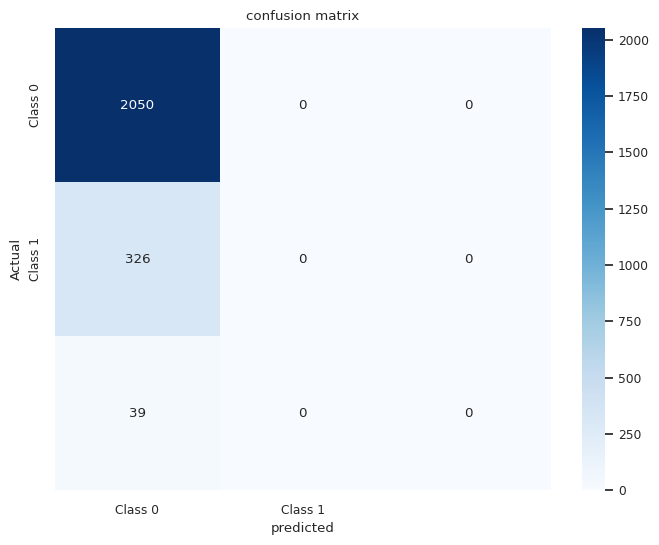

In [207]:
#confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"],
            yticklabels=["Class 0","Class 1"])
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

##Best classification model

Training and EvaluatingLogistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy:0.8489

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



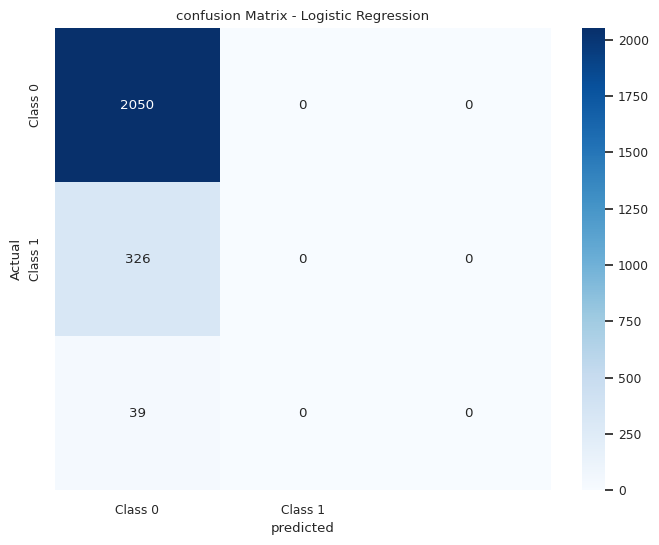

--------------------------------------------------------------------------------
Training and EvaluatingRandom Forest...
Accuracy:0.8468

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2050
           1       0.33      0.02      0.04       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.39      0.34      0.32      2415
weighted avg       0.77      0.85      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


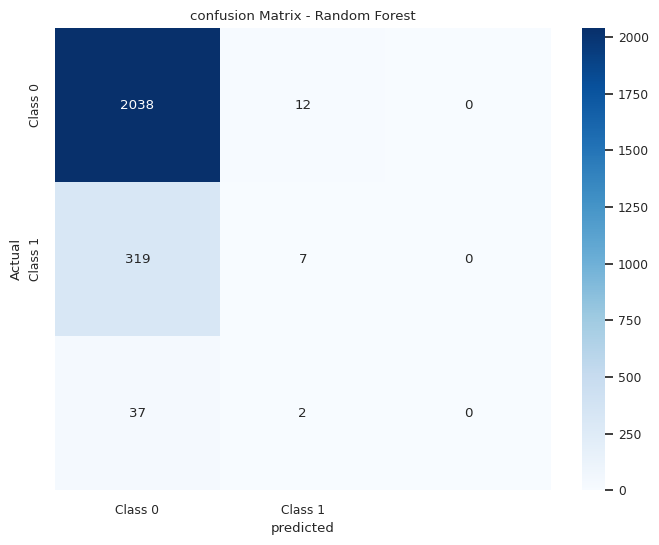

--------------------------------------------------------------------------------
Training and EvaluatingDecision Tree...
Accuracy:0.7230

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2050
           1       0.18      0.24      0.20       326
           2       0.08      0.08      0.08        39

    accuracy                           0.72      2415
   macro avg       0.37      0.38      0.37      2415
weighted avg       0.76      0.72      0.74      2415



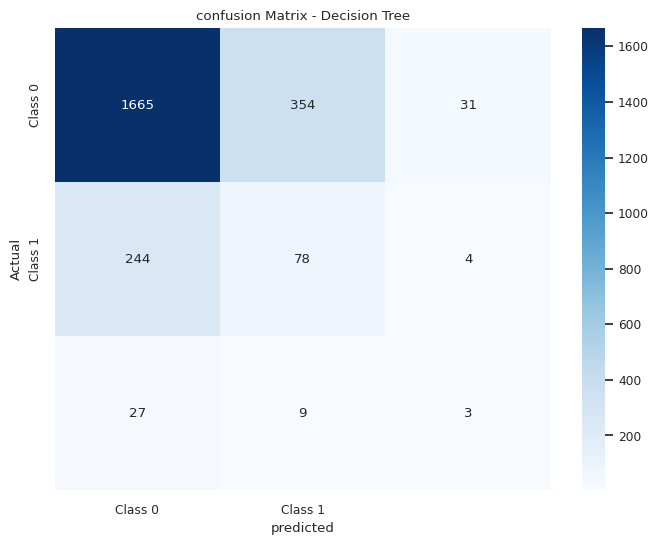

--------------------------------------------------------------------------------
Training and EvaluatingK-Nearest Neighbors...
Accuracy:0.8472

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


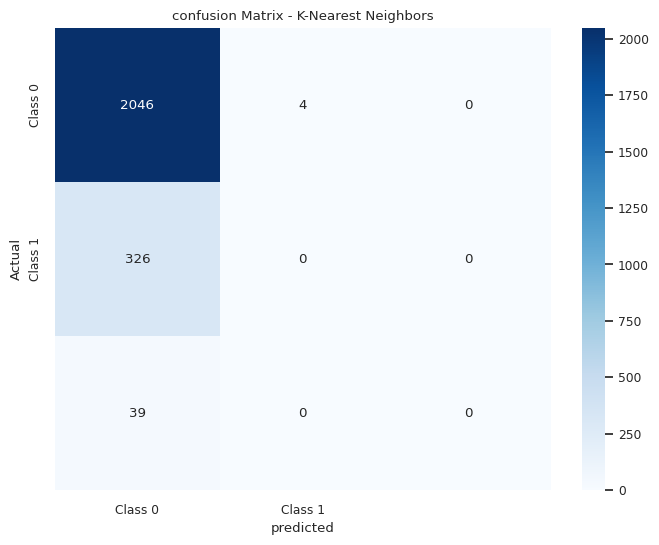

--------------------------------------------------------------------------------
Training and EvaluatingExtra Trees...
Accuracy:0.8443

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2050
           1       0.31      0.03      0.05       326
           2       0.00      0.00      0.00        39

    accuracy                           0.84      2415
   macro avg       0.39      0.34      0.32      2415
weighted avg       0.76      0.84      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


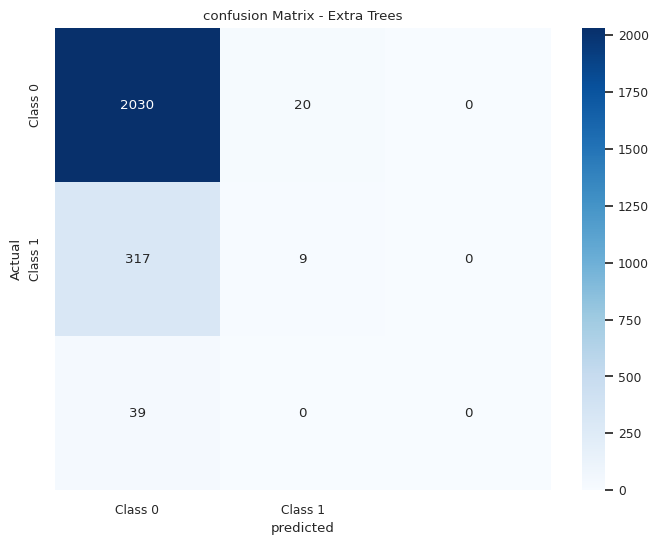

--------------------------------------------------------------------------------


<ipython-input-208-434ce4833477>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies,palette='viridis')


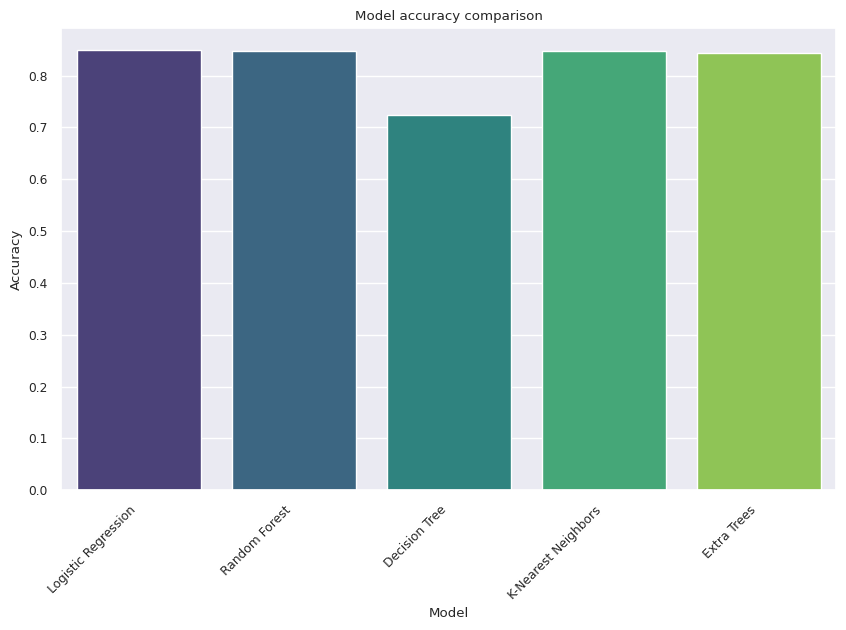

In [208]:
#define models to evaluate
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Extra Trees':ExtraTreesClassifier()
}
#initialize a list to store model names and accuracies
model_accuracies=[]

#loop through models, train, and evaluate
for model_name,model in models.items():
 print(f'Training and Evaluating{model_name}...')

#Train the model
 model.fit(x_train,y_train)

#predictions
 y_pred=model.predict(x_test)

#accuracy
 accuracy=accuracy_score(y_test,y_pred)
 model_accuracies.append((model_name,accuracy))
 print(f'Accuracy:{accuracy:.4f}')

#Classification Report
 print("\nClassification Report:")
 print(classification_report(y_test,y_pred))

#confusion Matrix
 conf_matrix=confusion_matrix(y_test,y_pred)

#plot confusion matrix
 plt.figure(figsize=(8,6))
 sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1'])
 plt.title(f'confusion Matrix - {model_name}')
 plt.xlabel('predicted')
 plt.ylabel('Actual')
 plt.show()
 #seperate a line for readablity between models
 print("-"*80)
#plotting the accuracies of all models
model_names=[model_name for model_name,_ in model_accuracies]
accuracies=[accuracy for _, accuracy in model_accuracies]
#create a bar plot for accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies,palette='viridis')
plt.title('Model accuracy comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45,ha='right')
plt.show()

F1-Score
One can combine presicion and recall into one score, which is called the F-score is computed with the harmonic mean of precisoon and recall. Note that it assigns much more weight to low values. As a result of that the classifier will only get a high F-score, if both recall and precison are high

##Logistic regression with sampling methods


Training ad Evaluating Logistic Regression with Oversampling (SMOTE)
Accuracy (oversampling -SMOTE):0.801656

Classification Report(oversampling -SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2050
           1       0.21      0.12      0.16       326
           2       0.17      0.05      0.08        39

    accuracy                           0.80      2415
   macro avg       0.41      0.37      0.37      2415
weighted avg       0.76      0.80      0.78      2415



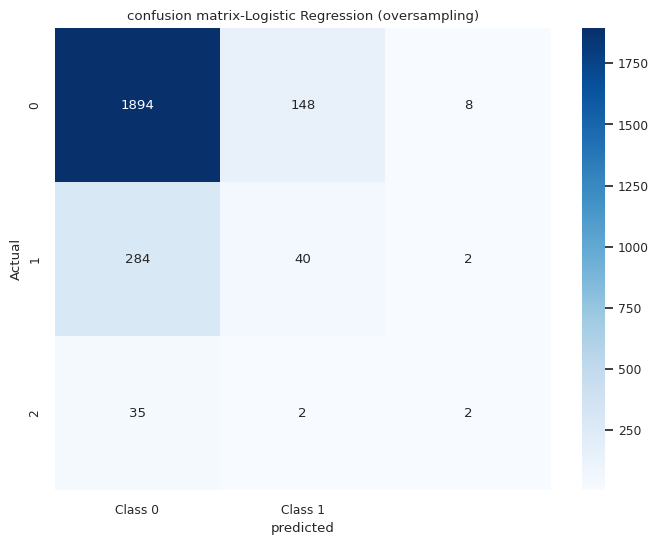

In [209]:
#Apply oversampling (SMOTE)
print("\nTraining ad Evaluating Logistic Regression with Oversampling (SMOTE)")
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

#Train model on resampled data
model.fit(x_train_resampled,y_train_resampled)

#predictions
y_pred_oversample=model.predict(x_test)

#Accuracy
accuracy_oversample=accuracy_score(y_test,y_pred_oversample)
print(f'Accuracy (oversampling -SMOTE):{accuracy_oversample:4f}')

#classification report
print("\nClassification Report(oversampling -SMOTE):")
print(classification_report(y_test,y_pred_oversample))

#confusion matrix
conf_matrix_oversample=confusion_matrix(y_test,y_pred_oversample)

#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_oversample,annot=True,fmt='d',cmap='Blues',xticklabels=["Class 0","Class 1"])
plt.title("confusion matrix-Logistic Regression (oversampling)")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

## Pickle file

In [210]:
import pickle
from sklearn.tree import DecisionTreeClassifier
#train the model (assuming x_train and y_train are already defined)
moel=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
#save the trained model using pickle
with open ('decision_tree_model.pkl','wb') as file:
  pickle.dump(model,file)
  print("Model saved to 'decision_tree_model.pkl'.")

Model saved to 'decision_tree_model.pkl'.
